# 1- Importar Bibliotecas

In [1]:
pip install https://github.com/ydataai/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/ydataai/pandas-profiling/archive/master.zip


In [2]:
!pip install catboost==0.25.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# Base de Biblioteca e leitura
from google.colab import drive
drive.mount('/content/drive')
from datetime import date

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import zipfile

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from pandas_profiling import ProfileReport
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.pipeline import Pipeline
from feature_engine.imputation import ArbitraryNumberImputer, CategoricalImputer
from feature_engine.encoding import OneHotEncoder
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from pandas_profiling import ProfileReport

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2- DATASETS

## 2.1- Criar Função para leitura alterando a URL

In [5]:
def leitura(items, URL, a,c,d,e):

    zf = []
    df = []
    df_abt = pd.DataFrame()
    
    for i in items:
        b = (f'{i}')
        abcd= a+b+c+d
        i = URL+ abcd
        zf.append(i)
        
    for i in items:
        b = (f'{i}')
        abce= a+b+c+e
        i = abce
        df.append(i)
        
    lista= list(range(0,len(items)))
    
    for d in lista:
        ls = zipfile.ZipFile(zf[d])
        ABT1 = pd.read_csv(ls.open(df[d]), encoding='latin-1', sep=';')
        df_abt = pd.concat([df_abt, ABT1])
        
    return(df_abt)

## 2.2- leitura Base de Dados (BOLETIM DE URNA) - df_BU  e ABT_BU_DF

In [6]:
#items = ['ES','MG','RJ','SP']
items = ['SP']
URL = '/content/drive/MyDrive/datasets/eleicoes/boletim/'
a = 'bweb_1t_'
c = '_051020221321.'
d = 'zip'
e = 'csv'

df_BU =  leitura(items, URL, a,c,d,e)

In [7]:
# Eliminação de todos as colunas que possuem valores únicoss

df_BU = (df_BU.drop(columns=['DT_GERACAO','HH_GERACAO','ANO_ELEICAO','CD_TIPO_ELEICAO',
                               'NM_TIPO_ELEICAO','CD_PLEITO','DT_PLEITO','NR_TURNO','CD_TIPO_URNA','DS_TIPO_URNA']))


# Eliminação de todos as colunas que possuem valores repetidos em mais de uma coluna

df_BU = (df_BU.drop(columns=['CD_MUNICIPIO','CD_CARGO_PERGUNTA','NR_PARTIDO','SG_PARTIDO','CD_TIPO_VOTAVEL',
                               'CD_ELEICAO','DS_CARGO_PERGUNTA_SECAO'])) #'NR_VOTAVEL'

# Eliminação de dados não interessantes para a avaliação do negócio

df_BU = (df_BU.drop(columns=['DT_BU_RECEBIDO','CD_CARGA_1_URNA_EFETIVADA','CD_CARGA_2_URNA_EFETIVADA',
                               'DT_CARGA_URNA_EFETIVADA','DT_ABERTURA','DT_ENCERRAMENTO','DT_EMISSAO_BU',
                               'NR_JUNTA_APURADORA','NR_TURMA_APURADORA','DS_AGREGADAS']))

# Seleção de eleições estaduais (elimina as de presidente)
df_BU = df_BU.query("DS_ELEICAO=='Eleições Gerais Estaduais 2022' & DS_TIPO_VOTAVEL=='Nominal'").copy()

# Eliminação de outros dados não interantesse para a avaliação do negócio
df_BU = (df_BU.drop(columns=['DS_ELEICAO','SG_UF','DS_TIPO_VOTAVEL','QT_APTOS','QT_COMPARECIMENTO','QT_ABSTENCOES']))


df_BU_DF = df_BU.query("DS_CARGO_PERGUNTA=='Deputado Federal'").copy()

In [8]:
df_BU.head(10)

NM_MUNICIPIO  NR_ZONA  NR_SECAO  NR_LOCAL_VOTACAO DS_CARGO_PERGUNTA  \
9     SÃO PAULO        1         1              1015        Governador   
10    SÃO PAULO        1         1              1015        Governador   
11    SÃO PAULO        1         1              1015        Governador   
12    SÃO PAULO        1         1              1015        Governador   
13    SÃO PAULO        1         1              1015        Governador   
17    SÃO PAULO        1         1              1015           Senador   
18    SÃO PAULO        1         1              1015           Senador   
19    SÃO PAULO        1         1              1015           Senador   
20    SÃO PAULO        1         1              1015           Senador   
21    SÃO PAULO        1         1              1015           Senador   

                                  NM_PARTIDO  NR_VOTAVEL          NM_VOTAVEL  \
9    Partido da Social Democracia Brasileira          45      RODRIGO GARCIA   
10                 Partido dos Trabalhadores          13     FERNANDO HADDAD   
11                              Partido Novo          30       VINICIUS POIT   
12                              REPUBLICANOS          10            TARCÍSIO   
13           Partido Democrático Trabalhista          12         ELVIS CEZAR   
17              Partido Comunista Brasileiro         211  PROF. TITO BELLINI   
18                              Partido Novo         300      RICARDO MELLÃO   
19          Movimento Democrático Brasileiro         155     EDSON APARECIDO   
20  Partido Renovador Trabalhista Brasileiro         287    JANAINA PASCHOAL   
21           Partido Democrático Trabalhista         123         ALDO REBELO   

    QT_VOTOS  NR_URNA_EFETIVADA CD_FLASHCARD_URNA_EFETIVADA  \
9         72            1825364                    A836CFA2   
10        81            1825364                    A836CFA2   
11         7            1825364                    A836CFA2   
12       103            1825364                    A836CFA2   
13         1            1825364                    A836CFA2   
17         1            1825364                    A836CFA2   
18        12            1825364                    A836CFA2   
19        29            1825364                    A836CFA2   
20        14            1825364                    A836CFA2   
21         5            1825364                    A836CFA2   

    QT_ELEITORES_BIOMETRIA_NH  
9                          52  
10                         52  
11                         52  
12                         52  
13                         52  
17                         52  
18                         52  
19                         52  
20                         52  
21                         52

In [9]:
abt_BU_DF =(
    df_BU_DF
    .groupby('NM_VOTAVEL')
    .agg(
        DFS_MUNICIPIO=('NM_MUNICIPIO', 'nunique'),
        DFS_ZONA=('NR_ZONA', 'nunique'),
        DFS_SECAO=('NR_SECAO', 'nunique'),
        DFS_LOCAL_VOTACAO=('NR_LOCAL_VOTACAO', 'nunique'),
        NM_PARTIDO =('NM_PARTIDO', 'max'),
        NR_VOTAVEL =('NR_VOTAVEL', 'max'),
        QT_VOTOS =('QT_VOTOS', 'sum'),
        STD_VOTOS = ('QT_VOTOS','std')
         )
      .reset_index()
      .sort_values('QT_VOTOS',ascending= False)
      )

In [10]:
abt_BU_DF = abt_BU_DF.rename(columns={"NM_VOTAVEL": "NM_CANDIDATO","NR_VOTAVEL": "NR_CANDIDATO"})

In [11]:
abt_BU_DF.head()

NM_CANDIDATO  DFS_MUNICIPIO  DFS_ZONA  DFS_SECAO  \
617      GUILHERME BOULOS            644       393       1049   
164        CARLA ZAMBELLI            645       393       1048   
448     EDUARDO BOLSONARO            645       393       1048   
1195       RICARDO SALLES            645       393       1037   
308   DELEGADO BRUNO LIMA            645       393       1047   

      DFS_LOCAL_VOTACAO                      NM_PARTIDO  NR_CANDIDATO  \
617                 167  Partido Socialismo e Liberdade          5010   
164                 168                 Partido Liberal          2210   
448                 166                 Partido Liberal          2222   
1195                167                 Partido Liberal          2250   
308                 167                   PROGRESSISTAS          1111   

      QT_VOTOS  STD_VOTOS  
617    1001472   7.642146  
164     946244   5.991589  
448     741701   3.937158  
1195    640918   5.960607  
308     461217   3.372416

## 2.3- leitura Base de Dados (Prestação de Contas Eleitorais) - df_PE  ABT_PE_DF

In [12]:
zf = zipfile.ZipFile('/content/drive/MyDrive/datasets/eleicoes/prestacao/prestacao_de_contas_eleitorais_candidatos_2022.zip')
df_PE = pd.read_csv(zf.open('despesas_contratadas_candidatos_2022_SP.csv'), encoding='latin-1', sep=';')

In [13]:
# Eliminação de todos as colunas que possuem valores únicos

df_PE = (df_PE.drop(columns=['DT_GERACAO','HH_GERACAO','ANO_ELEICAO','CD_TIPO_ELEICAO',
                               'NM_TIPO_ELEICAO','CD_ELEICAO','DS_ELEICAO','DT_ELEICAO','ST_TURNO','SG_UF','SG_UE','NM_UE',
                               'CD_ESFERA_PART_FORNECEDOR','DS_ESFERA_PART_FORNECEDOR']))


df_PE['VR_DESPESA_CONTRATADA'] = df_PE['VR_DESPESA_CONTRATADA'].str.replace(',', '.')
df_PE['VR_DESPESA_CONTRATADA'] = df_PE['VR_DESPESA_CONTRATADA'].astype(float)


# Eliminação de todos as colunas que possuem valores repetidos em mais de uma coluna

df_PE = (df_PE.drop(columns=['CD_CARGO','SQ_CANDIDATO','NR_PARTIDO','SG_PARTIDO',
                                 'CD_TIPO_FORNECEDOR',
                                 'CD_CNAE_FORNECEDOR',
                                 'NR_CPF_CNPJ_FORNECEDOR','NM_FORNECEDOR',
                                 'CD_ORIGEM_DESPESA'])) 


# Eliminação de dados não interessantes para a avaliação do negócio

df_PE = (df_PE.drop(columns=['NR_CNPJ_PRESTADOR_CONTA','TP_PRESTACAO_CONTAS','DT_PRESTACAO_CONTAS','SQ_PRESTADOR_CONTAS',
                                 'NR_CPF_CANDIDATO','NR_CPF_VICE_CANDIDATO',
                                 'SG_UF_FORNECEDOR','CD_MUNICIPIO_FORNECEDOR','NM_MUNICIPIO_FORNECEDOR',
                                 'SQ_CANDIDATO_FORNECEDOR','NR_CANDIDATO_FORNECEDOR','CD_CARGO_FORNECEDOR','DS_CARGO_FORNECEDOR',
                                 'NR_PARTIDO_FORNECEDOR','SG_PARTIDO_FORNECEDOR','NM_PARTIDO_FORNECEDOR',
                                 'NR_DOCUMENTO','SQ_DESPESA','DS_CNAE_FORNECEDOR','NM_FORNECEDOR_RFB',
                                 'DS_DESPESA']))

# Criando novas colunas e trans

df_PE['VR_PESSOA_FISICA'] = df_PE.loc[df_PE['DS_TIPO_FORNECEDOR'] =='Pessoa Física',['DS_TIPO_FORNECEDOR','VR_DESPESA_CONTRATADA']].sum(axis=1)
df_PE['VR_PESSOA_FISICA'].fillna(0, inplace=True)


df_PE['VR_PESSOA_JURIDICA'] = df_PE.loc[df_PE['DS_TIPO_FORNECEDOR'] =='Pessoa Jurídica',['DS_TIPO_FORNECEDOR','VR_DESPESA_CONTRATADA']].sum(axis=1)
df_PE['VR_PESSOA_JURIDICA'].fillna(0, inplace=True)


df_PE['DT_DESPESA'] = pd.to_datetime(df_PE['DT_DESPESA'])
df_PE['DT_DESPESA'] = pd.to_datetime(df_PE['DT_DESPESA'], format='%Y%m%d')
df_PE['recencia_DT_DESPESA']= (pd.to_datetime(date.today()) - pd.to_datetime(df_PE['DT_DESPESA'])).dt.days
df_PE['recencia_DT_DESPESA']= df_PE['recencia_DT_DESPESA'].astype(int)

<ipython-input-13-d1cf06caf631>:33: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_PE['VR_PESSOA_FISICA'] = df_PE.loc[df_PE['DS_TIPO_FORNECEDOR'] =='Pessoa Física',['DS_TIPO_FORNECEDOR','VR_DESPESA_CONTRATADA']].sum(axis=1)
<ipython-input-13-d1cf06caf631>:37: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_PE['VR_PESSOA_JURIDICA'] = df_PE.loc[df_PE['DS_TIPO_FORNECEDOR'] =='Pessoa Jurídica',['DS_TIPO_FORNECEDOR','VR_DESPESA_CONTRATADA']].sum(axis=1)


In [14]:
## Selecionar apenas o DF
df_PE_DF = df_PE.query("DS_CARGO=='Deputado Federal'").drop(columns=['DS_CARGO']).copy()

In [15]:
df_PE_DF.nunique()

NR_CANDIDATO              970
NM_CANDIDATO              970
NM_PARTIDO                 30
DS_TIPO_FORNECEDOR          2
DS_TIPO_DOCUMENTO           8
DS_ORIGEM_DESPESA          41
DT_DESPESA                 65
VR_DESPESA_CONTRATADA    8182
VR_PESSOA_FISICA         1444
VR_PESSOA_JURIDICA       7383
recencia_DT_DESPESA        65
dtype: int64

In [16]:
## Criando novas variáveis dentro do DF

grouped_multiple_DF = df_PE_DF.groupby(['NM_CANDIDATO', 'DS_ORIGEM_DESPESA']).agg({'VR_DESPESA_CONTRATADA': ['sum']}).reset_index()

grouped_multiple_DF.columns = ['NM_CANDIDATO','DS_ORIGEM_DESPESA','VR_ORIGEM_DESPESA']

grouped_multiple_DF = grouped_multiple_DF.sort_values(by=['NM_CANDIDATO','VR_ORIGEM_DESPESA'], ascending=[True, False])

abt_grouped_multiple_DF =(
    grouped_multiple_DF
    .groupby('NM_CANDIDATO')
    .agg(
        FIRST_ORIGEM_DESPESA=('DS_ORIGEM_DESPESA', 'first'),
        LAST_ORIGEM_DESPESA=('DS_ORIGEM_DESPESA', 'last'),
         STD_ORIGEM_DESPESA=('VR_ORIGEM_DESPESA', 'std'),
         VR_ORIGEM_DESPESA=('VR_ORIGEM_DESPESA', 'sum')
         )
      .reset_index()
      )


In [17]:
grouped_multiple_DF = grouped_multiple_DF.rename(columns={"DS_ORIGEM_DESPESA": "FIRST_ORIGEM_DESPESA","VR_ORIGEM_DESPESA": "VR_FIRST_ORIGEM_DESPESA"})

In [18]:
abt_grouped_multiple_DF = (
    abt_grouped_multiple_DF
    .merge(grouped_multiple_DF, on=['NM_CANDIDATO','FIRST_ORIGEM_DESPESA'], how='left', indicator=False))

In [19]:
abt_grouped_multiple_DF.loc[:, "%_FIRST_GASTO_TOTAL"] =(abt_grouped_multiple_DF["VR_FIRST_ORIGEM_DESPESA"]/abt_grouped_multiple_DF["VR_ORIGEM_DESPESA"])

In [20]:
abt_grouped_multiple_DF = abt_grouped_multiple_DF.loc[:,['NM_CANDIDATO','FIRST_ORIGEM_DESPESA','VR_FIRST_ORIGEM_DESPESA','%_FIRST_GASTO_TOTAL','LAST_ORIGEM_DESPESA','STD_ORIGEM_DESPESA','VR_ORIGEM_DESPESA']]

In [21]:
grouped_multiple_DF = grouped_multiple_DF.rename(columns={"FIRST_ORIGEM_DESPESA": "LAST_ORIGEM_DESPESA","VR_FIRST_ORIGEM_DESPESA":"VR_LAST_ORIGEM_DESPESA"})

In [22]:
abt_grouped_multiple_DF = (
    abt_grouped_multiple_DF
    .merge(grouped_multiple_DF, on=['NM_CANDIDATO','LAST_ORIGEM_DESPESA'], how='left', indicator=False))

In [23]:
abt_grouped_multiple_DF.loc[:, "%_LAST_GASTO_TOTAL"] =(abt_grouped_multiple_DF["VR_LAST_ORIGEM_DESPESA"]/abt_grouped_multiple_DF["VR_ORIGEM_DESPESA"])

In [24]:
abt_grouped_multiple_DF = abt_grouped_multiple_DF.loc[:,['NM_CANDIDATO','FIRST_ORIGEM_DESPESA','VR_FIRST_ORIGEM_DESPESA','%_FIRST_GASTO_TOTAL','LAST_ORIGEM_DESPESA','VR_LAST_ORIGEM_DESPESA','%_LAST_GASTO_TOTAL','STD_ORIGEM_DESPESA','VR_ORIGEM_DESPESA']]

In [25]:
grouped_documento_DF= df_PE_DF.groupby(['NM_CANDIDATO', 'DS_TIPO_DOCUMENTO']).agg({'VR_DESPESA_CONTRATADA': ['sum']}).reset_index()

grouped_documento_DF.columns = ['NM_CANDIDATO','DS_TIPO_DOCUMENTO','VR_DS_DOCUMENTO']

grouped_documento_DF = grouped_documento_DF.sort_values(by=['NM_CANDIDATO','VR_DS_DOCUMENTO'], ascending=[True, False])

abt_grouped_documento_DF =(
    grouped_documento_DF
    .groupby('NM_CANDIDATO')
    .agg(
        FIRST_DS_DOCUMENTO=('DS_TIPO_DOCUMENTO', 'first'),
         LAST_DS_DOCUMENTO=('DS_TIPO_DOCUMENTO', 'last'),
         STD_DOCUMENTO=('VR_DS_DOCUMENTO', 'std')
         )
      .reset_index()
      )

In [26]:
ABT_PE_DF = (
    abt_grouped_multiple_DF
    .merge(abt_grouped_documento_DF, on='NM_CANDIDATO', how='left', indicator=False))

In [27]:
ABT_PE_DF2 =(
    df_PE
    .groupby('NM_CANDIDATO')
    .agg(
        NR_CANDIDATO=('NR_CANDIDATO', 'max'),
        NM_PARTIDO=('NM_PARTIDO', 'max'),
        VR_PESSOA_FISICA=('VR_PESSOA_FISICA', 'sum'),
        VR_PESSOA_JURIDICA=('VR_PESSOA_JURIDICA', 'sum'),
        recencia_media_DESPESA =('recencia_DT_DESPESA', 'mean'),
        recencia_STD_DESPESA =('recencia_DT_DESPESA', 'std'),
        VR_DESPESA_CONTRATADA=('VR_DESPESA_CONTRATADA', 'sum')
         )
      .reset_index()
      )

In [28]:
ABT_PE_DF = (
    ABT_PE_DF
    .merge(ABT_PE_DF2, on='NM_CANDIDATO', how='left', indicator=False))

In [29]:
ABT_PE_DF.shape

(970, 19)

In [30]:
ABT_PE_DF.dtypes

NM_CANDIDATO                object
FIRST_ORIGEM_DESPESA        object
VR_FIRST_ORIGEM_DESPESA    float64
%_FIRST_GASTO_TOTAL        float64
LAST_ORIGEM_DESPESA         object
VR_LAST_ORIGEM_DESPESA     float64
%_LAST_GASTO_TOTAL         float64
STD_ORIGEM_DESPESA         float64
VR_ORIGEM_DESPESA          float64
FIRST_DS_DOCUMENTO          object
LAST_DS_DOCUMENTO           object
STD_DOCUMENTO              float64
NR_CANDIDATO                 int64
NM_PARTIDO                  object
VR_PESSOA_FISICA           float64
VR_PESSOA_JURIDICA         float64
recencia_media_DESPESA     float64
recencia_STD_DESPESA       float64
VR_DESPESA_CONTRATADA      float64
dtype: object

In [31]:
ABT_PE_DF.columns

Index(['NM_CANDIDATO', 'FIRST_ORIGEM_DESPESA', 'VR_FIRST_ORIGEM_DESPESA',
       '%_FIRST_GASTO_TOTAL', 'LAST_ORIGEM_DESPESA', 'VR_LAST_ORIGEM_DESPESA',
       '%_LAST_GASTO_TOTAL', 'STD_ORIGEM_DESPESA', 'VR_ORIGEM_DESPESA',
       'FIRST_DS_DOCUMENTO', 'LAST_DS_DOCUMENTO', 'STD_DOCUMENTO',
       'NR_CANDIDATO', 'NM_PARTIDO', 'VR_PESSOA_FISICA', 'VR_PESSOA_JURIDICA',
       'recencia_media_DESPESA', 'recencia_STD_DESPESA',
       'VR_DESPESA_CONTRATADA'],
      dtype='object')

In [32]:
#Criar categoria para apoio presidencial

def limpeza(row):  
    if row['%_LAST_GASTO_TOTAL'] == 1:
        return 'Apenas um gasto'
    else:
        return row['LAST_ORIGEM_DESPESA']

ABT_PE_DF['APOIO_PRESIDENCIAL'] = ABT_PE_DF.apply(lambda ABT_PE_DF: limpeza(ABT_PE_DF), axis=1)

In [33]:
ABT_PE_DF = ABT_PE_DF.drop(columns=["LAST_ORIGEM_DESPESA"])

ABT_PE_DF = ABT_PE_DF.rename(columns={"APOIO_PRESIDENCIAL": "LAST_ORIGEM_DESPESA"})

In [34]:
ABT_PE_DF = (ABT_PE_DF
             .loc[:,['NM_CANDIDATO', 'FIRST_ORIGEM_DESPESA', 'VR_FIRST_ORIGEM_DESPESA','%_FIRST_GASTO_TOTAL', 'LAST_ORIGEM_DESPESA', 
                     'VR_LAST_ORIGEM_DESPESA','%_LAST_GASTO_TOTAL', 'STD_ORIGEM_DESPESA', 'VR_ORIGEM_DESPESA',
                     'FIRST_DS_DOCUMENTO', 'LAST_DS_DOCUMENTO', 'STD_DOCUMENTO',
                     'NR_CANDIDATO', 'NM_PARTIDO', 'VR_PESSOA_FISICA', 'VR_PESSOA_JURIDICA',
                     'recencia_media_DESPESA', 'recencia_STD_DESPESA',
                     'VR_DESPESA_CONTRATADA']])

In [35]:
ABT_PE_DF.columns

Index(['NM_CANDIDATO', 'FIRST_ORIGEM_DESPESA', 'VR_FIRST_ORIGEM_DESPESA',
       '%_FIRST_GASTO_TOTAL', 'LAST_ORIGEM_DESPESA', 'VR_LAST_ORIGEM_DESPESA',
       '%_LAST_GASTO_TOTAL', 'STD_ORIGEM_DESPESA', 'VR_ORIGEM_DESPESA',
       'FIRST_DS_DOCUMENTO', 'LAST_DS_DOCUMENTO', 'STD_DOCUMENTO',
       'NR_CANDIDATO', 'NM_PARTIDO', 'VR_PESSOA_FISICA', 'VR_PESSOA_JURIDICA',
       'recencia_media_DESPESA', 'recencia_STD_DESPESA',
       'VR_DESPESA_CONTRATADA'],
      dtype='object')

In [36]:
ABT_PE_DF.sort_values('%_LAST_GASTO_TOTAL',ascending=False)

NM_CANDIDATO  \
145                 CELSO LUIZ PEREIRA   
142               CATIA NUNES DE ABREU   
618           MARCO ANTONIO FONTEBASSO   
616              MARCO ANTONIO BATISTA   
126            CARINA BALBINO CARNEIRO   
..                                 ...   
110    ARNALDO SALVETTI PALACIO JUNIOR   
801           RICARDO DE AQUINO SALLES   
347  FERNANDO JOSE  DE SOUZA MARANGONI   
407             HELCIO FREIRE DO CARMO   
43                ALEX MACEDO DE SOUZA   

                              FIRST_ORIGEM_DESPESA  VR_FIRST_ORIGEM_DESPESA  \
145                       Publicidade por adesivos                   525.00   
142                         Diversas a especificar                  6500.00   
618            Publicidade por materiais impressos                  2720.00   
616      Criação e inclusão de páginas na internet                  1311.00   
126                          Serviços advocatícios                  2000.00   
..                                             ...                      ...   
110                           Despesas com pessoal                415562.00   
801       Despesa com Impulsionamento de Conteúdos                639470.00   
347               Serviços prestados por terceiros                666352.50   
407       Despesa com Impulsionamento de Conteúdos                  3507.89   
43   Atividades de militância e mobilização de rua                236856.00   

     %_FIRST_GASTO_TOTAL                                LAST_ORIGEM_DESPESA  \
145             1.000000                                    Apenas um gasto   
142             1.000000                                    Apenas um gasto   
618             1.000000                                    Apenas um gasto   
616             1.000000                                    Apenas um gasto   
126             1.000000                                    Apenas um gasto   
..                   ...                                                ...   
110             0.767200  Encargos financeiros, taxas bancárias e/ou op....   
801             0.280396  Encargos financeiros, taxas bancárias e/ou op....   
347             0.372933  Encargos financeiros, taxas bancárias e/ou op....   
407             0.383376  Encargos financeiros, taxas bancárias e/ou op....   
43              0.599047                    Impostos, contribuições e taxas   

     VR_LAST_ORIGEM_DESPESA  %_LAST_GASTO_TOTAL  STD_ORIGEM_DESPESA  \
145                  525.00        1.000000e+00                 NaN   
142                 6500.00        1.000000e+00                 NaN   
618                 2720.00        1.000000e+00                 NaN   
616                 1311.00        1.000000e+00                 NaN   
126                 2000.00        1.000000e+00                 NaN   
..                      ...                 ...                 ...   
110                    3.00        5.538523e-06       117144.926993   
801                   11.10        4.867155e-06       206572.003034   
347                    5.50        3.078146e-06       232787.190974   
407                    0.01        1.092897e-06         1100.575846   
43                     0.35        8.852063e-07        64716.338626   

     VR_ORIGEM_DESPESA FIRST_DS_DOCUMENTO LAST_DS_DOCUMENTO  STD_DOCUMENTO  \
145             525.00        Nota Fiscal       Nota Fiscal            NaN   
142            6500.00        Nota Fiscal       Nota Fiscal            NaN   
618            2720.00        Nota Fiscal       Nota Fiscal            NaN   
616            1311.00             Fatura            Fatura            NaN   
126            2000.00              Outro             Outro            NaN   
..                 ...                ...               ...            ...   
110          541660.64              Outro            #NULO#  230117.738581   
801         2280593.24              Outro            Fatura  429461.302465   
347         1786789.71        Nota Fiscal            #NULO#  872928.

## 2.4- leitura Base de Dados (Candidatos) df_CANDIDATO_DF, df_BEM_CANDIDATO_DF,df_REDE_SOCIAL_DF e ABT_CANDIDATO

In [37]:
## CANDIDADO df_CANDIDATO

zf = zipfile.ZipFile('/content/drive/MyDrive/datasets/eleicoes/candidatos/consulta_cand_2022.zip')
df_CANDIDATO = pd.read_csv(zf.open('consulta_cand_2022_SP.csv'), encoding='latin-1', sep=';')

# Tirar todos os valores iguais
items = df_CANDIDATO.nunique().reset_index()
items.columns = ['coluna','quantidade']
items = items.query('quantidade==1')['coluna']
df_CANDIDATO = (df_CANDIDATO.drop(columns=items))

# Eliminar todos os repetidos
df_CANDIDATO = (df_CANDIDATO.drop(columns=['CD_CARGO','NM_URNA_CANDIDATO','CD_SITUACAO_CANDIDATURA','CD_DETALHE_SITUACAO_CAND',
                                 'NR_PARTIDO','SG_PARTIDO','CD_NACIONALIDADE','CD_GENERO','CD_GRAU_INSTRUCAO',
                                 'CD_ESTADO_CIVIL','CD_COR_RACA','CD_OCUPACAO','CD_SIT_TOT_TURNO','CD_SITUACAO_CANDIDATO_PLEITO','CD_SITUACAO_CANDIDATO_URNA',
                                 'CD_SITUACAO_CANDIDATO_TOT']))

# Eliminar todos as colunas não interessantes pro negócio
df_CANDIDATO = (df_CANDIDATO.drop(columns=['NM_SOCIAL_CANDIDATO','NR_CPF_CANDIDATO','NM_FEDERACAO','NR_FEDERACAO','SG_FEDERACAO',
                                 'DS_COMPOSICAO_FEDERACAO','SQ_COLIGACAO','NR_TITULO_ELEITORAL_CANDIDATO','VR_DESPESA_MAX_CAMPANHA'
                                 ]))

# Selecionar os Deputados Federais
df_CANDIDATO_DF = df_CANDIDATO.query("DS_CARGO=='DEPUTADO FEDERAL'").drop(columns=['DS_CARGO']).copy()

df_CANDIDATO_DF= df_CANDIDATO_DF.sort_values('NR_CANDIDATO')

## Dropar todos os elementos repeditos
df_CANDIDATO_DF = df_CANDIDATO_DF.drop([1446,1202,2650,3353,1151,3360,1418,2474,713])

###DT_NASCIMENTO- Vou transformar em recência 
df_CANDIDATO_DF['DT_NASCIMENTO'] = pd.to_datetime(df_CANDIDATO_DF['DT_NASCIMENTO'])
df_CANDIDATO_DF['DT_NASCIMENTO'] = pd.to_datetime(df_CANDIDATO_DF['DT_NASCIMENTO'], format='%Y%m%d')
df_CANDIDATO_DF['recencia_DT_NASCIMENTO']= (pd.to_datetime(date.today()) - pd.to_datetime(df_CANDIDATO_DF['DT_NASCIMENTO'])).dt.days
df_CANDIDATO_DF['recencia_DT_NASCIMENTO']= df_CANDIDATO_DF['recencia_DT_NASCIMENTO'].astype(int)


## Eliminar valores Não interessantes para o negócio após modificações

df_CANDIDATO_DF = (df_CANDIDATO_DF.drop(columns=['DT_NASCIMENTO']))

In [38]:
## BEM CANDIDATO df_BEM_CANDIDATO

zf = zipfile.ZipFile('/content/drive/MyDrive/datasets/eleicoes/candidatos/bem_candidato_2022.zip')
df_BEM_CANDIDATO = pd.read_csv(zf.open('bem_candidato_2022_SP.csv'), encoding='latin-1', sep=';')

df_BEM_CANDIDATO['VR_BEM_CANDIDATO'] = df_BEM_CANDIDATO['VR_BEM_CANDIDATO'].str.replace(',', '.')
df_BEM_CANDIDATO['VR_BEM_CANDIDATO'] = df_BEM_CANDIDATO['VR_BEM_CANDIDATO'].astype(float)


# Tirar todos os valores iguais
items = df_BEM_CANDIDATO.nunique().reset_index()
items.columns = ['coluna','quantidade']
items = items.query('quantidade==1')['coluna']
df_BEM_CANDIDATO = (df_BEM_CANDIDATO.drop(columns=items))


df_BEM_CANDIDATO =(
    df_BEM_CANDIDATO
    .groupby('SQ_CANDIDATO')
    .agg(
        VR_BEM_CANDIDATO=('VR_BEM_CANDIDATO', 'sum'),
         )
      .reset_index()
      .sort_values('VR_BEM_CANDIDATO',ascending= False)
      )

# Colocar o NR do candidato na base
df = df_CANDIDATO[['NR_CANDIDATO','SQ_CANDIDATO','DS_CARGO']]


df_BEM_CANDIDATO = (
    df_BEM_CANDIDATO
    .merge(df, on='SQ_CANDIDATO', how='left', indicator=False))


df_BEM_CANDIDATO_DF = df_BEM_CANDIDATO.query("DS_CARGO=='DEPUTADO FEDERAL'").drop(columns=['DS_CARGO']).copy()

df_BEM_CANDIDATO_DF = df_BEM_CANDIDATO_DF.sort_values('NR_CANDIDATO')


df_BEM_CANDIDATO_DF = df_BEM_CANDIDATO_DF.drop([1518,513,2136])

In [39]:
## REDE SOCIAL CANDIDATO df_REDE_SOCIAL

df_REDE_SOCIAL_DF= pd.read_csv('/content/drive/MyDrive/datasets/eleicoes/df_abt8_df.csv',encoding='latin-1', sep=';')
df_REDE_SOCIAL_DF =(df_REDE_SOCIAL_DF.drop(columns=['Unnamed: 0','SQ_CANDIDATO','DS_URL']))

df_REDE_SOCIAL_DF = pd.get_dummies(df_REDE_SOCIAL_DF, columns = ['REDE_SOCIAL'])
df_REDE_SOCIAL_DF

df_REDE_SOCIAL_DF =(
    df_REDE_SOCIAL_DF
    .groupby('NR_CANDIDATO')
    .agg(
        REDE_SOCIAL_facebook=('REDE_SOCIAL_facebook', 'sum'),
         REDE_SOCIAL_flickr=('REDE_SOCIAL_flickr', 'sum'),
         REDE_SOCIAL_instagram=('REDE_SOCIAL_instagram', 'sum'),
         REDE_SOCIAL_kwai=('REDE_SOCIAL_kwai', 'sum'),
         REDE_SOCIAL_linkedin=('REDE_SOCIAL_linkedin', 'sum'),
         REDE_SOCIAL_site=('REDE_SOCIAL_site', 'sum'),
         REDE_SOCIAL_telegram=('REDE_SOCIAL_telegram', 'sum'),
         REDE_SOCIAL_tiktok=('REDE_SOCIAL_tiktok', 'sum'),
         REDE_SOCIAL_twitter=('REDE_SOCIAL_twitter', 'sum'),
         REDE_SOCIAL_whatsapp=('REDE_SOCIAL_whatsapp', 'sum'),  
         REDE_SOCIAL_youtube=('REDE_SOCIAL_youtube', 'sum')      
         )
      .reset_index()
      .sort_values('NR_CANDIDATO',ascending= True)
      )


df_REDE_SOCIAL_DF['REDE_SOCIAL_facebook'] = df_REDE_SOCIAL_DF['REDE_SOCIAL_facebook'].replace([ 1,  0,  3,  4,  2, 14, 12,  5, 45,  9],[1,0,1,1,1,1,1,1,1,1])
df_REDE_SOCIAL_DF['REDE_SOCIAL_flickr'] = df_REDE_SOCIAL_DF['REDE_SOCIAL_flickr'].replace([ 0, 1, 2],[0,1,1])
df_REDE_SOCIAL_DF['REDE_SOCIAL_instagram'] = df_REDE_SOCIAL_DF['REDE_SOCIAL_instagram'].replace([1,  0,  2,  3,  5, 46,  4],[1,0,1,1,1,1,1])
df_REDE_SOCIAL_DF['REDE_SOCIAL_site'] = df_REDE_SOCIAL_DF['REDE_SOCIAL_site'].replace([1, 0, 2, 3, 5, 7, 8],[1,0,1,1,1,1,1])
df_REDE_SOCIAL_DF['REDE_SOCIAL_telegram'] = df_REDE_SOCIAL_DF['REDE_SOCIAL_telegram'].replace([0, 1, 2],[0,1,1])
df_REDE_SOCIAL_DF['REDE_SOCIAL_tiktok'] = df_REDE_SOCIAL_DF['REDE_SOCIAL_tiktok'].replace([0, 1, 2, 4],[0,1,1,1])
df_REDE_SOCIAL_DF['REDE_SOCIAL_twitter'] = df_REDE_SOCIAL_DF['REDE_SOCIAL_twitter'].replace([0, 1, 2],[0,1,1])
df_REDE_SOCIAL_DF['REDE_SOCIAL_whatsapp'] = df_REDE_SOCIAL_DF['REDE_SOCIAL_whatsapp'].replace([0, 2, 1],[0,1,1])
df_REDE_SOCIAL_DF['REDE_SOCIAL_youtube'] = df_REDE_SOCIAL_DF['REDE_SOCIAL_youtube'].replace([0, 1, 2, 3, 4],[0,1,1,1,1])


df_REDE_SOCIAL_DF['TOTAL_REDE_SOCAL'] = (df_REDE_SOCIAL_DF['REDE_SOCIAL_facebook']+df_REDE_SOCIAL_DF['REDE_SOCIAL_flickr']+df_REDE_SOCIAL_DF['REDE_SOCIAL_instagram']
                               +df_REDE_SOCIAL_DF['REDE_SOCIAL_kwai']+df_REDE_SOCIAL_DF['REDE_SOCIAL_linkedin']+df_REDE_SOCIAL_DF['REDE_SOCIAL_site']
                               +df_REDE_SOCIAL_DF['REDE_SOCIAL_tiktok']+df_REDE_SOCIAL_DF['REDE_SOCIAL_twitter']+df_REDE_SOCIAL_DF['REDE_SOCIAL_whatsapp']
                               +df_REDE_SOCIAL_DF['REDE_SOCIAL_youtube'])

In [40]:
df_REDE_SOCIAL_DF.head()

NR_CANDIDATO  REDE_SOCIAL_facebook  REDE_SOCIAL_flickr  \
0          1000                     1                   0   
1          1002                     1                   0   
2          1003                     1                   0   
3          1004                     0                   0   
4          1005                     1                   0   

   REDE_SOCIAL_instagram  REDE_SOCIAL_kwai  REDE_SOCIAL_linkedin  \
0                      1                 0                     0   
1                      1                 0                     0   
2                      1                 0                     0   
3                      1                 0                     0   
4                      1                 1                     0   

   REDE_SOCIAL_site  REDE_SOCIAL_telegram  REDE_SOCIAL_tiktok  \
0                 1                     0                   0   
1                 0                     0                   0   
2                 0                     0                   0   
3                 1                     0                   0   
4                 0                     0                   0   

   REDE_SOCIAL_twitter  REDE_SOCIAL_whatsapp  REDE_SOCIAL_youtube  \
0                    0                     0                    0   
1                    0                     0                    0   
2                    0                     0                    0   
3                    0                     0                    0   
4                    0                     0                    1   

   TOTAL_REDE_SOCAL  
0                 3  
1                 2  
2                 2  
3                 2  
4                 4

In [41]:
## Juntando todos os dados de candidatos

ABT_CANDIDATO = (
    abt_BU_DF.merge(ABT_PE_DF.drop(columns=['NM_CANDIDATO','NM_PARTIDO']), on='NR_CANDIDATO', how='left', indicator=False))


In [42]:
## Juntando todos os dados de candidatos

ABT_CANDIDATO = (
    df_CANDIDATO_DF.merge(ABT_CANDIDATO.drop(columns=['NM_CANDIDATO','NM_PARTIDO']), on='NR_CANDIDATO', how='left', indicator=False))

In [43]:
## Juntando todos os dados de candidatos

ABT_CANDIDATO = (
    ABT_CANDIDATO.merge(df_BEM_CANDIDATO_DF.drop(columns=['SQ_CANDIDATO']), on='NR_CANDIDATO', how='left', indicator=False))

In [44]:
ABT_CANDIDATO = (
    ABT_CANDIDATO.merge(df_REDE_SOCIAL_DF, on='NR_CANDIDATO', how='left', indicator=False))

In [45]:
ABT_CANDIDATO.shape

(1531, 64)

In [46]:
ABT_CANDIDATO[ABT_CANDIDATO['FIRST_ORIGEM_DESPESA'].isna()]['DS_SITUACAO_CANDIDATURA'].value_counts()

APTO      467
INAPTO     96
Name: DS_SITUACAO_CANDIDATURA, dtype: int64

In [47]:
ABT_CANDIDATO[ABT_CANDIDATO['FIRST_ORIGEM_DESPESA'].isna()]['QT_VOTOS'].max()

36690.0

In [48]:
ABT_CANDIDATO

SQ_CANDIDATO  NR_CANDIDATO                      NM_CANDIDATO  \
0     250001611882          1000        CELSO UBIRAJARA RUSSOMANNO   
1     250001611905          1001   DANIEL FERNANDO DE SOUZA CAMILO   
2     250001611852          1002               HELIO ALVES RIBEIRO   
3     250001611867          1003            VAGNER JOSE DOS SANTOS   
4     250001611843          1004        CLAUDIA CASTALDELLI CORRÊA   
...            ...           ...                               ...   
1526  250001677899          9095             JOÃO GOMES DE ALMEIDA   
1527  250001677887          9096        TASSIO RENAM SOUZA BOTELHO   
1528  250001677898          9097  JÓ RODRIGUES COSTA DO NASCIMENTO   
1529  250001677901          9098       ELISANGELA CLENILDA NOBREGA   
1530  250001677927          9099        HOMERO DE GIORGE CERQUEIRA   

     DS_SITUACAO_CANDIDATURA DS_DETALHE_SITUACAO_CAND    TP_AGREMIACAO  \
0                       APTO                 DEFERIDO  PARTIDO ISOLADO   
1                       APTO                 DEFERIDO  PARTIDO ISOLADO   
2                       APTO                 DEFERIDO  PARTIDO ISOLADO   
3                       APTO                 DEFERIDO  PARTIDO ISOLADO   
4                       APTO                 DEFERIDO  PARTIDO ISOLADO   
...                      ...                      ...              ...   
1526                  INAPTO                 RENÚNCIA  PARTIDO ISOLADO   
1527                    APTO                 DEFERIDO  PARTIDO ISOLADO   
1528                    APTO                 DEFERIDO  PARTIDO ISOLADO   
1529                    APTO                 DEFERIDO  PARTIDO ISOLADO   
1530                    APTO                 DEFERIDO  PARTIDO ISOLADO   

                               NM_PARTIDO     NM_COLIGACAO  \
0                            REPUBLICANOS  PARTIDO ISOLADO   
1                            REPUBLICANOS  PARTIDO ISOLADO   
2                            REPUBLICANOS  PARTIDO ISOLADO   
3                            REPUBLICANOS  PARTIDO ISOLADO   
4                            REPUBLICANOS  PARTIDO ISOLADO   
...                                   ...              ...   
1526  PARTIDO REPUBLICANO DA ORDEM SOCIAL  PARTIDO ISOLADO   
1527  PARTIDO REPUBLICANO DA ORDEM SOCIAL  PARTIDO ISOLADO   
1528  PARTIDO REPUBLICANO DA ORDEM SOCIAL  PARTIDO ISOLADO   
1529  PARTIDO REPUBLICANO DA ORDEM SOCIAL  PARTIDO ISOLADO   
1530  PARTIDO REPUBLICANO DA ORDEM SOCIAL  PARTIDO ISOLADO   

     DS_COMPOSICAO_COLIGACAO DS_NACIONALIDADE  ... REDE_SOCIAL_instagram  \
0               REPUBLICANOS  BRASILEIRA NATA  ...                   1.0   
1               REPUBLICANOS  BRASILEIRA NATA  ...                   NaN   
2               REPUBLICANOS  BRASILEIRA NATA  ...                   1.0   
3               REPUBLICANOS  BRASILEIRA NATA  ...                   1.0   
4               REPUBLICANOS  BRASILEIRA NATA  ...                   1.0   
...                      ...              ...  ...                   ...   
1526                    PROS  BRASILEIRA NATA  ...                   NaN   
1527                    PROS  BRASILEIRA NATA  ...                   NaN   
1528                    PROS  BRASILEIRA NATA  ...                   NaN   
1529                    PROS  BRASILEIRA NATA  ...                   NaN   
1530                    PROS  BRASILEIRA NATA  ...                   1.0   

     REDE_SOCIAL_kwai  REDE_SOCIAL_linkedin REDE_SOCIAL_site  \
0                 0.0                   0.0              1.0   
1                 NaN                   NaN              NaN   
2                 0.0                   0.0              0.0   
3                 0.0                   0.0              0.0   
4                 0.0                   0.0              1.0   
...               ...                   ...              ...   
1526              NaN                   NaN              NaN   
1527              NaN                   NaN              NaN   
1528              NaN                   Na

In [49]:
ABT_CANDIDATO.isna().sum()

SQ_CANDIDATO                  0
NR_CANDIDATO                  0
NM_CANDIDATO                  0
DS_SITUACAO_CANDIDATURA       0
DS_DETALHE_SITUACAO_CAND      0
                           ... 
REDE_SOCIAL_tiktok          840
REDE_SOCIAL_twitter         840
REDE_SOCIAL_whatsapp        840
REDE_SOCIAL_youtube         840
TOTAL_REDE_SOCAL            840
Length: 64, dtype: int64

In [50]:
## Análise de números faltantes
# VALOES NULOS - Todos os 73 são inaptos

#DFS_MUNICIPIO                    73
#DFS_ZONA                         73
#DFS_SECAO                        73
#DFS_LOCAL_VOTACAO                73
#QT_VOTOS                         73
#STD_VOTOS                        73


## os outros valores são somente os que não constam mesmo nos dados, vou substituit todos NAS por 0

ABT_CANDIDATO = ABT_CANDIDATO.fillna(0)

In [51]:
ABT_CANDIDATO.isna().sum().sum()

0

In [52]:
ABT_CANDIDATO.shape

(1531, 64)

In [53]:
ABT_CANDIDATO.columns

Index(['SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO',
       'DS_SITUACAO_CANDIDATURA', 'DS_DETALHE_SITUACAO_CAND', 'TP_AGREMIACAO',
       'NM_PARTIDO', 'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO',
       'DS_NACIONALIDADE', 'SG_UF_NASCIMENTO', 'NM_MUNICIPIO_NASCIMENTO',
       'NR_IDADE_DATA_POSSE', 'DS_GENERO', 'DS_GRAU_INSTRUCAO',
       'DS_ESTADO_CIVIL', 'DS_COR_RACA', 'DS_OCUPACAO', 'DS_SIT_TOT_TURNO',
       'ST_REELEICAO', 'ST_DECLARAR_BENS', 'NR_PROCESSO',
       'DS_SITUACAO_CANDIDATO_PLEITO', 'DS_SITUACAO_CANDIDATO_URNA',
       'ST_CANDIDATO_INSERIDO_URNA', 'NM_TIPO_DESTINACAO_VOTOS',
       'DS_SITUACAO_CANDIDATO_TOT', 'ST_PREST_CONTAS',
       'recencia_DT_NASCIMENTO', 'DFS_MUNICIPIO', 'DFS_ZONA', 'DFS_SECAO',
       'DFS_LOCAL_VOTACAO', 'QT_VOTOS', 'STD_VOTOS', 'FIRST_ORIGEM_DESPESA',
       'VR_FIRST_ORIGEM_DESPESA', '%_FIRST_GASTO_TOTAL', 'LAST_ORIGEM_DESPESA',
       'VR_LAST_ORIGEM_DESPESA', '%_LAST_GASTO_TOTAL', 'STD_ORIGEM_DESPESA',
       'VR_ORIGEM_DESPESA', 'FIR

In [54]:
# Verificação dos valores repetidos 
dup = [x for x in list(ABT_CANDIDATO['NM_CANDIDATO']) if list(ABT_CANDIDATO['NM_CANDIDATO']).count(x) > 1]
print(dup)

# tem duas maria lúcias porém são pessoas diferentes

['MARIA LUCIA DA SILVA', 'MARIA LUCIA DA SILVA']


In [55]:
#### vou dropar o SQ_CANDIDATO porque não faz sentido ter duas variáveis cadastrais apenas uma (NR_CANDIDATO)

ABT_CANDIDATO = (
    ABT_CANDIDATO.drop(columns=['SQ_CANDIDATO']))

In [56]:
ABT_CANDIDATO.nunique()

NR_CANDIDATO                1531
NM_CANDIDATO                1530
DS_SITUACAO_CANDIDATURA        2
DS_DETALHE_SITUACAO_CAND       5
TP_AGREMIACAO                  2
                            ... 
REDE_SOCIAL_tiktok             2
REDE_SOCIAL_twitter            2
REDE_SOCIAL_whatsapp           2
REDE_SOCIAL_youtube            2
TOTAL_REDE_SOCAL               9
Length: 63, dtype: int64

In [57]:
ABT_CANDIDATO['LAST_ORIGEM_DESPESA'] = ABT_CANDIDATO['LAST_ORIGEM_DESPESA'].replace(0,'S/Prestação')
ABT_CANDIDATO['FIRST_ORIGEM_DESPESA'] = ABT_CANDIDATO['FIRST_ORIGEM_DESPESA'].replace(0,'S/Prestação')

## MELHORIA ABT

In [58]:
#Criar categoria para apoio presidencial
lista = (
    ['PARTIDO DEMOCRÁTICO TRABALHISTA','PARTIDO DOS TRABALHADORES','PARTIDO SOCIALISTA DOS TRABALHADORES UNIFICADO',
         'REDE SUSTENTABILIDADE','PARTIDO COMUNISTA BRASILEIRO','CIDADANIA','PARTIDO DA CAUSA OPERÁRIA','PARTIDO DA MOBILIZAÇÃO NACIONAL',
         'PARTIDO SOCIALISTA BRASILEIRO','PARTIDO VERDE','PARTIDO SOCIALISMO E LIBERDADE','PARTIDO COMUNISTA DO BRASIL','AVANTE','AGIR','SOLIDARIEDADE',
         'UNIDADE POPULAR','PARTIDO REPUBLICANO DA ORDEM SOCIAL'])

def categorise(row):  
    if row['NM_PARTIDO'] in lista:
        return 'Lula'
    else:
        return 'Bolsonaro'

ABT_CANDIDATO['APOIO_PRESIDENCIAL'] = ABT_CANDIDATO.apply(lambda ABT_CANDIDATO: categorise(ABT_CANDIDATO), axis=1)

In [59]:
ABT_CANDIDATO['TOTAL_REDE_SOCAL']

0       3.0
1       0.0
2       2.0
3       2.0
4       2.0
       ... 
1526    0.0
1527    0.0
1528    0.0
1529    0.0
1530    5.0
Name: TOTAL_REDE_SOCAL, Length: 1531, dtype: float64

In [60]:
#Criar categoria para NÃO POSSUIR REDESOCIAL

def REDE(row):  
    if row['TOTAL_REDE_SOCAL'] > 0:
        return 'C/REDE_SOCIAL'
    else:
        return 'S/REDE_SOCIAL'

ABT_CANDIDATO['REDE_SOCIAL'] = ABT_CANDIDATO.apply(lambda ABT_CANDIDATO: REDE(ABT_CANDIDATO), axis=1)

In [61]:
#Criar categoria para NÃO POSSUIR REDESOCIAL

def idade(row):  
    if row['NR_IDADE_DATA_POSSE'] < 30:
        return '20-30'
    if row['NR_IDADE_DATA_POSSE'] < 40:
        return '30-40'
    if row['NR_IDADE_DATA_POSSE'] < 50:
        return '40-50'
    if row['NR_IDADE_DATA_POSSE'] < 60:
        return '50-60'
    else:
        return '>70'

In [62]:
ABT_CANDIDATO['IDADE_CLASSIFICAÇÃO'] = ABT_CANDIDATO.apply(lambda ABT_CANDIDATO: idade(ABT_CANDIDATO), axis=1)

In [63]:
ABT_CANDIDATO['IDADE_CLASSIFICAÇÃO'].value_counts()

50-60    502
40-50    464
>70      287
30-40    220
20-30     58
Name: IDADE_CLASSIFICAÇÃO, dtype: int64

In [64]:
def bem(row):  
    if row['VR_BEM_CANDIDATO'] < 10000:
        return '<10000'
    if row['VR_BEM_CANDIDATO'] < 100000:
        return '10000-100000'
    if row['VR_BEM_CANDIDATO'] < 1000000:
        return '100000-1000000'
    else:
        return '>1mi'

In [65]:
ABT_CANDIDATO['BEM_CLASSIFICAÇÃO'] = ABT_CANDIDATO.apply(lambda ABT_CANDIDATO: bem(ABT_CANDIDATO), axis=1)

# 3- ANÁLISE EXPLORATÓRIA

## Profiling

In [66]:
profile = ProfileReport(ABT_CANDIDATO)

In [67]:
profile.to_file('/content/drive/MyDrive/datasets/relatorio_eleicoes.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [68]:
def graficos(categorico, continuo,base):

    analise = base[base[continuo] > 200000]
    analise2 =base[base[continuo] < 200000]
    analise2 =analise2[analise2[continuo] > 50000]
    analise3 =base[base[continuo] < 50000]
    analise3 =analise3[analise3[continuo] > 10000]
    analise4 =base[base[continuo] < 10000]
    
    for i in categorico:

        fig, axes = plt.subplots(2, 2, figsize=(25, 15))
        
        fig.suptitle( f'{i}' ' X ' f'{continuo}')
        sns.boxplot(ax=axes[0, 0], data=analise, x= i, y= continuo)
        sns.boxplot(ax=axes[0, 1], data=analise2, x= i, y= continuo)
        sns.boxplot(ax=axes[1, 0], data=analise3, x= i, y= continuo)
        sns.boxplot(ax=axes[1, 1], data=analise4, x= i, y= continuo)

## Análise Univariada

### 2- Detalhamento dos Candidatos

#### 1- Município de Nascimento (Frequência)

In [69]:
analise =(
    ABT_CANDIDATO
    .groupby('NM_MUNICIPIO_NASCIMENTO')
    .agg(
        qde_Nascimentos=('NM_MUNICIPIO_NASCIMENTO', 'count'),
         )
      .reset_index()
      .sort_values('qde_Nascimentos',ascending= False)
      )

In [70]:
analise

NM_MUNICIPIO_NASCIMENTO  qde_Nascimentos
434               SÃO PAULO              507
401                  SANTOS               32
382          RIO DE JANEIRO               26
378          RIBEIRÃO PRETO               25
79                 CAMPINAS               24
..                      ...              ...
183                    IAPU                1
182                 IACANGA                1
181                GUIDOVAL                1
180                  GUAÍRA                1
238                  JEQUIÉ                1

[476 rows x 2 columns]

In [71]:
analise.loc[:, "% de candidatos"] =(analise["qde_Nascimentos"]/1531).map('{:.2%}'.format)
analise.head()

NM_MUNICIPIO_NASCIMENTO  qde_Nascimentos % de candidatos
434               SÃO PAULO              507          33.12%
401                  SANTOS               32           2.09%
382          RIO DE JANEIRO               26           1.70%
378          RIBEIRÃO PRETO               25           1.63%
79                 CAMPINAS               24           1.57%

([<matplotlib.patches.Wedge object at 0x7fc4c1fa8130>, <matplotlib.patches.Wedge object at 0x7fc4c1fa85b0>, <matplotlib.patches.Wedge object at 0x7fc4c1fa8e50>, <matplotlib.patches.Wedge object at 0x7fc4c1b4c6d0>, <matplotlib.patches.Wedge object at 0x7fc4c1b4c1c0>, <matplotlib.patches.Wedge object at 0x7fc4c1faf0a0>, <matplotlib.patches.Wedge object at 0x7fc4c1fa8100>, <matplotlib.patches.Wedge object at 0x7fc4c1faf970>, <matplotlib.patches.Wedge object at 0x7fc4c1ba8040>, <matplotlib.patches.Wedge object at 0x7fc4c1ba8580>, <matplotlib.patches.Wedge object at 0x7fc4c1ba89a0>, <matplotlib.patches.Wedge object at 0x7fc4c1ba8e20>, <matplotlib.patches.Wedge object at 0x7fc4c1b53cd0>, <matplotlib.patches.Wedge object at 0x7fc4c1b53610>, <matplotlib.patches.Wedge object at 0x7fc4c1b533a0>, <matplotlib.patches.Wedge object at 0x7fc4c1b53460>, <matplotlib.patches.Wedge object at 0x7fc4c1f9fac0>, <matplotlib.patches.Wedge object at 0x7fc4c1b65820>, <matplotlib.patches.Wedge object at 0x7fc4c1

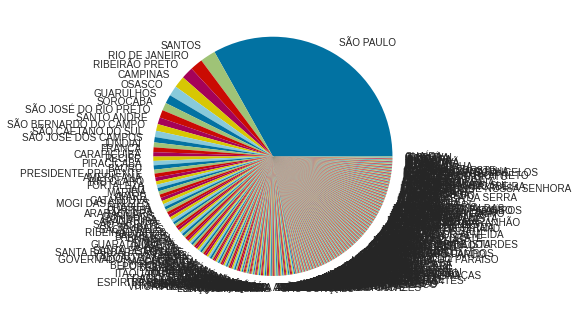

In [72]:
print(plt.pie(analise['qde_Nascimentos'], labels = analise['NM_MUNICIPIO_NASCIMENTO']))

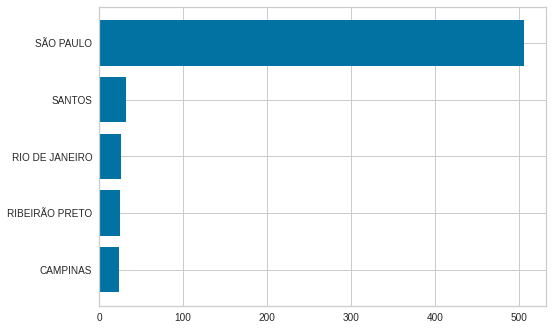

In [73]:
plt.figure()
plt.barh(analise["NM_MUNICIPIO_NASCIMENTO"].head(),analise["qde_Nascimentos"].head())
plt.gca().invert_yaxis()

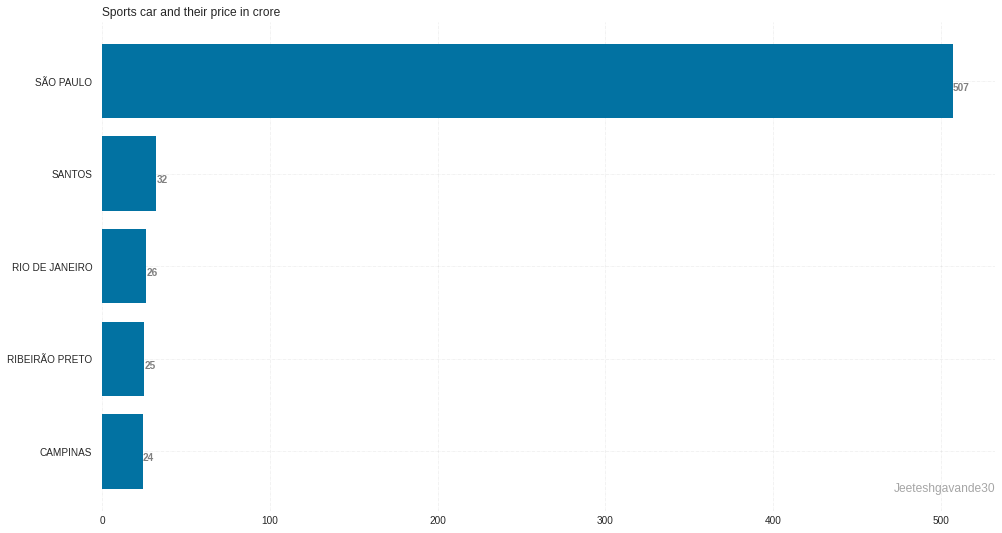

In [74]:
name = analise["NM_MUNICIPIO_NASCIMENTO"].head()
price = analise["qde_Nascimentos"].head()
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(name, price)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Sports car and their price in crore',
             loc ='left', )
 
# Add Text watermark
fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()

#### 2- Grau de Instrução (Frequência)

In [75]:
analise =(
    ABT_CANDIDATO
    .groupby('DS_GRAU_INSTRUCAO')
    .agg(
        qde=('DS_GRAU_INSTRUCAO', 'count'),
         )
      .reset_index()
      .sort_values('qde',ascending= False)
      )

analise.loc[:, "% de candidatos"] =(analise["qde"]/1531).map('{:.2%}'.format)
analise.head()

DS_GRAU_INSTRUCAO  qde % de candidatos
5              SUPERIOR COMPLETO  957          62.51%
2          ENSINO MÉDIO COMPLETO  309          20.18%
6            SUPERIOR INCOMPLETO  152           9.93%
0    ENSINO FUNDAMENTAL COMPLETO   54           3.53%
1  ENSINO FUNDAMENTAL INCOMPLETO   30           1.96%

#### 3- Estado Civil (Frequência)

In [76]:
analise =(
    ABT_CANDIDATO
    .groupby('DS_ESTADO_CIVIL')
    .agg(
        qde=('DS_ESTADO_CIVIL', 'count'),
         )
      .reset_index()
      .sort_values('qde',ascending= False)
      )

analise.loc[:, "% de candidatos"] =(analise["qde"]/1531).map('{:.2%}'.format)
analise.head()

DS_ESTADO_CIVIL  qde % de candidatos
0                  CASADO(A)  801          52.32%
3                SOLTEIRO(A)  419          27.37%
1              DIVORCIADO(A)  251          16.39%
4                   VIÚVO(A)   36           2.35%
2  SEPARADO(A) JUDICIALMENTE   24           1.57%

In [77]:
ABT_CANDIDATO['DS_ESTADO_CIVIL'].value_counts()

CASADO(A)                    801
SOLTEIRO(A)                  419
DIVORCIADO(A)                251
VIÚVO(A)                      36
SEPARADO(A) JUDICIALMENTE     24
Name: DS_ESTADO_CIVIL, dtype: int64

#### 4- Raça (Frequência)

In [78]:
analise =(
    ABT_CANDIDATO
    .groupby('DS_COR_RACA')
    .agg(
        qde=('DS_COR_RACA', 'count'),
         )
      .reset_index()
      .sort_values('qde',ascending= False)
      )

analise.loc[:, "% de candidatos"] =(analise["qde"]/1531).map('{:.2%}'.format)
analise.head()

DS_COR_RACA   qde % de candidatos
1      BRANCA  1026          67.02%
4       PARDA   288          18.81%
5       PRETA   192          12.54%
0     AMARELA    16           1.05%
2    INDÍGENA     7           0.46%

#### 5- Ocupação (Frequência)

In [79]:
analise =(
    ABT_CANDIDATO
    .groupby('DS_OCUPACAO')
    .agg(
        qde=('DS_OCUPACAO', 'count'),
         )
      .reset_index()
      .sort_values('qde',ascending= False)
      )

analise.loc[:, "% de candidatos"] =(analise["qde"]/1531).map('{:.2%}'.format)
analise.head()

DS_OCUPACAO  qde % de candidatos
41   EMPRESÁRIO  248          16.20%
76       OUTROS  245          16.00%
1      ADVOGADO  124           8.10%
32     DEPUTADO   62           4.05%
113    VEREADOR   58           3.79%

#### 6- IDADE (Frequência)

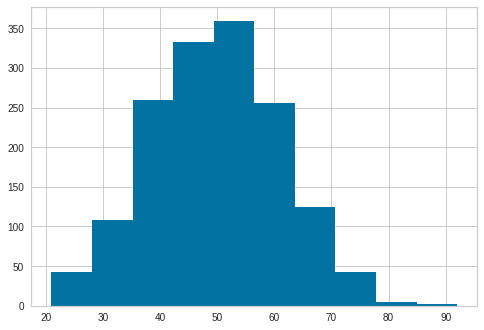

In [80]:
ABT_CANDIDATO['NR_IDADE_DATA_POSSE'].hist()

### 4- Rede Social

In [81]:
analise =(
    ABT_CANDIDATO
    .groupby('TOTAL_REDE_SOCAL')
    .agg(
        qde=('TOTAL_REDE_SOCAL', 'count'),
         )
      .reset_index()
      .sort_values('qde',ascending= False)
      )

analise.loc[:, "% de candidatos"] =(analise["qde"]/1531).map('{:.2%}'.format)
analise.head(10)

TOTAL_REDE_SOCAL  qde % de candidatos
0               0.0  840          54.87%
2               2.0  167          10.91%
1               1.0  153           9.99%
3               3.0  115           7.51%
4               4.0   94           6.14%
6               6.0   71           4.64%
5               5.0   64           4.18%
7               7.0   24           1.57%
8               8.0    3           0.20%

In [82]:
analise = ABT_CANDIDATO[['REDE_SOCIAL_facebook', 'REDE_SOCIAL_flickr', 'REDE_SOCIAL_instagram','REDE_SOCIAL_kwai', 
                 'REDE_SOCIAL_linkedin', 'REDE_SOCIAL_site','REDE_SOCIAL_telegram', 
                 'REDE_SOCIAL_tiktok', 'REDE_SOCIAL_twitter','REDE_SOCIAL_whatsapp', 'REDE_SOCIAL_youtube']]

analise = analise.transpose()

analise['QD_Rede_Social'] = analise.iloc[:,0:1531].sum(axis=1)

analise = analise[['QD_Rede_Social']].sort_values('QD_Rede_Social', ascending = False)

analise.loc[:, "% de todos candidatos"] =(analise["QD_Rede_Social"]/1531).map('{:.2%}'.format)

analise.loc[:, "% em relação a declarantes"] =(analise["QD_Rede_Social"]/691).map('{:.2%}'.format)

In [83]:
analise

QD_Rede_Social % de todos candidatos  \
REDE_SOCIAL_facebook            566.0                36.97%   
REDE_SOCIAL_instagram           561.0                36.64%   
REDE_SOCIAL_site                312.0                20.38%   
REDE_SOCIAL_twitter             245.0                16.00%   
REDE_SOCIAL_youtube             198.0                12.93%   
REDE_SOCIAL_tiktok              176.0                11.50%   
REDE_SOCIAL_linkedin             65.0                 4.25%   
REDE_SOCIAL_kwai                 15.0                 0.98%   
REDE_SOCIAL_telegram             11.0                 0.72%   
REDE_SOCIAL_flickr                4.0                 0.26%   
REDE_SOCIAL_whatsapp              4.0                 0.26%   

                      % em relação a declarantes  
REDE_SOCIAL_facebook                      81.91%  
REDE_SOCIAL_instagram                     81.19%  
REDE_SOCIAL_site                          45.15%  
REDE_SOCIAL_twitter                       35.46%  
REDE_SOCIAL_youtube                       28.65%  
REDE_SOCIAL_tiktok                        25.47%  
REDE_SOCIAL_linkedin                       9.41%  
REDE_SOCIAL_kwai                           2.17%  
REDE_SOCIAL_telegram                       1.59%  
REDE_SOCIAL_flickr                         0.58%  
REDE_SOCIAL_whatsapp                       0.58%

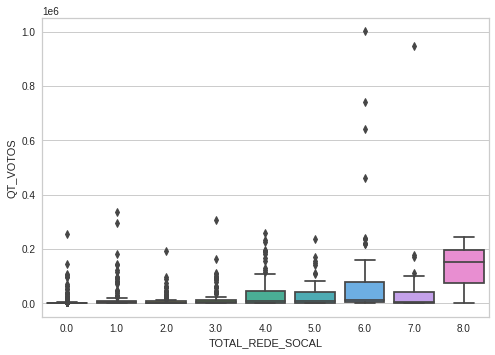

In [84]:
sns.boxplot(data=ABT_CANDIDATO, x= 'TOTAL_REDE_SOCAL', y= 'QT_VOTOS')

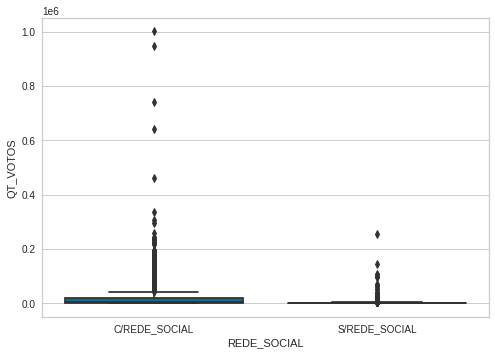

In [85]:
sns.boxplot(data=ABT_CANDIDATO, x= 'REDE_SOCIAL', y= 'QT_VOTOS')

In [86]:
lista = ['REDE_SOCIAL','TOTAL_REDE_SOCAL']

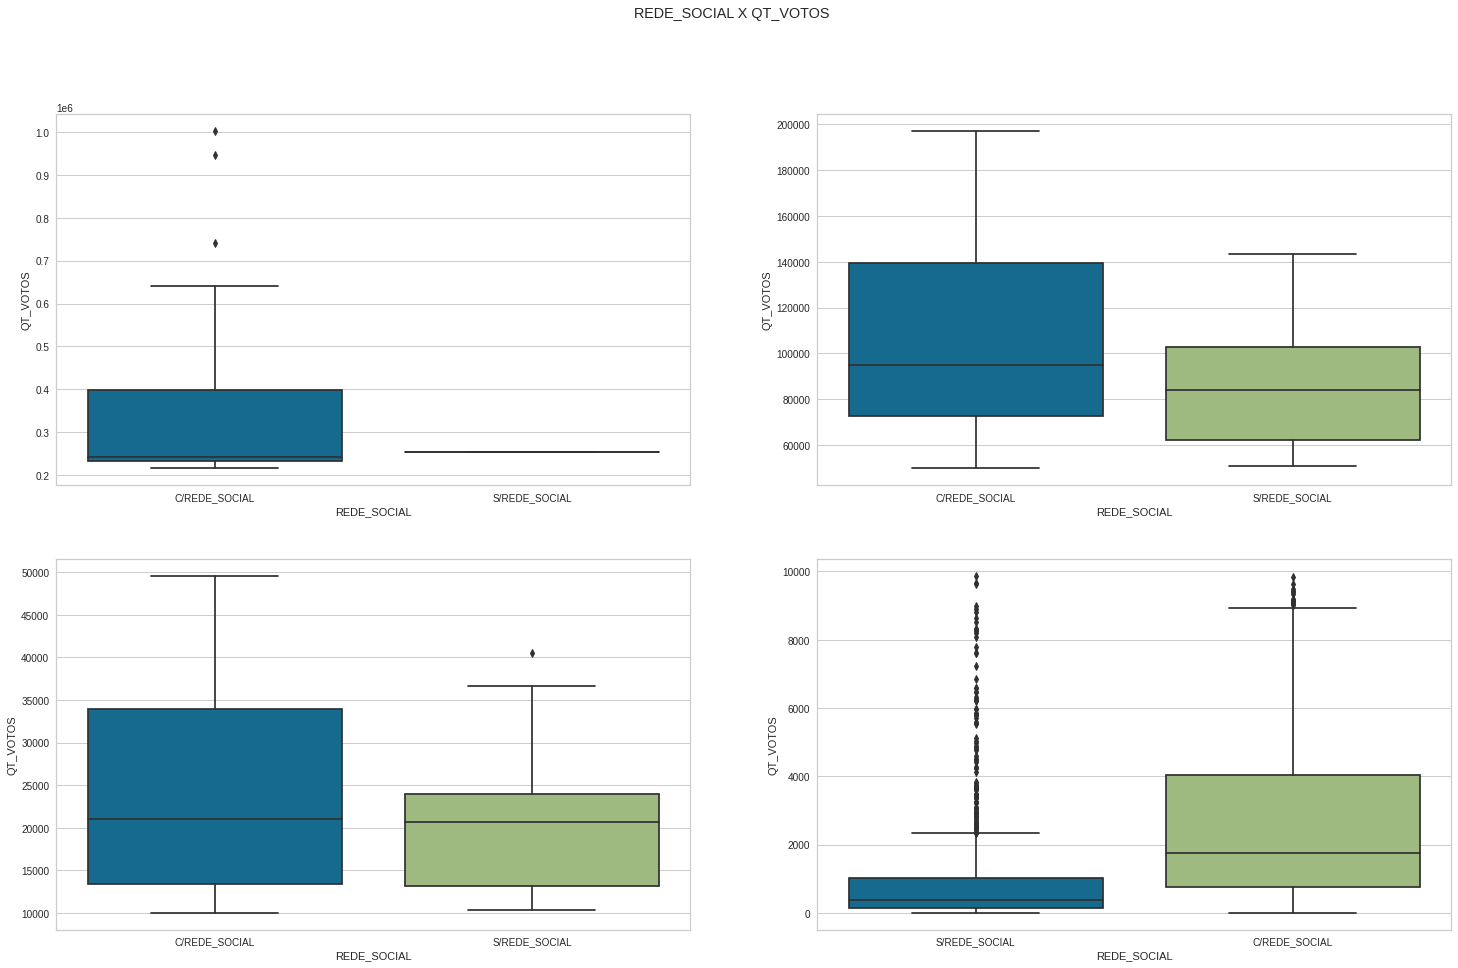

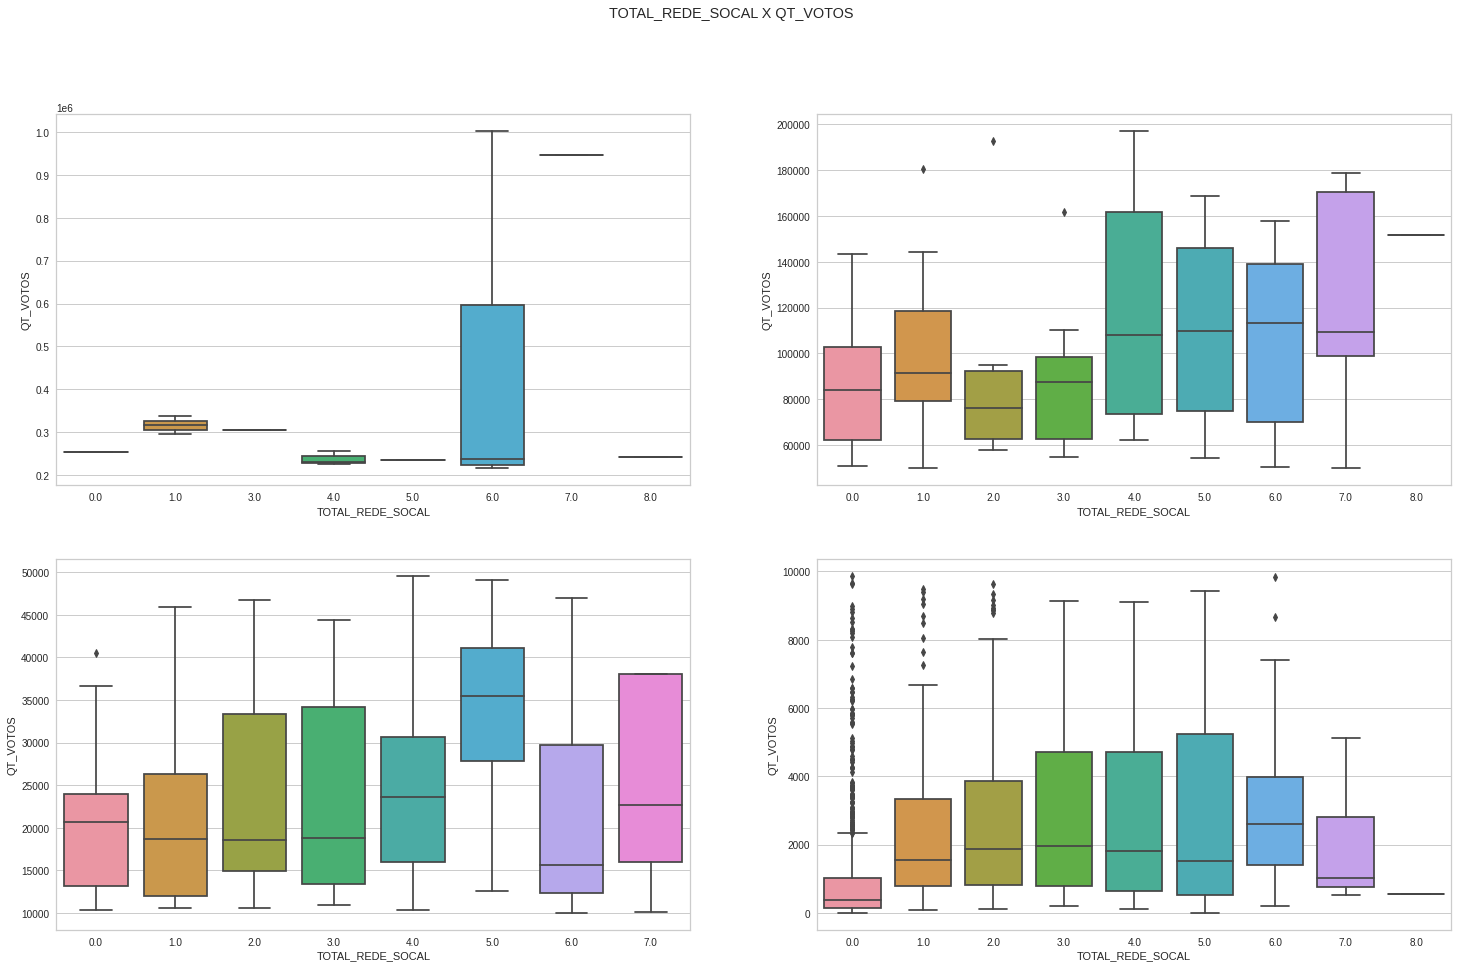

In [87]:
graficos(lista,'QT_VOTOS',ABT_CANDIDATO)

In [88]:
#Criar categoria para NÃO POSSUIR REDESOCIAL

def rede(row):  
    if row['TOTAL_REDE_SOCAL'] < 1:
        return '0'
    if row['TOTAL_REDE_SOCAL'] < 3:
        return '1-2'
    if row['TOTAL_REDE_SOCAL'] < 5:
        return '3-4'
    if row['TOTAL_REDE_SOCAL'] < 7:
        return '5-6'
    else:
        return '>7'

In [89]:
ABT_CANDIDATO['REDE_CLASSIFICAÇÃO'] = ABT_CANDIDATO.apply(lambda ABT_CANDIDATO: rede(ABT_CANDIDATO), axis=1)

In [90]:
ABT_CANDIDATO['REDE_CLASSIFICAÇÃO'].value_counts()

0      840
1-2    320
3-4    209
5-6    135
>7      27
Name: REDE_CLASSIFICAÇÃO, dtype: int64

In [91]:
abt_rede =(
    ABT_CANDIDATO
    .groupby('REDE_CLASSIFICAÇÃO')
    .agg(
        QT_VOTOS_MEDIA=('QT_VOTOS', 'mean'),
         QT_VOTOS_MEDIANA=('QT_VOTOS', 'median'),
         #QT_VOTOS_VARIANCIA=('QT_VOTOS', 'std'),
         QDE_VOTOS = ('QT_VOTOS','count')
         )
      .reset_index()
      )

In [92]:
abt_rede

REDE_CLASSIFICAÇÃO  QT_VOTOS_MEDIA  QT_VOTOS_MEDIANA  QDE_VOTOS
0                  0     2927.596429             433.0        840
1                1-2    13643.537500            2550.5        320
2                3-4    27926.057416            5734.0        209
3                5-6    59524.259259           10014.0        135
4                 >7    77693.037037            5124.0         27

In [93]:
abt_rede =(
    ABT_CANDIDATO
    .groupby('REDE_SOCIAL')
    .agg(
        QT_VOTOS_MEDIA=('QT_VOTOS', 'mean'),
         QT_VOTOS_MEDIANA=('QT_VOTOS', 'median'),
         #QT_VOTOS_VARIANCIA=('QT_VOTOS', 'std'),
         QDE_VOTOS = ('QT_VOTOS','count')
         )
      .reset_index()
      )

In [94]:
abt_rede

REDE_SOCIAL  QT_VOTOS_MEDIA  QT_VOTOS_MEDIANA  QDE_VOTOS
0  C/REDE_SOCIAL    29429.761216            3970.0        691
1  S/REDE_SOCIAL     2927.596429             433.0        840

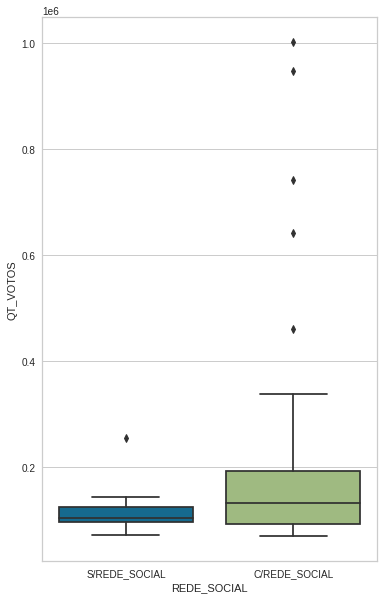

In [97]:
rede = ABT_CANDIDATO.query("QT_VOTOS>70000")
fig, axes = plt.subplots(1, 1, figsize=(6, 10))
sns.boxplot(data=rede, x= 'REDE_SOCIAL', y= 'QT_VOTOS', order=['S/REDE_SOCIAL','C/REDE_SOCIAL'])

### 5- Gastos em Campanhas

In [98]:
ABT_CANDIDATO['FIRST_ORIGEM_DESPESA'].value_counts()

S/Prestação                                                         563
Publicidade por materiais impressos                                 252
Despesas com pessoal                                                229
Serviços prestados por terceiros                                    105
Atividades de militância e mobilização de rua                       103
Despesa com Impulsionamento de Conteúdos                             78
Serviços advocatícios                                                43
Diversas a especificar                                               28
Publicidade por adesivos                                             27
Doações financeiras a outros candidatos/partidos                     19
Serviços contábeis                                                   13
Criação e inclusão de páginas na internet                            10
Produção de programas de rádio, televisão ou vídeo                   10
Encargos financeiros, taxas bancárias e/ou op. cartão de crédito

In [99]:
analise = ABT_CANDIDATO.query("VR_DESPESA_CONTRATADA >0")

In [100]:
analise['VR_DESPESA_CONTRATADA'].mean()

286645.5584504132

In [101]:
analise['VR_PESSOA_JURIDICA'].mean()

182531.8322933884

In [102]:
analise['VR_PESSOA_FISICA'].mean()

104113.72615702478

In [103]:
analise['recencia_media_DESPESA'].mean()

145.79875747636953

In [104]:
analise['recencia_STD_DESPESA'].mean()

61.64835408996431

In [105]:
ABT_CANDIDATO['VR_BEM_CANDIDATO'].mean()

809195.9252580014

In [106]:
ABT_CANDIDATO['VR_BEM_CANDIDATO'].median()

107300.0

In [107]:
analise = ABT_CANDIDATO.query("VR_DESPESA_CONTRATADA >0")
analise = analise['FIRST_ORIGEM_DESPESA'].value_counts()
analise.reset_index().rename(columns={"index": "ORIGEM_DESPESA"}).head()

ORIGEM_DESPESA  FIRST_ORIGEM_DESPESA
0            Publicidade por materiais impressos                   252
1                           Despesas com pessoal                   229
2               Serviços prestados por terceiros                   105
3  Atividades de militância e mobilização de rua                   103
4       Despesa com Impulsionamento de Conteúdos                    78

In [108]:
analise = ABT_CANDIDATO.query("VR_DESPESA_CONTRATADA >0")
analise = analise['LAST_ORIGEM_DESPESA'].value_counts()
analise.reset_index().rename(columns={"index": "ORIGEM_DESPESA"}).head()

ORIGEM_DESPESA  LAST_ORIGEM_DESPESA
0  Encargos financeiros, taxas bancárias e/ou op....                  423
1                                    Apenas um gasto                  108
2    Taxa de Administração de Financiamento Coletivo                   50
3                Publicidade por materiais impressos                   35
4            Produção de jingles, vinhetas e slogans                   31

In [109]:
## NÃO ACHEI NECESSIDADE NESSA ANÁLISE NÃO ENCONTREI NADA QUE AJUDOU NA ANÁLISE
analise = ABT_CANDIDATO.query("VR_DESPESA_CONTRATADA >0")
analise = analise['FIRST_DS_DOCUMENTO'].value_counts()
analise.reset_index().rename(columns={"index": "DS_DESPESA"}).head()

DS_DESPESA  FIRST_DS_DOCUMENTO
0        Outro                 471
1  Nota Fiscal                 426
2       Recibo                  30
3       #NULO#                  24
4       Fatura                  10

In [110]:
analise = (
    ABT_CANDIDATO
    .groupby('FIRST_ORIGEM_DESPESA')
    .agg(
        MEDIA_DESPESA =('VR_FIRST_ORIGEM_DESPESA','mean'),
        TOTAL_DESPESA =('VR_FIRST_ORIGEM_DESPESA','sum'),
         QTD_DESPESA =('VR_FIRST_ORIGEM_DESPESA','count'),
        MEDIA_PCT_GASTO =('%_FIRST_GASTO_TOTAL','mean')
    )
    .reset_index()
    .sort_values('MEDIA_PCT_GASTO',ascending=False)
    )

In [111]:
analise.head()

FIRST_ORIGEM_DESPESA  MEDIA_DESPESA  \
25    Taxa de Administração de Financiamento Coletivo       19.36000   
10  Encargos financeiros, taxas bancárias e/ou op....       14.23125   
3                        Combustíveis e lubrificantes      937.54000   
0          Aquisição/Doação de bens móveis ou imóveis      874.51500   
13            Produção de jingles, vinhetas e slogans     9837.50000   

    TOTAL_DESPESA  QTD_DESPESA  MEDIA_PCT_GASTO  
25          77.44            4         1.000000  
10         113.85            8         1.000000  
3         1875.08            2         0.876770  
0         1749.03            2         0.807417  
13       39350.00            4         0.701908

In [112]:
analise = (
    ABT_CANDIDATO
    .groupby('LAST_ORIGEM_DESPESA')
    .agg(
        MEDIA_DESPESA =('VR_LAST_ORIGEM_DESPESA','mean'),
        TOTAL_DESPESA =('VR_LAST_ORIGEM_DESPESA','sum'),


         QTD_DESPESA =('VR_LAST_ORIGEM_DESPESA','count'),
        MEDIA_PCT_GASTO =('%_LAST_GASTO_TOTAL','mean')
    )
    .query("MEDIA_PCT_GASTO <1")
    .sort_values('MEDIA_DESPESA',ascending=False)
    .reset_index()
    
    )

In [113]:
analise.head()

LAST_ORIGEM_DESPESA  MEDIA_DESPESA  \
0                     Pesquisas ou testes eleitorais    7000.000000   
1  Produção de programas de rádio, televisão ou v...    4125.000000   
2                     Locação/cessão de bens imóveis    3690.909091   
3                      Cessão ou locação de veículos    3253.222500   
4                              Serviços advocatícios    3179.111111   

   TOTAL_DESPESA  QTD_DESPESA  MEDIA_PCT_GASTO  
0        7000.00            1         0.023057  
1       16500.00            4         0.151483  
2       40600.00           11         0.142380  
3       26025.78            8         0.046332  
4       28612.00            9         0.139647

In [114]:
ABT_CANDIDATO

NR_CANDIDATO                      NM_CANDIDATO DS_SITUACAO_CANDIDATURA  \
0             1000        CELSO UBIRAJARA RUSSOMANNO                    APTO   
1             1001   DANIEL FERNANDO DE SOUZA CAMILO                    APTO   
2             1002               HELIO ALVES RIBEIRO                    APTO   
3             1003            VAGNER JOSE DOS SANTOS                    APTO   
4             1004        CLAUDIA CASTALDELLI CORRÊA                    APTO   
...            ...                               ...                     ...   
1526          9095             JOÃO GOMES DE ALMEIDA                  INAPTO   
1527          9096        TASSIO RENAM SOUZA BOTELHO                    APTO   
1528          9097  JÓ RODRIGUES COSTA DO NASCIMENTO                    APTO   
1529          9098       ELISANGELA CLENILDA NOBREGA                    APTO   
1530          9099        HOMERO DE GIORGE CERQUEIRA                    APTO   

     DS_DETALHE_SITUACAO_CAND    TP_AGREMIACAO  \
0                    DEFERIDO  PARTIDO ISOLADO   
1                    DEFERIDO  PARTIDO ISOLADO   
2                    DEFERIDO  PARTIDO ISOLADO   
3                    DEFERIDO  PARTIDO ISOLADO   
4                    DEFERIDO  PARTIDO ISOLADO   
...                       ...              ...   
1526                 RENÚNCIA  PARTIDO ISOLADO   
1527                 DEFERIDO  PARTIDO ISOLADO   
1528                 DEFERIDO  PARTIDO ISOLADO   
1529                 DEFERIDO  PARTIDO ISOLADO   
1530                 DEFERIDO  PARTIDO ISOLADO   

                               NM_PARTIDO     NM_COLIGACAO  \
0                            REPUBLICANOS  PARTIDO ISOLADO   
1                            REPUBLICANOS  PARTIDO ISOLADO   
2                            REPUBLICANOS  PARTIDO ISOLADO   
3                            REPUBLICANOS  PARTIDO ISOLADO   
4                            REPUBLICANOS  PARTIDO ISOLADO   
...                                   ...              ...   
1526  PARTIDO REPUBLICANO DA ORDEM SOCIAL  PARTIDO ISOLADO   
1527  PARTIDO REPUBLICANO DA ORDEM SOCIAL  PARTIDO ISOLADO   
1528  PARTIDO REPUBLICANO DA ORDEM SOCIAL  PARTIDO ISOLADO   
1529  PARTIDO REPUBLICANO DA ORDEM SOCIAL  PARTIDO ISOLADO   
1530  PARTIDO REPUBLICANO DA ORDEM SOCIAL  PARTIDO ISOLADO   

     DS_COMPOSICAO_COLIGACAO DS_NACIONALIDADE SG_UF_NASCIMENTO  ...  \
0               REPUBLICANOS  BRASILEIRA NATA               SP  ...   
1               REPUBLICANOS  BRASILEIRA NATA               SP  ...   
2               REPUBLICANOS  BRASILEIRA NATA               PR  ...   
3               REPUBLICANOS  BRASILEIRA NATA               SP  ...   
4               REPUBLICANOS  BRASILEIRA NATA               SP  ...   
...                      ...              ...              ...  ...   
1526                    PROS  BRASILEIRA NATA               PR  ...   
1527                    PROS  BRASILEIRA NATA               GO  ...   
1528                    PROS  BRASILEIRA NATA               SP  ...   
1529                    PROS  BRASILEIRA NATA               PB  ...   
1530                    PROS  BRASILEIRA NATA               SP  ...   

     REDE_SOCIAL_tiktok  REDE_SOCIAL_twitter REDE_SOCIAL_whatsapp  \
0                   0.0                  0.0                  0.0   
1                   0.0                  0.0                  0.0   
2                   0.0                  0.0                  0.0   
3                   0.0                  0.0                  0.0   
4                   0.0                  0.0                  0.0   
...                 ...                  ...                  ...   
1526                0.0                  0.0                  0.0   
1527                0.0                  0.0                  0.0   
1528                0.0                  0.0                  0.0   
1529                0.0                  0.0                  0.0   
1530                0.0                  1.0                  0.0   

     REDE_SOCIAL_

### 6- Análise de Resultados (Votação)

In [115]:
ABT_CANDIDATO['DS_SIT_TOT_TURNO'].value_counts().reset_index()

index  DS_SIT_TOT_TURNO
0          SUPLENTE               781
1        NÃO ELEITO               607
2            #NULO#                73
3     ELEITO POR QP                60
4  ELEITO POR MÉDIA                10

In [116]:
ABT_CANDIDATO['ST_REELEICAO'].value_counts().reset_index()

index  ST_REELEICAO
0     N          1461
1     S            70

In [117]:
ABT_CANDIDATO['DFS_MUNICIPIO'].describe()

count    1531.000000
mean      157.417374
std       162.795385
min         0.000000
25%        39.000000
50%        95.000000
75%       218.500000
max       645.000000
Name: DFS_MUNICIPIO, dtype: float64

### 7- Análise de valor do bem do candidato

In [118]:
analise =(
    ABT_CANDIDATO
    .groupby('BEM_CLASSIFICAÇÃO')
    .agg(
        qde=('BEM_CLASSIFICAÇÃO', 'count'),
         )
      .reset_index()

      )

analise.loc[:, "% de candidatos"] =(analise["qde"]/1531).map('{:.2%}'.format)
analise.head(10)

BEM_CLASSIFICAÇÃO  qde % de candidatos
0      10000-100000  199          13.00%
1    100000-1000000  524          34.23%
2            <10000  552          36.05%
3              >1mi  256          16.72%

## Análise Bivariada

### Rede social

In [119]:
teste = ABT_CANDIDATO.select_dtypes(include=['object']).columns.to_list()

<ipython-input-68-9e414c4fa072>:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(2, 2, figsize=(25, 15))
<ipython-input-68-9e414c4fa072>:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(2, 2, figsize=(25, 15))
<ipython-input-68-9e414c4fa072>:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max

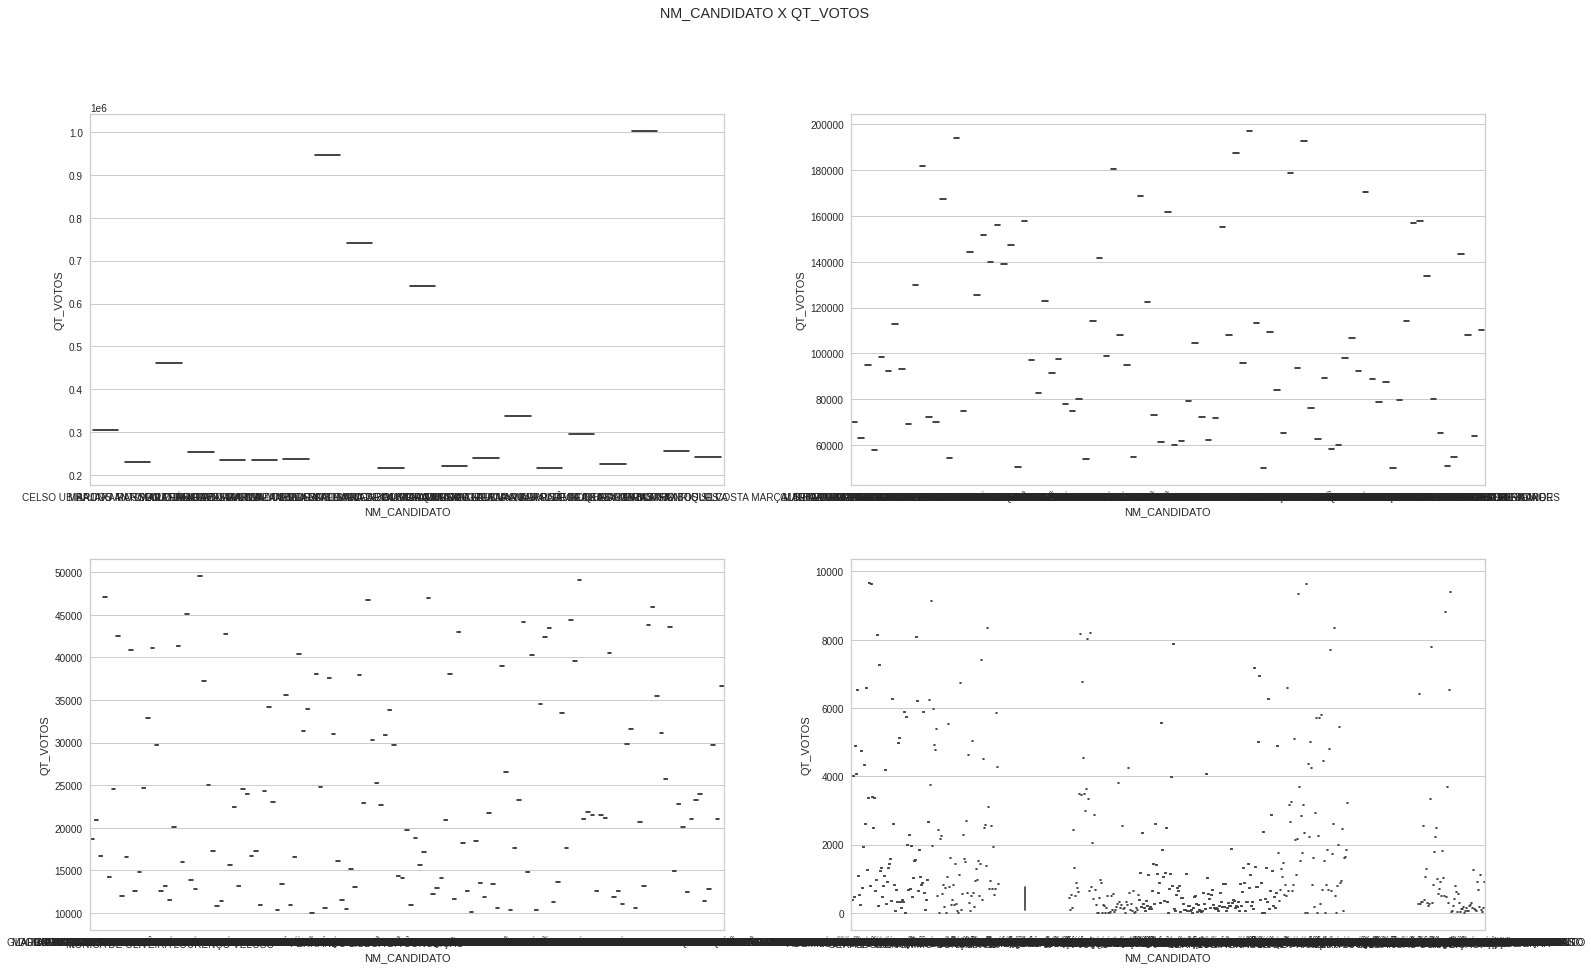

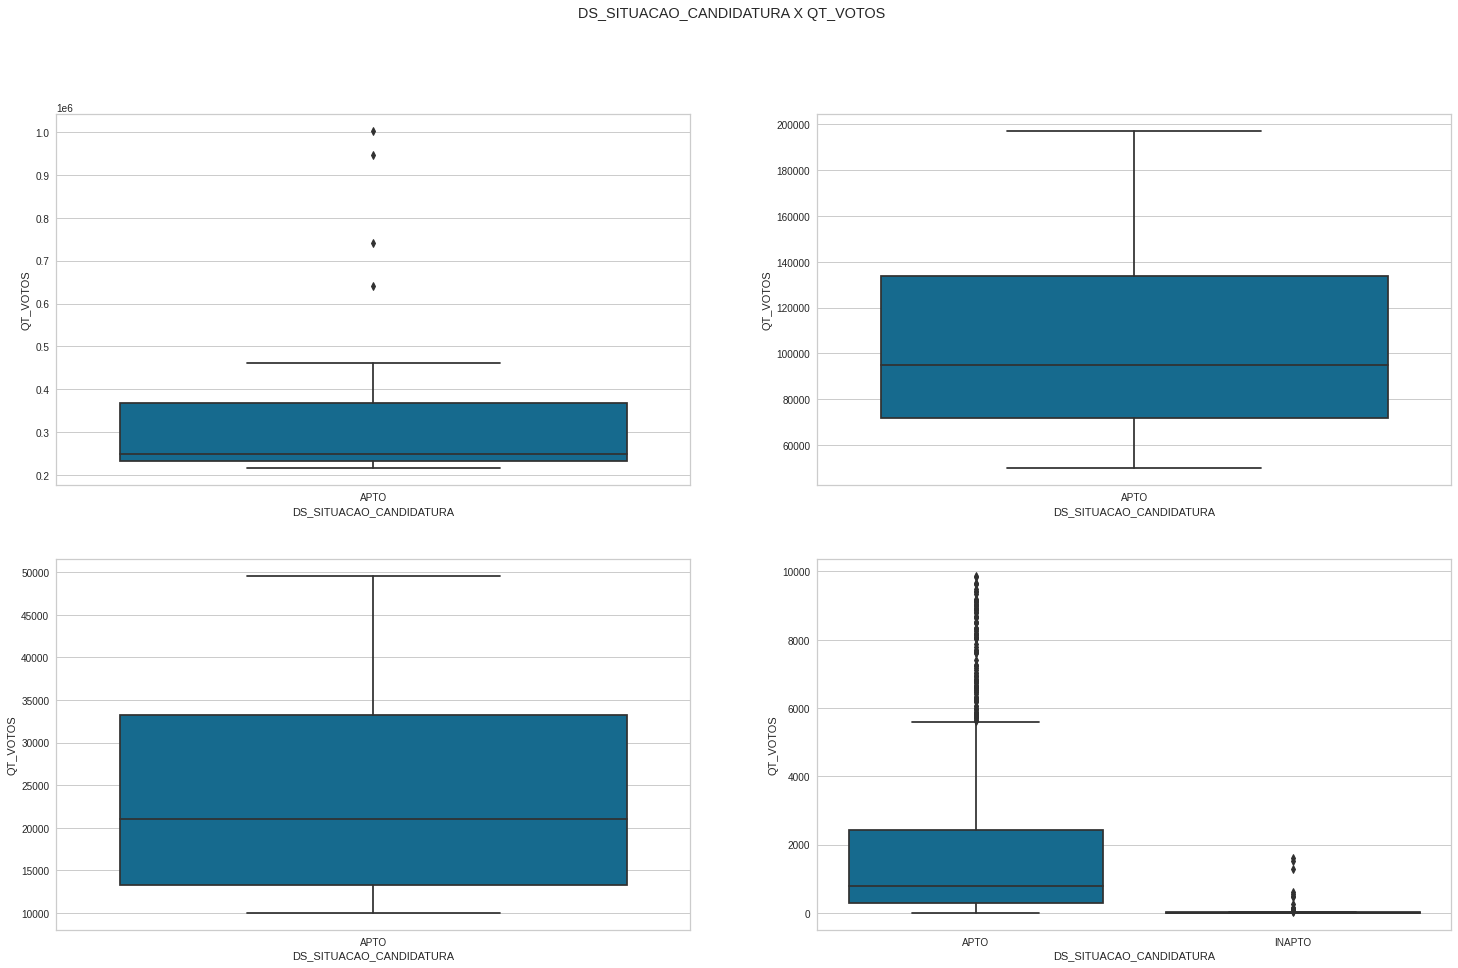

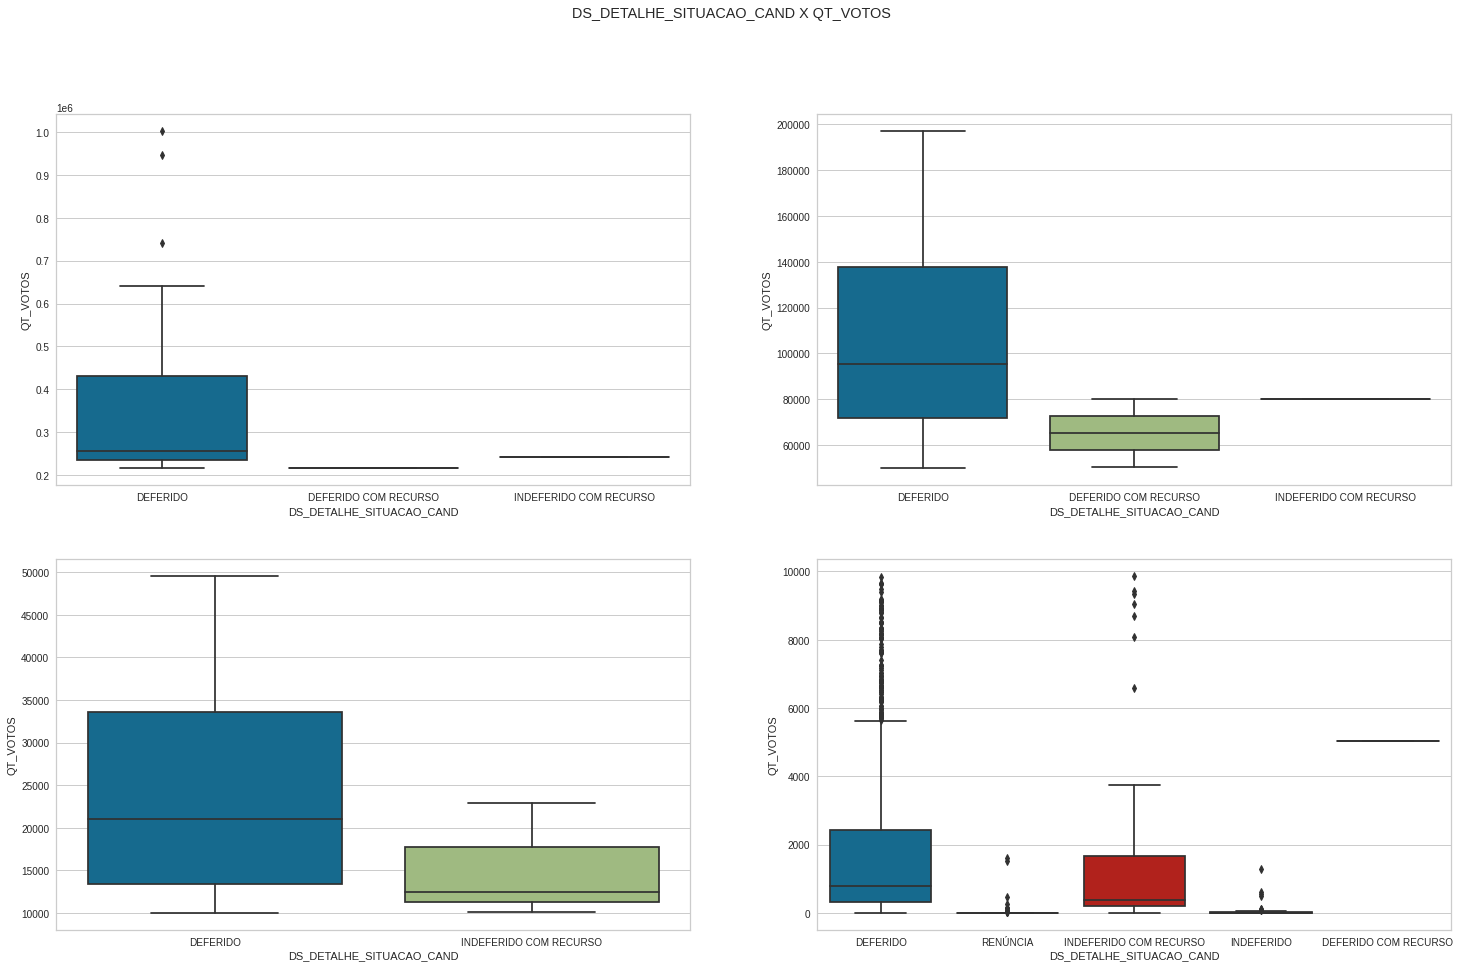

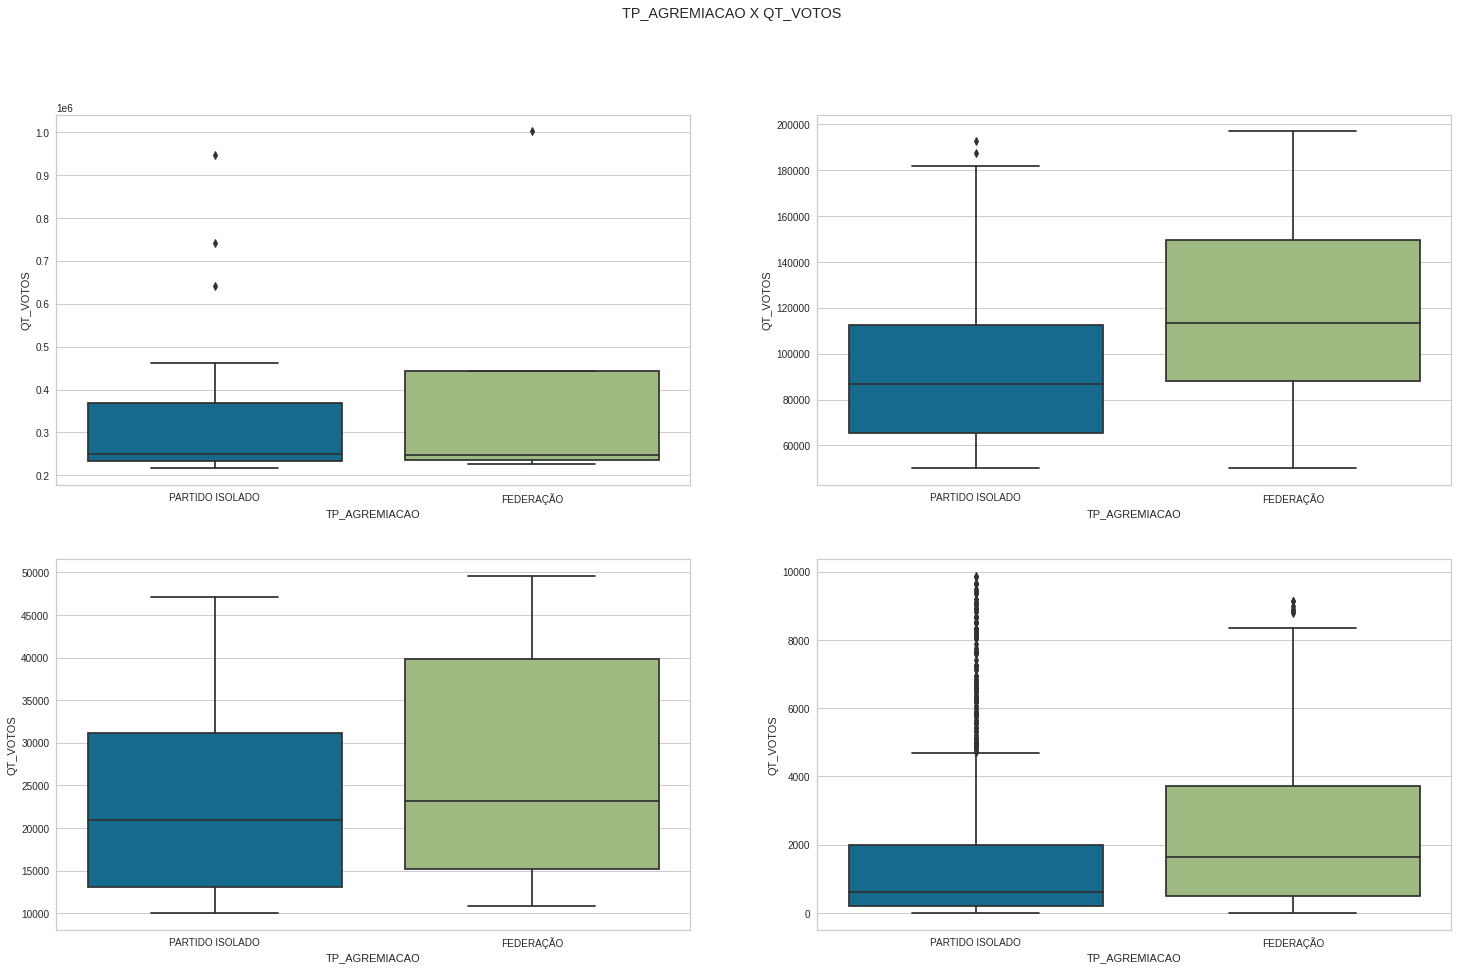

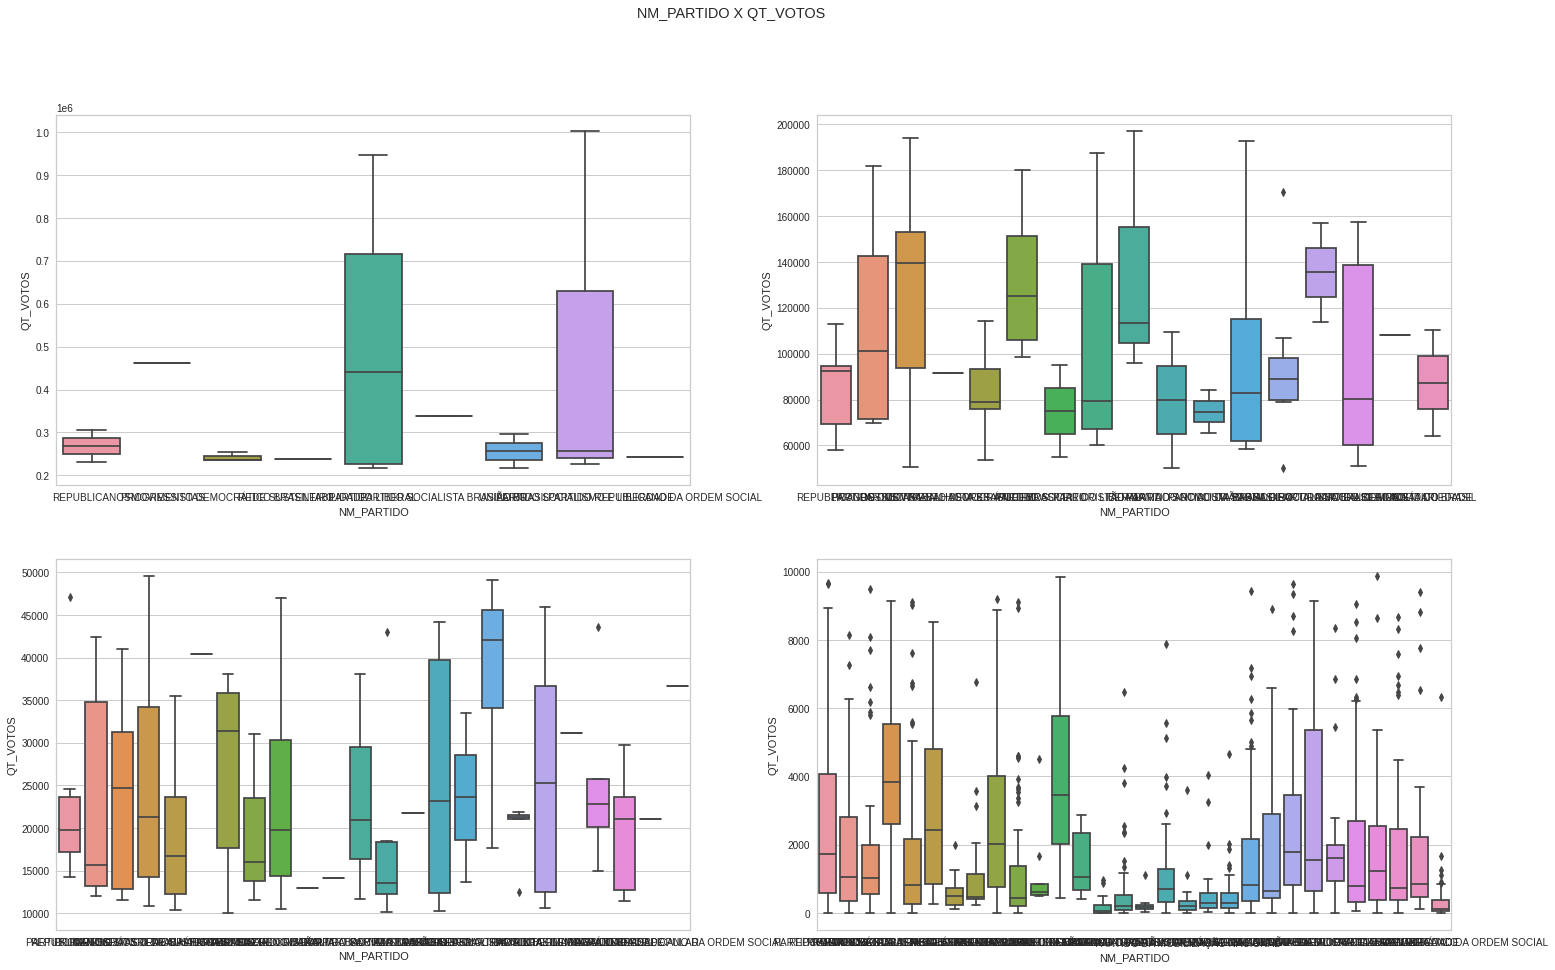

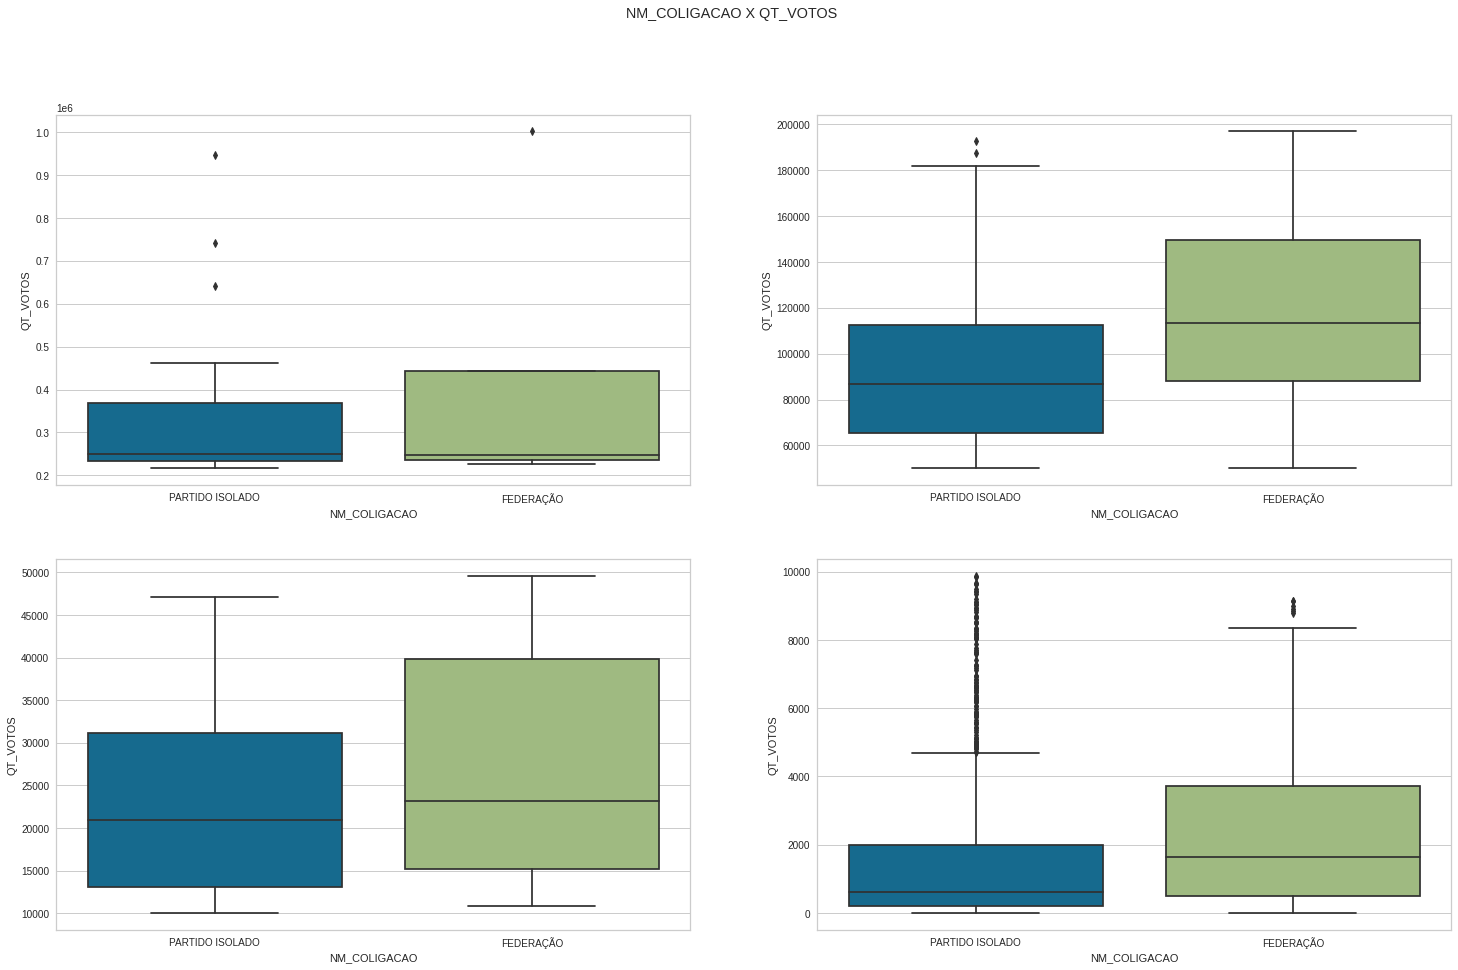

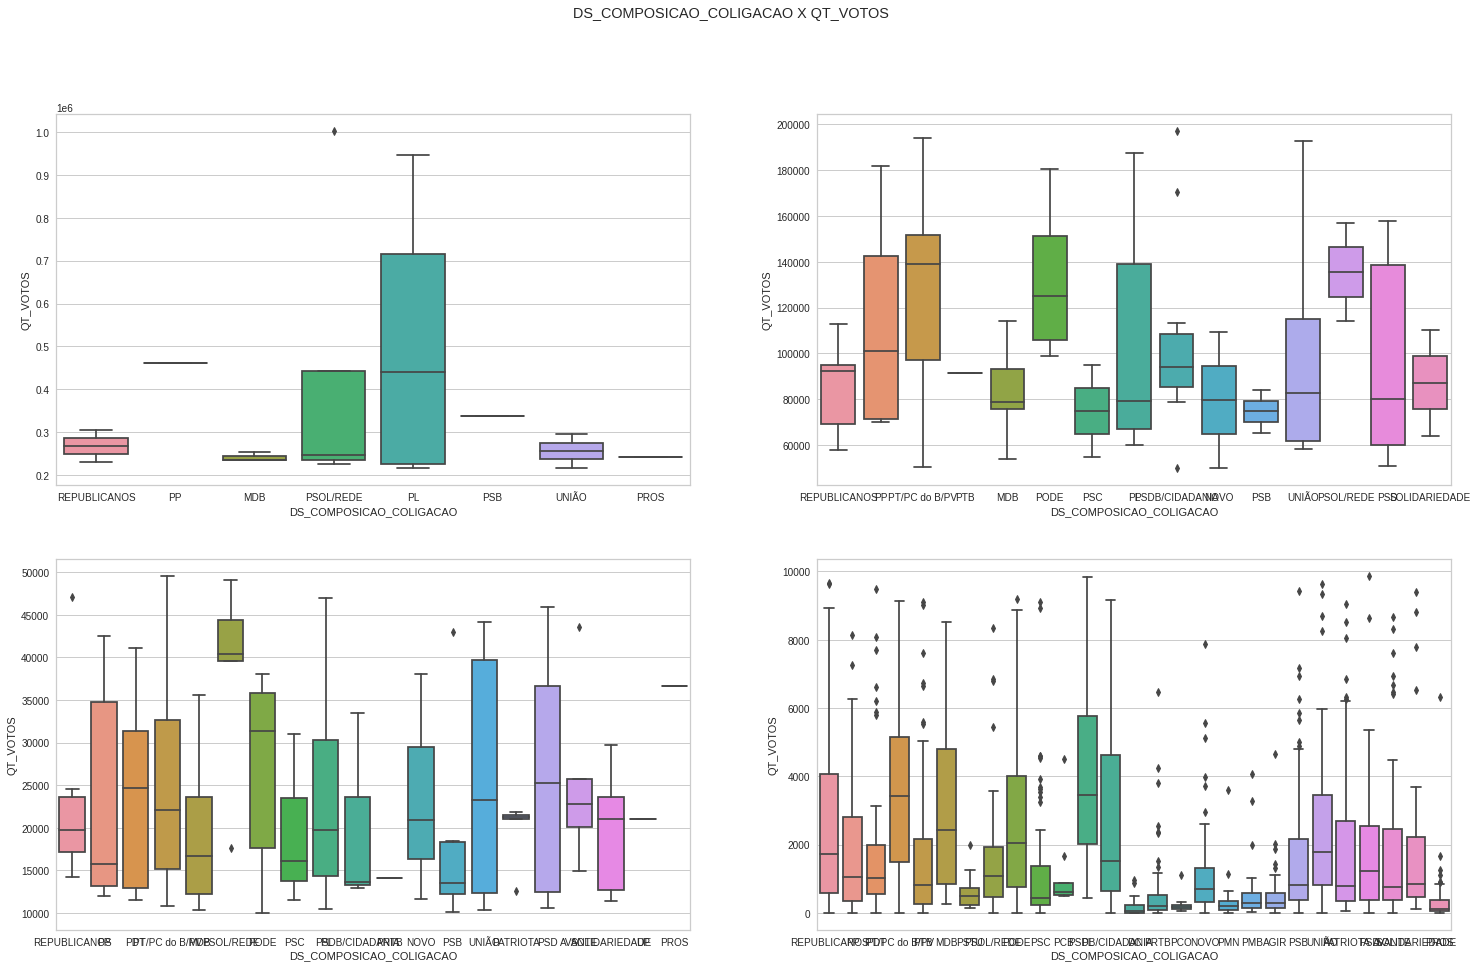

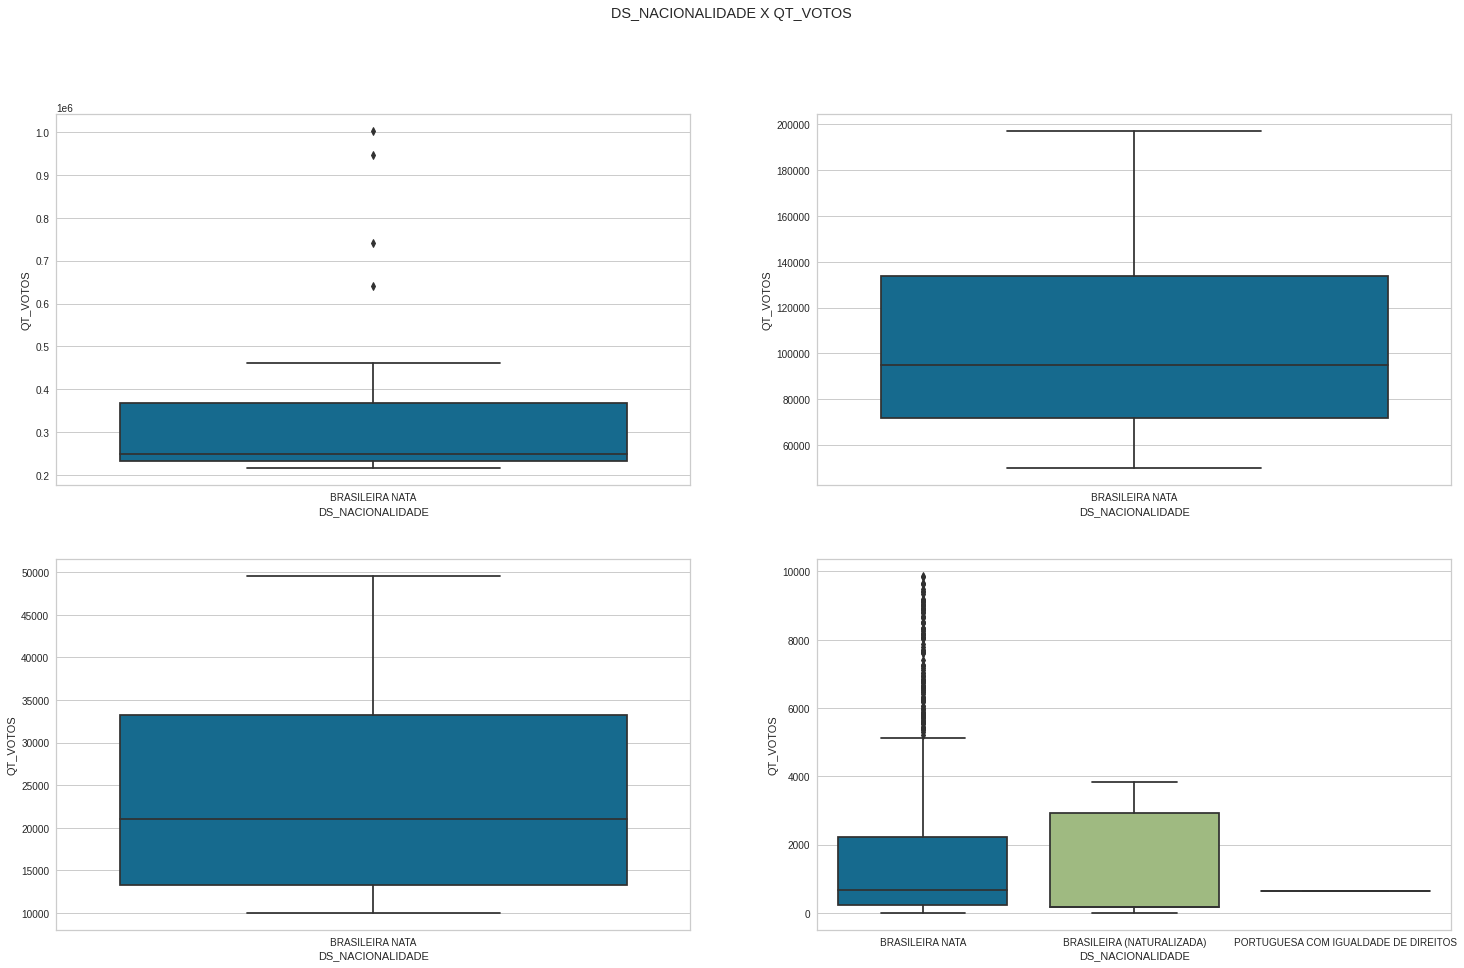

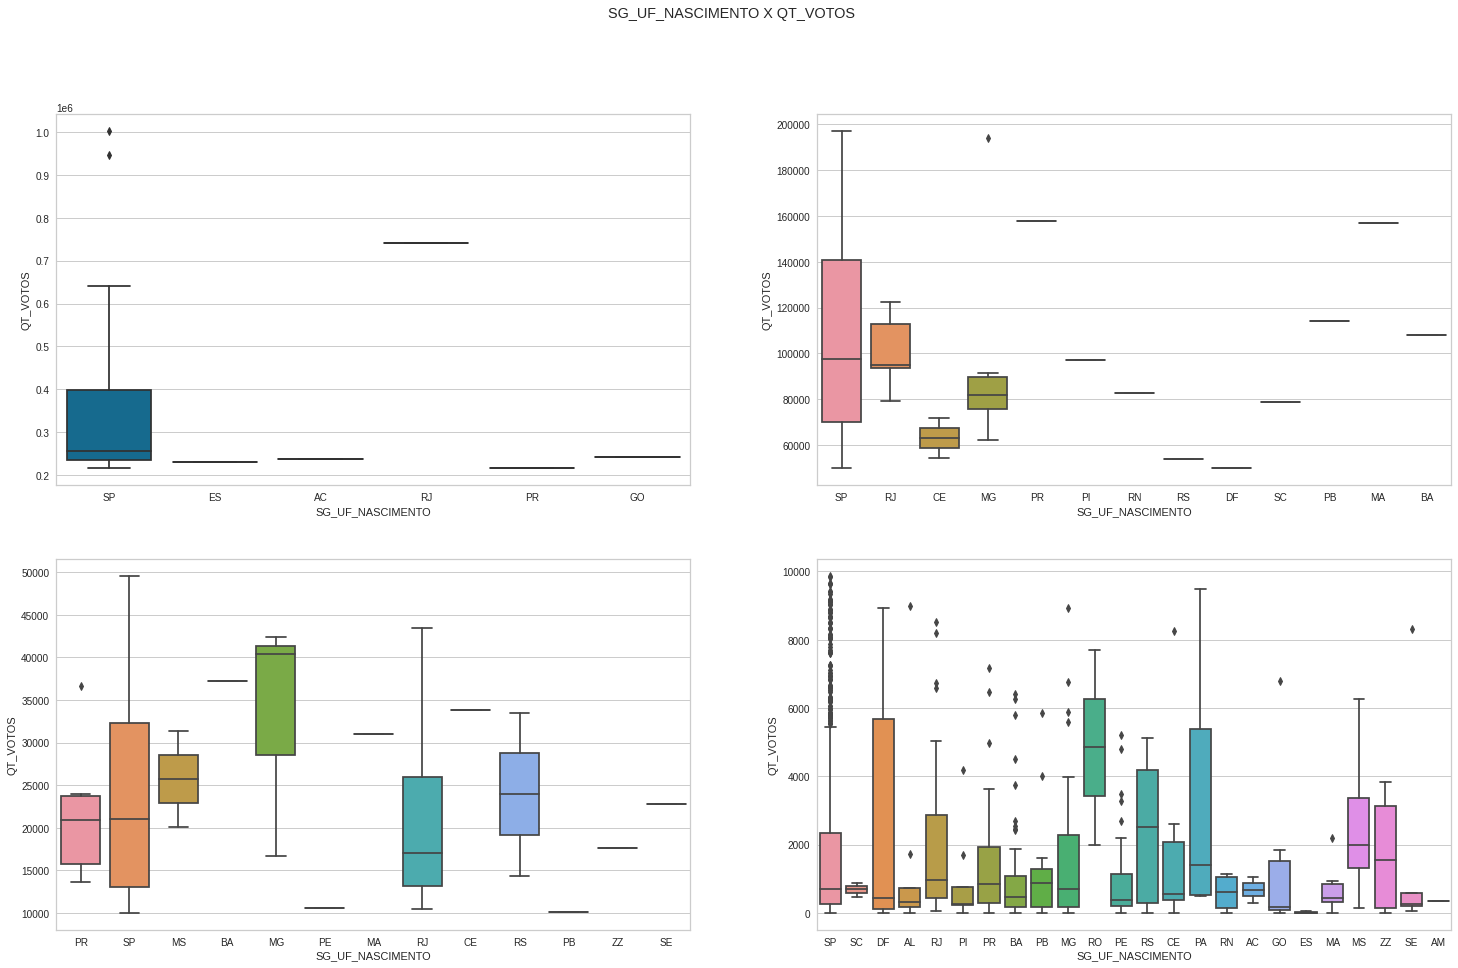

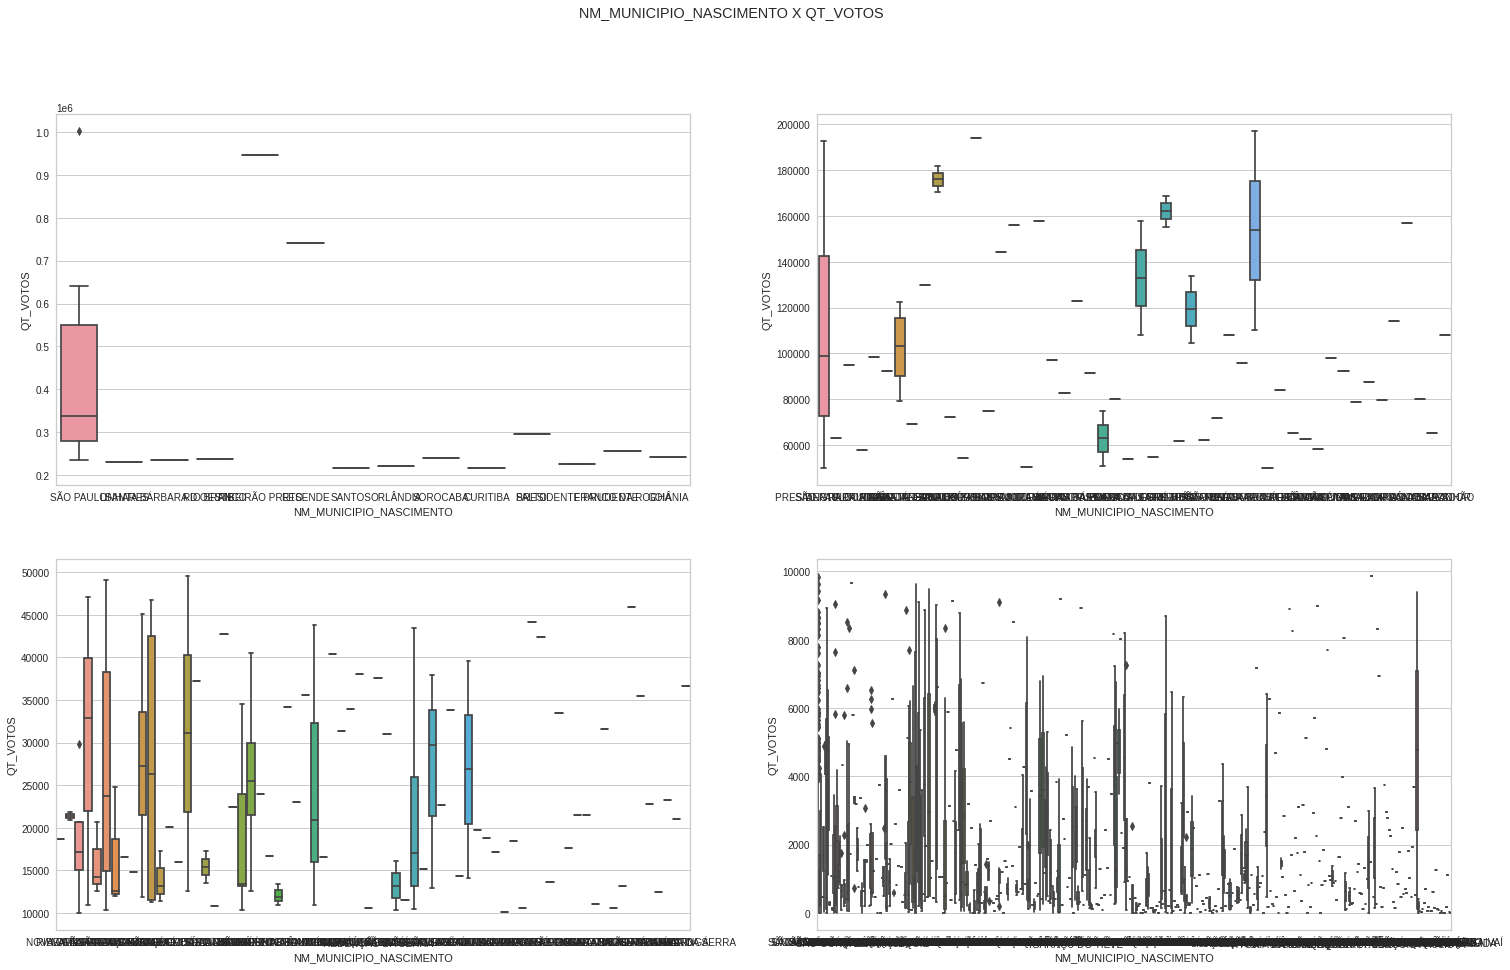

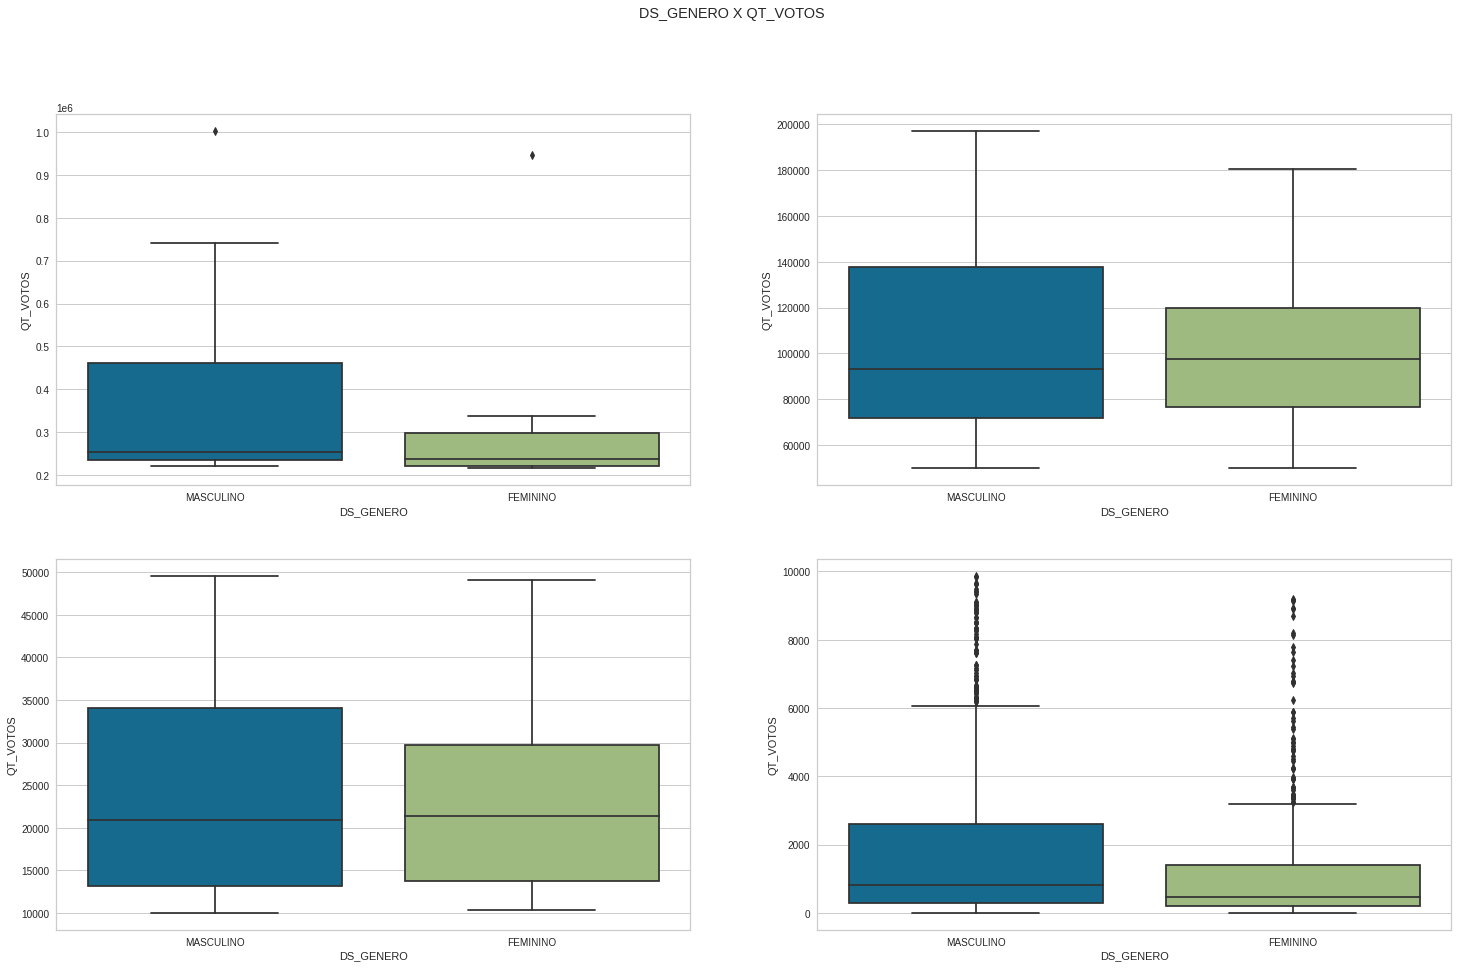

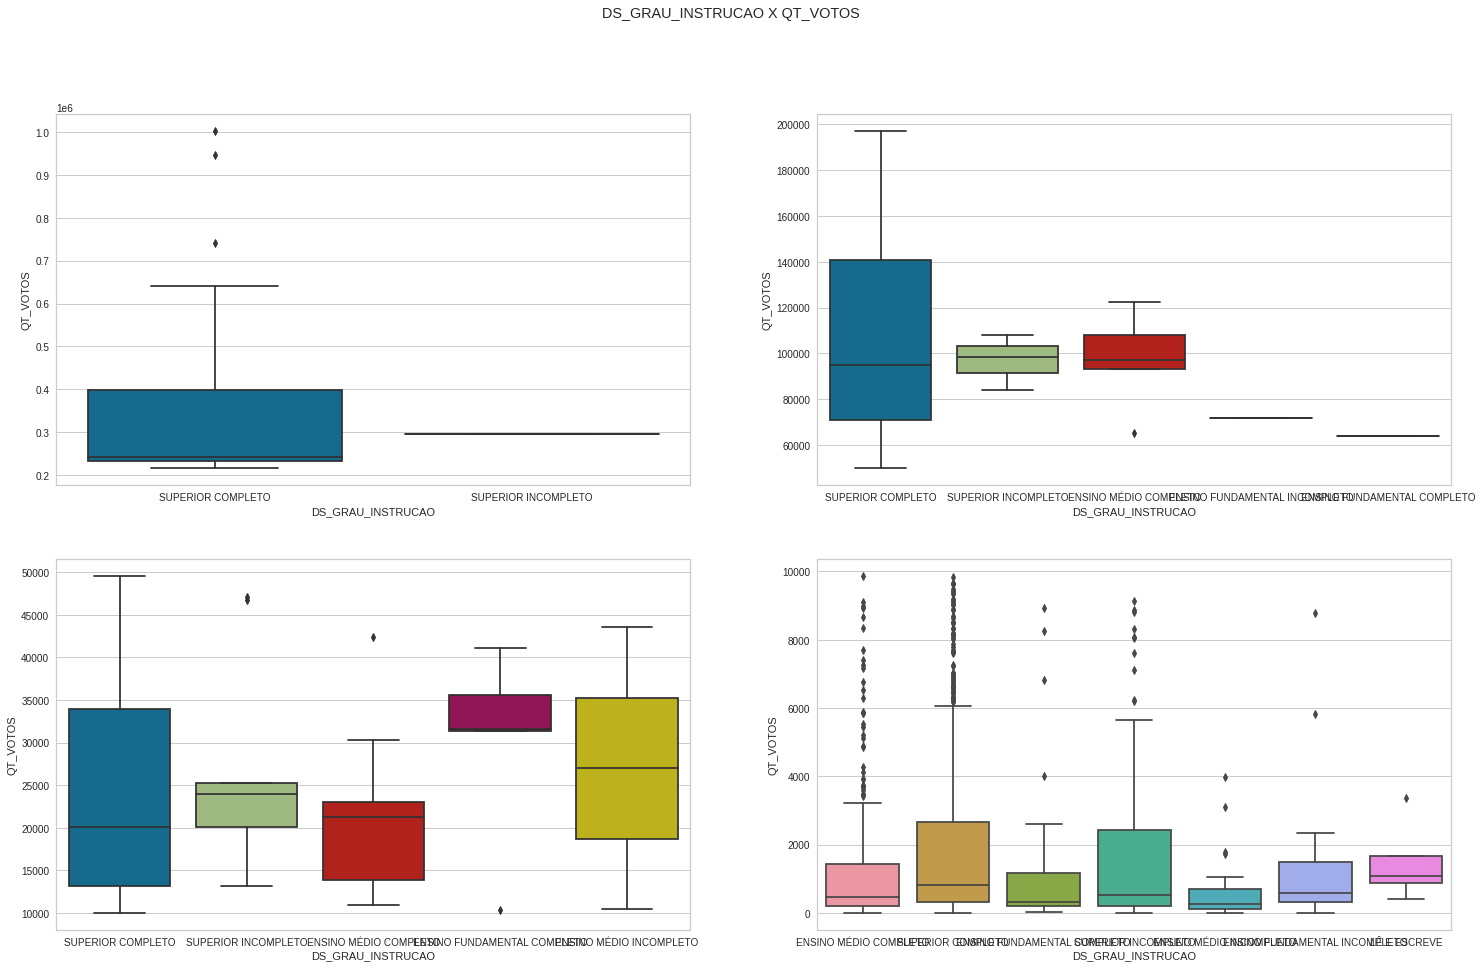

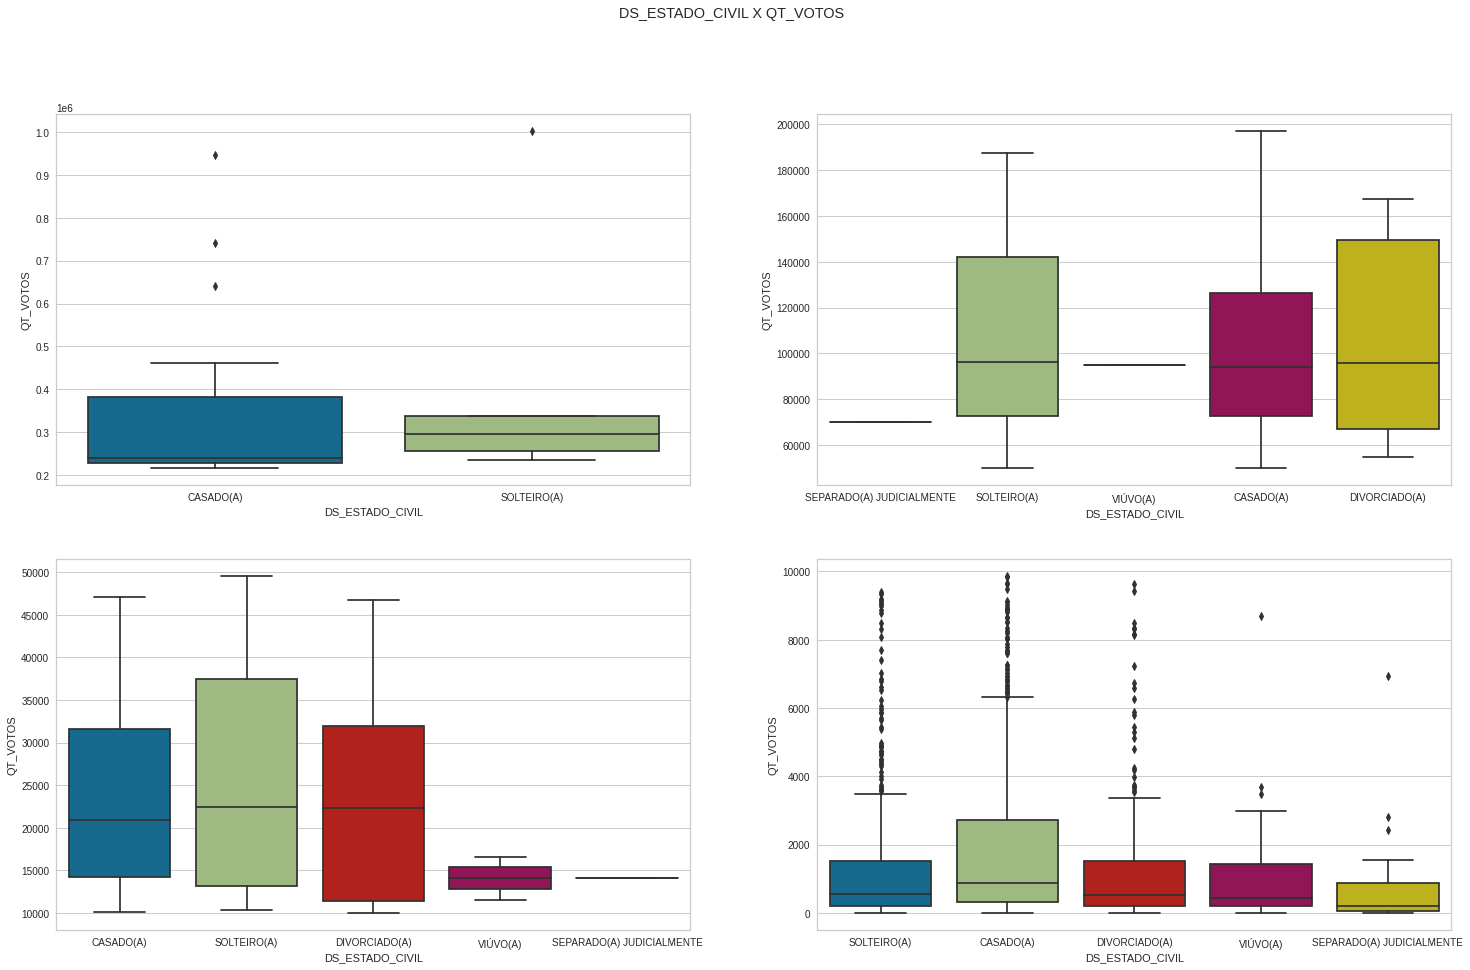

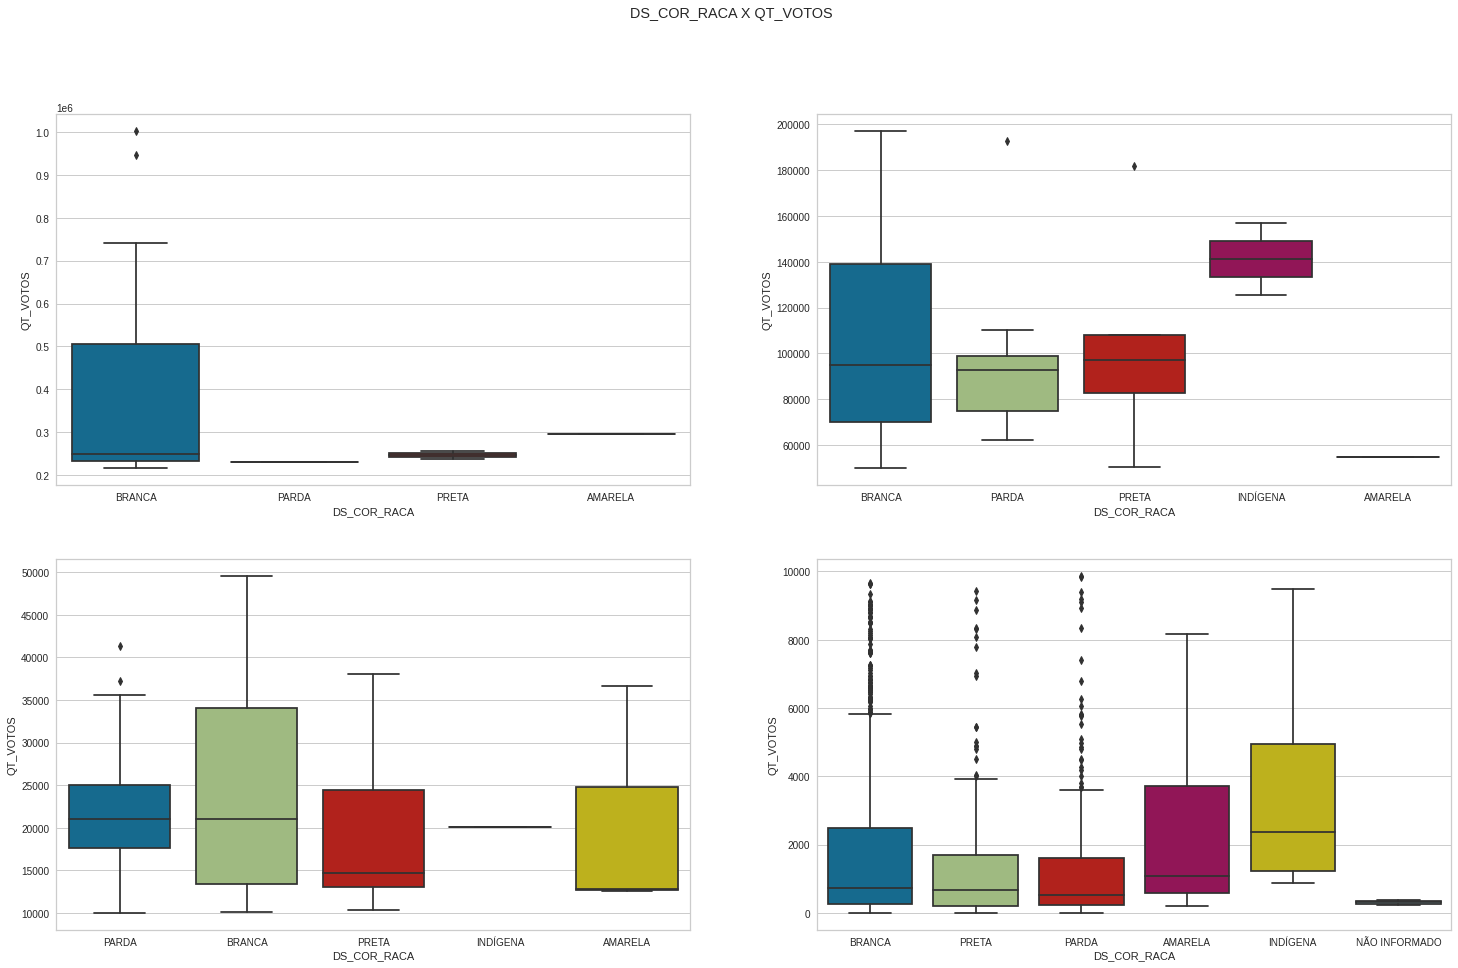

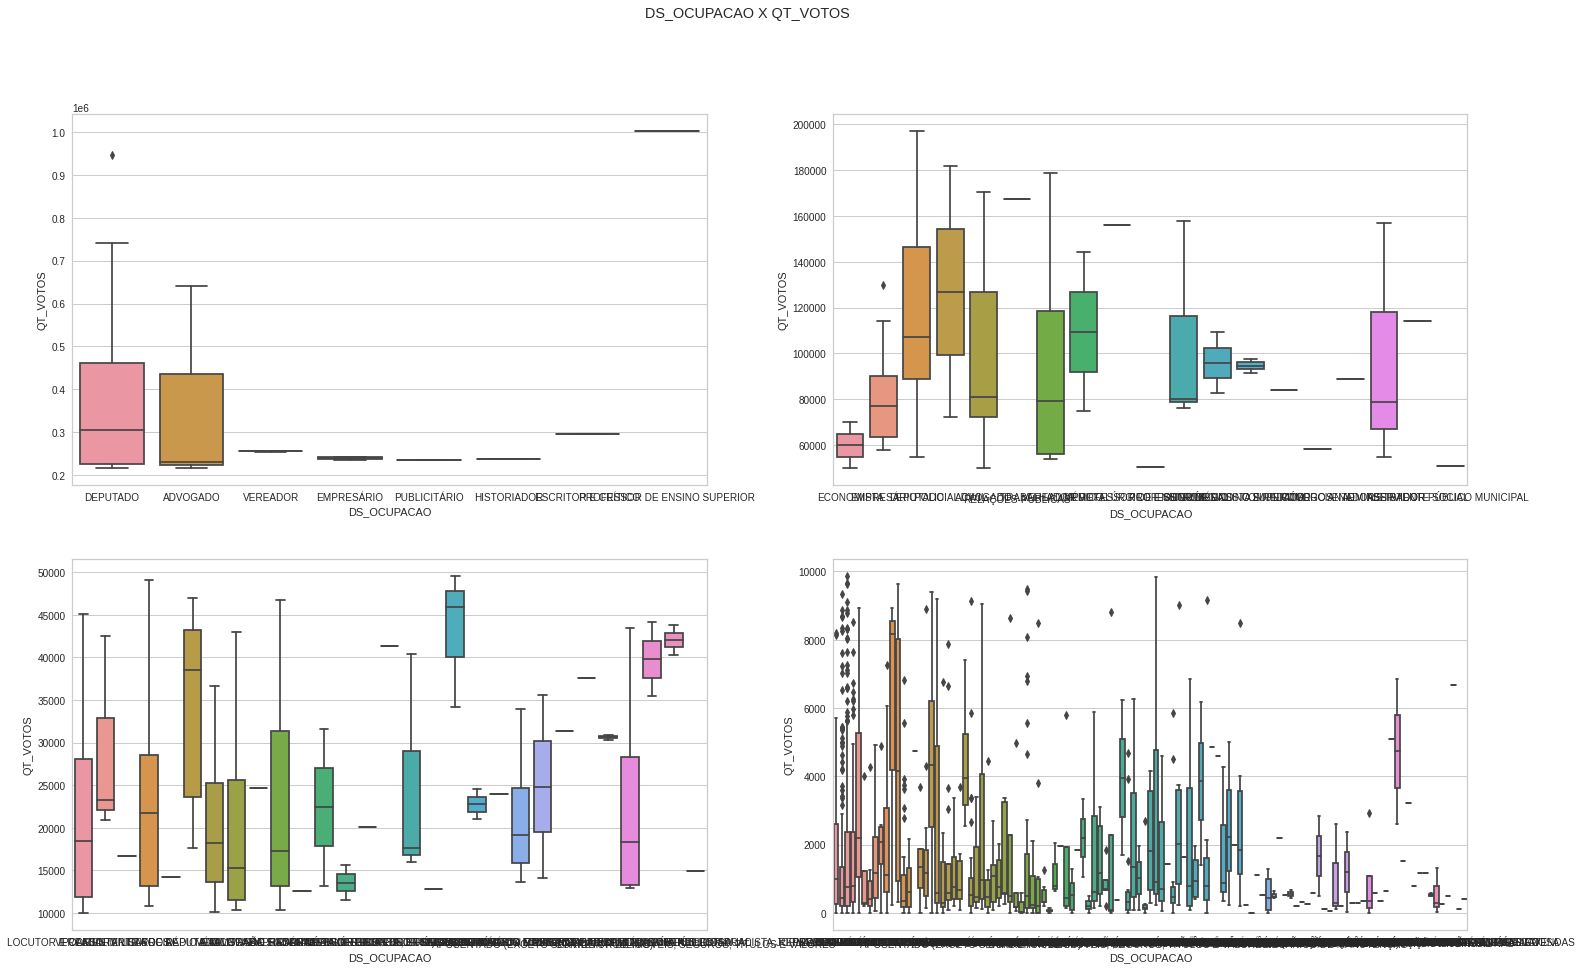

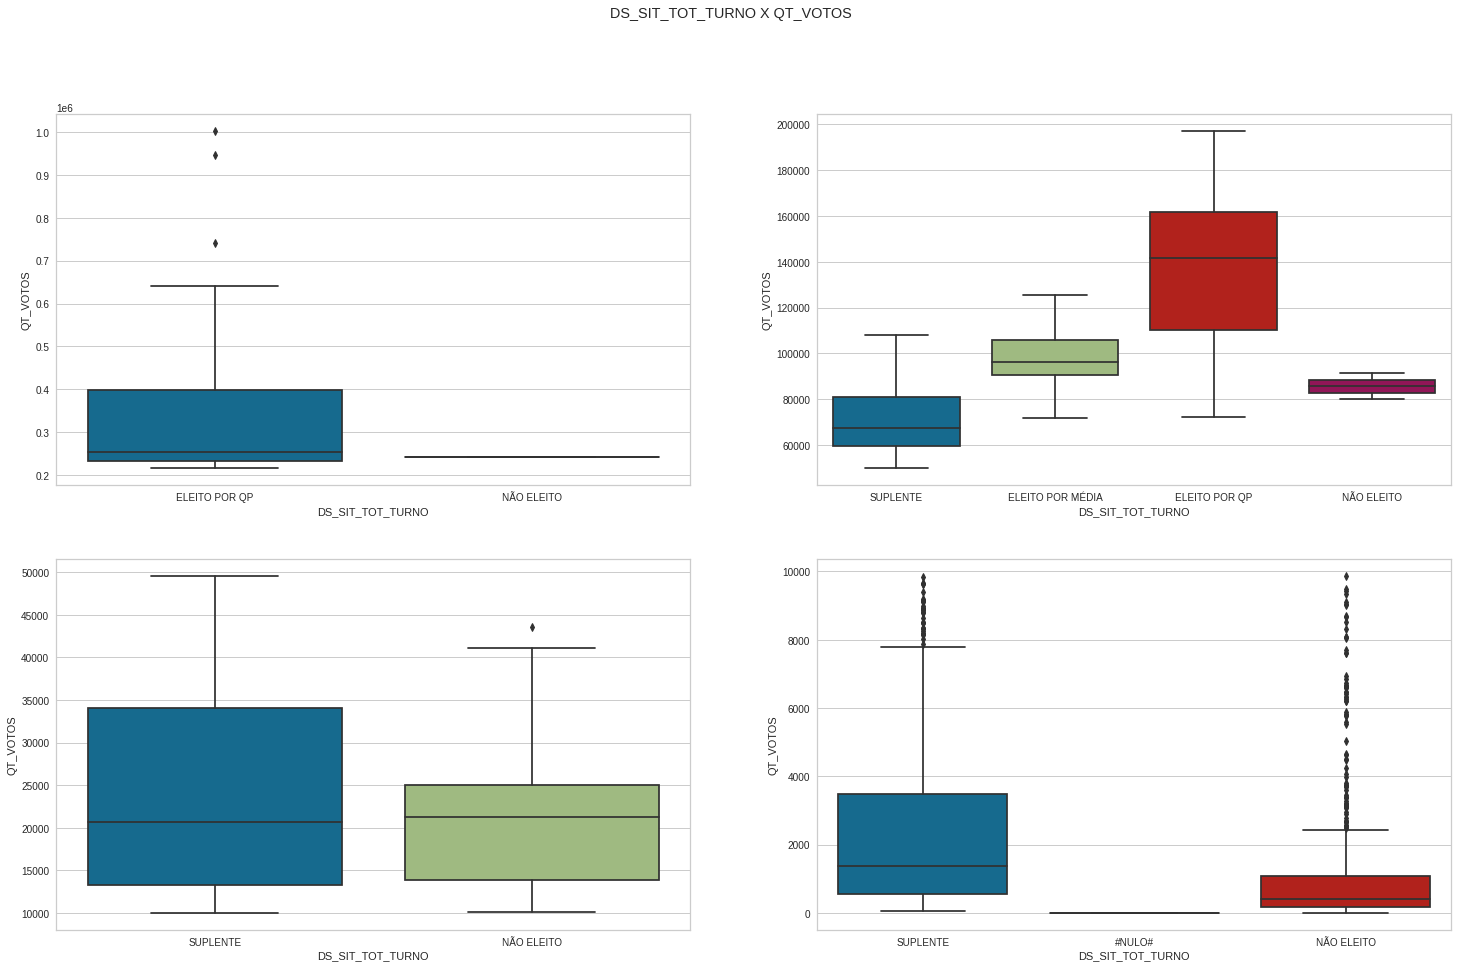

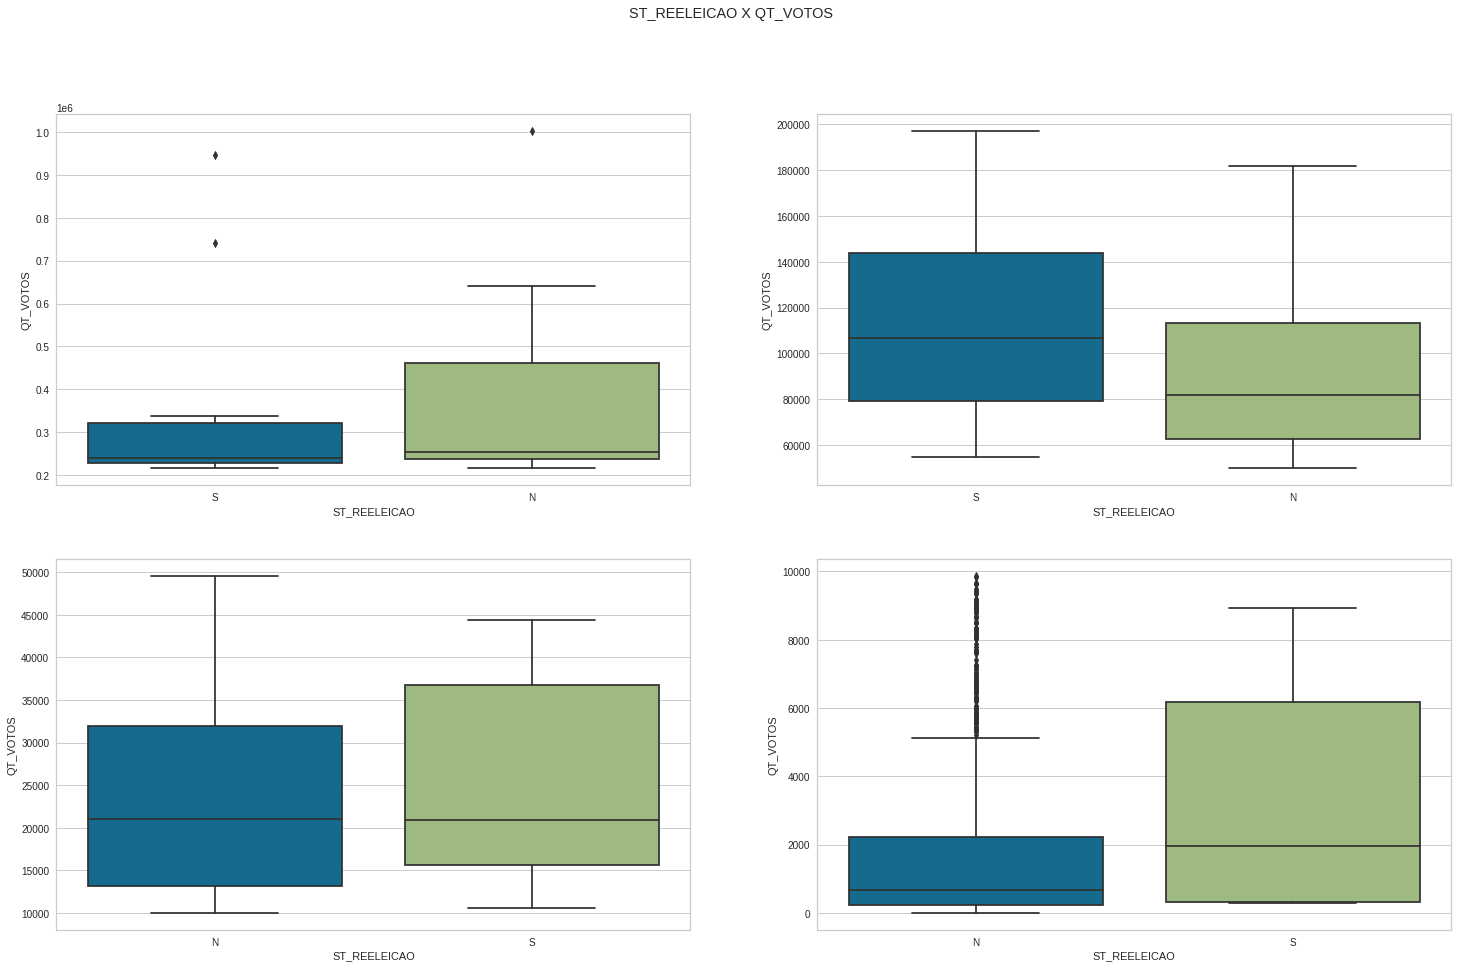

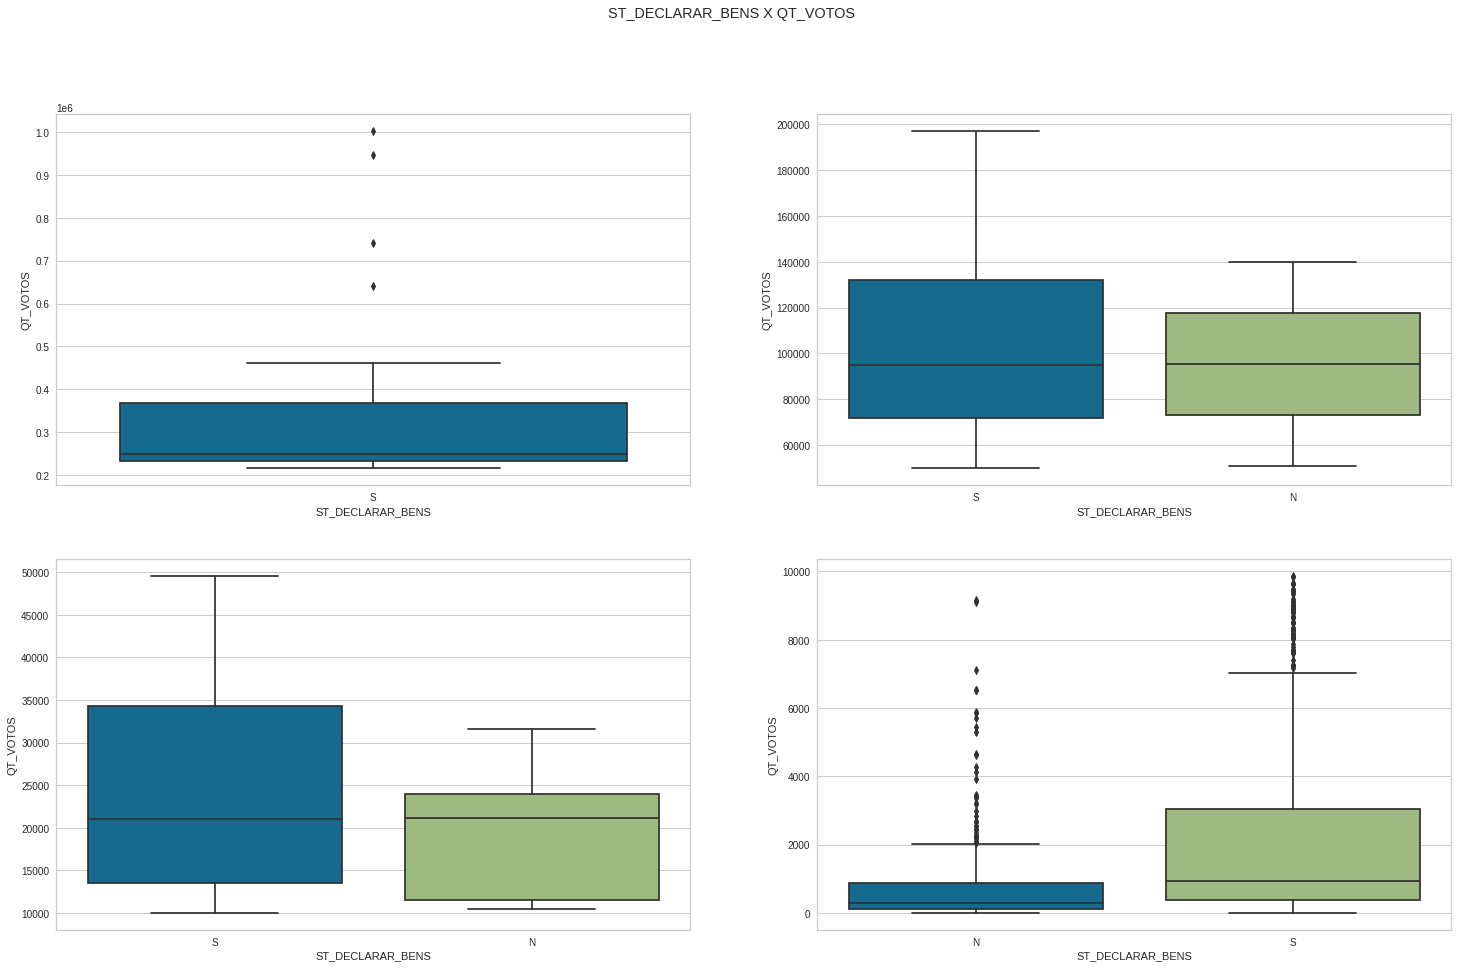

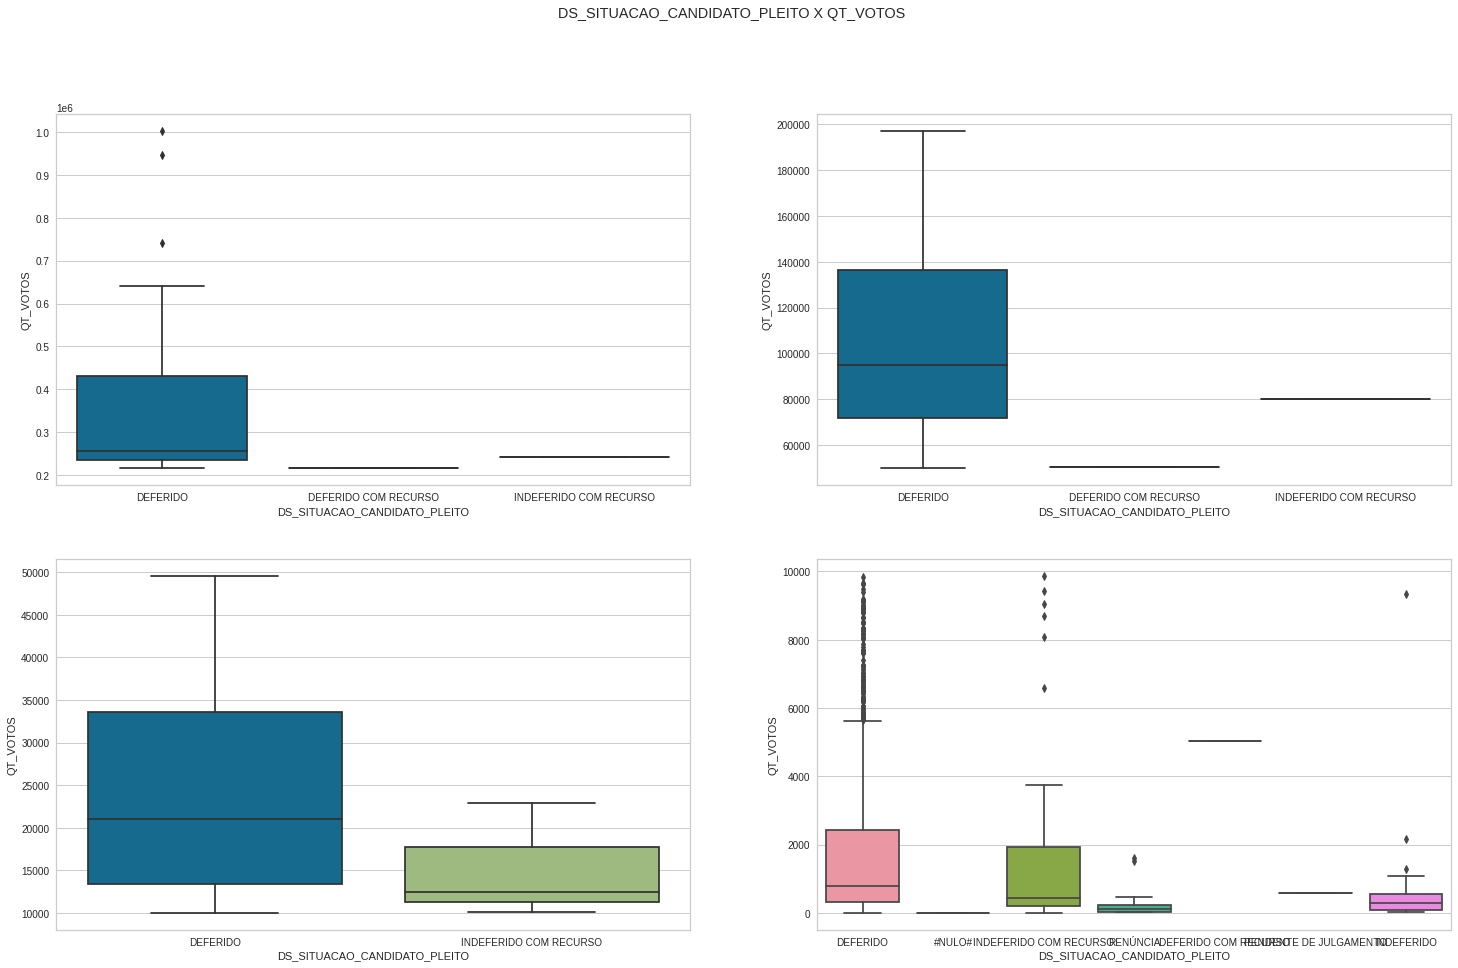

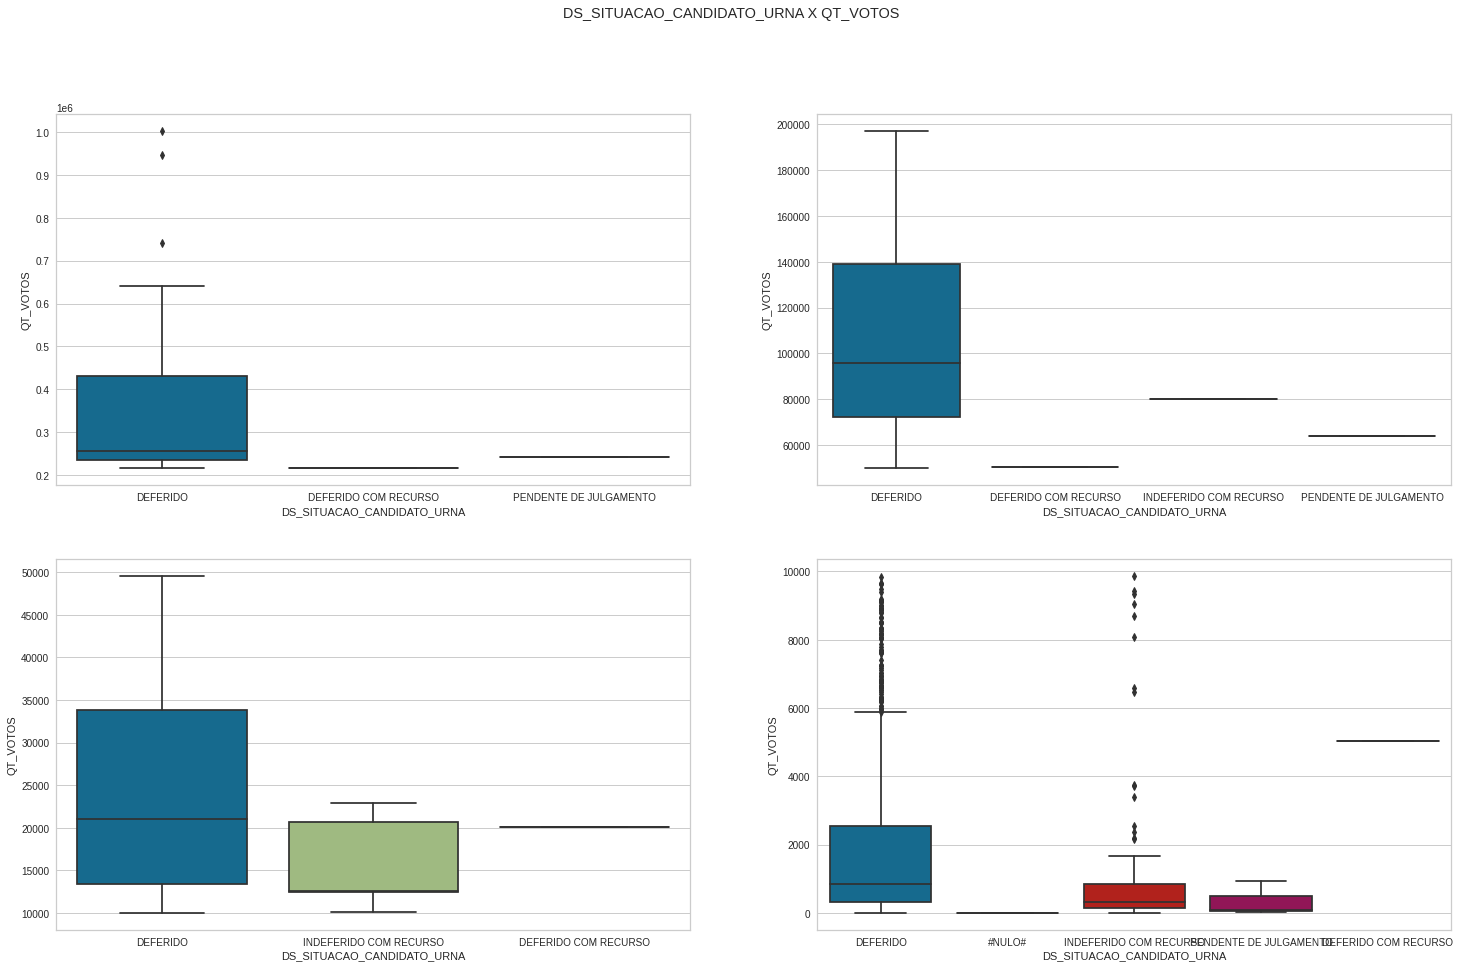

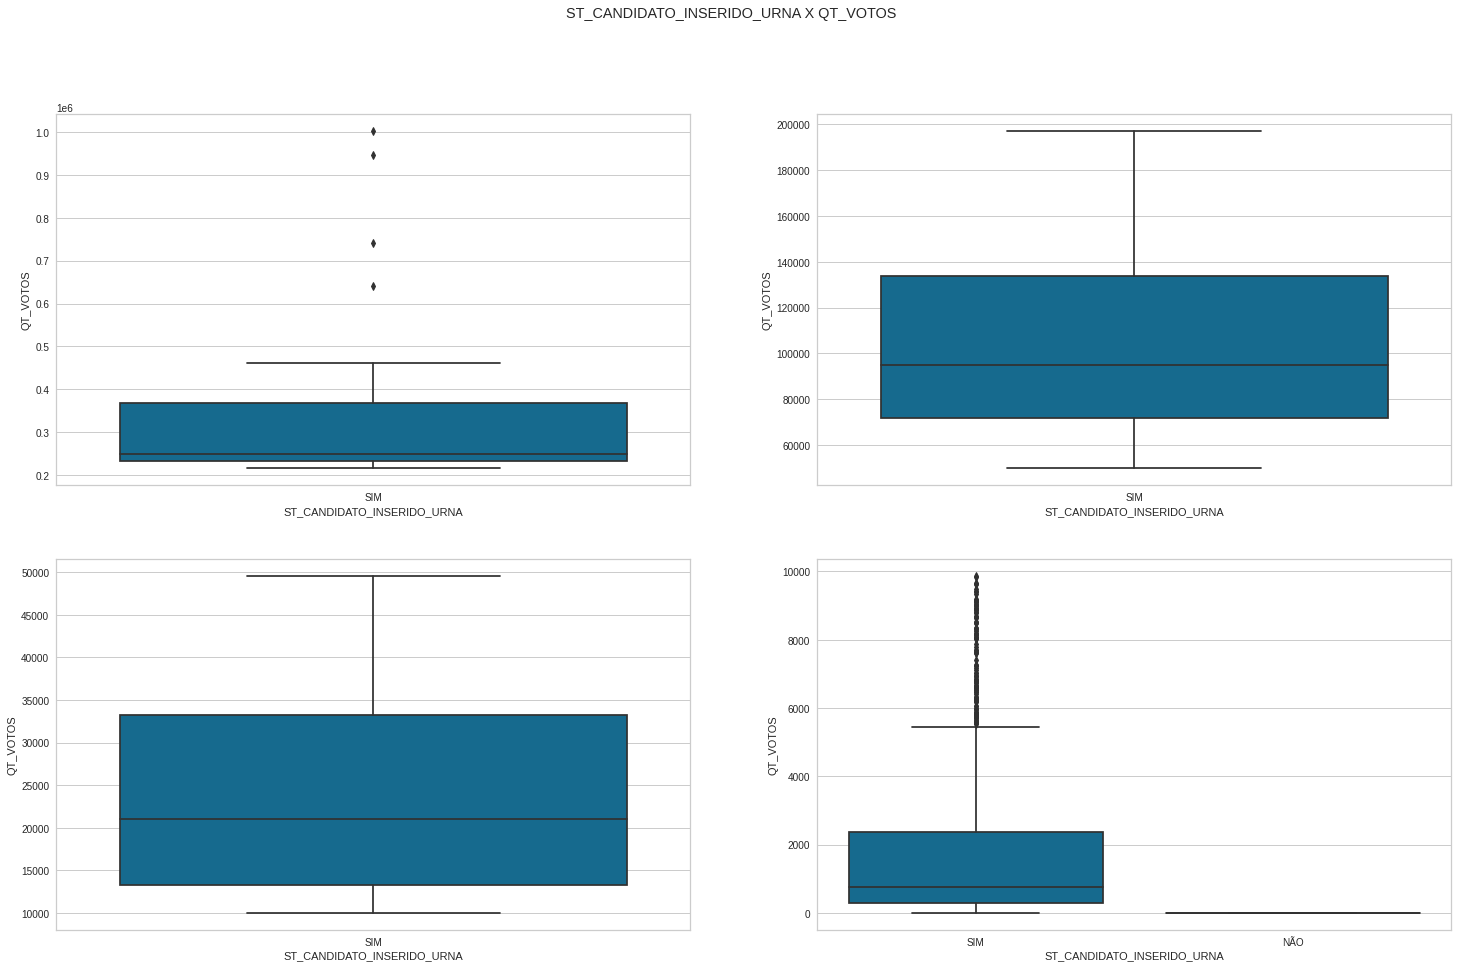

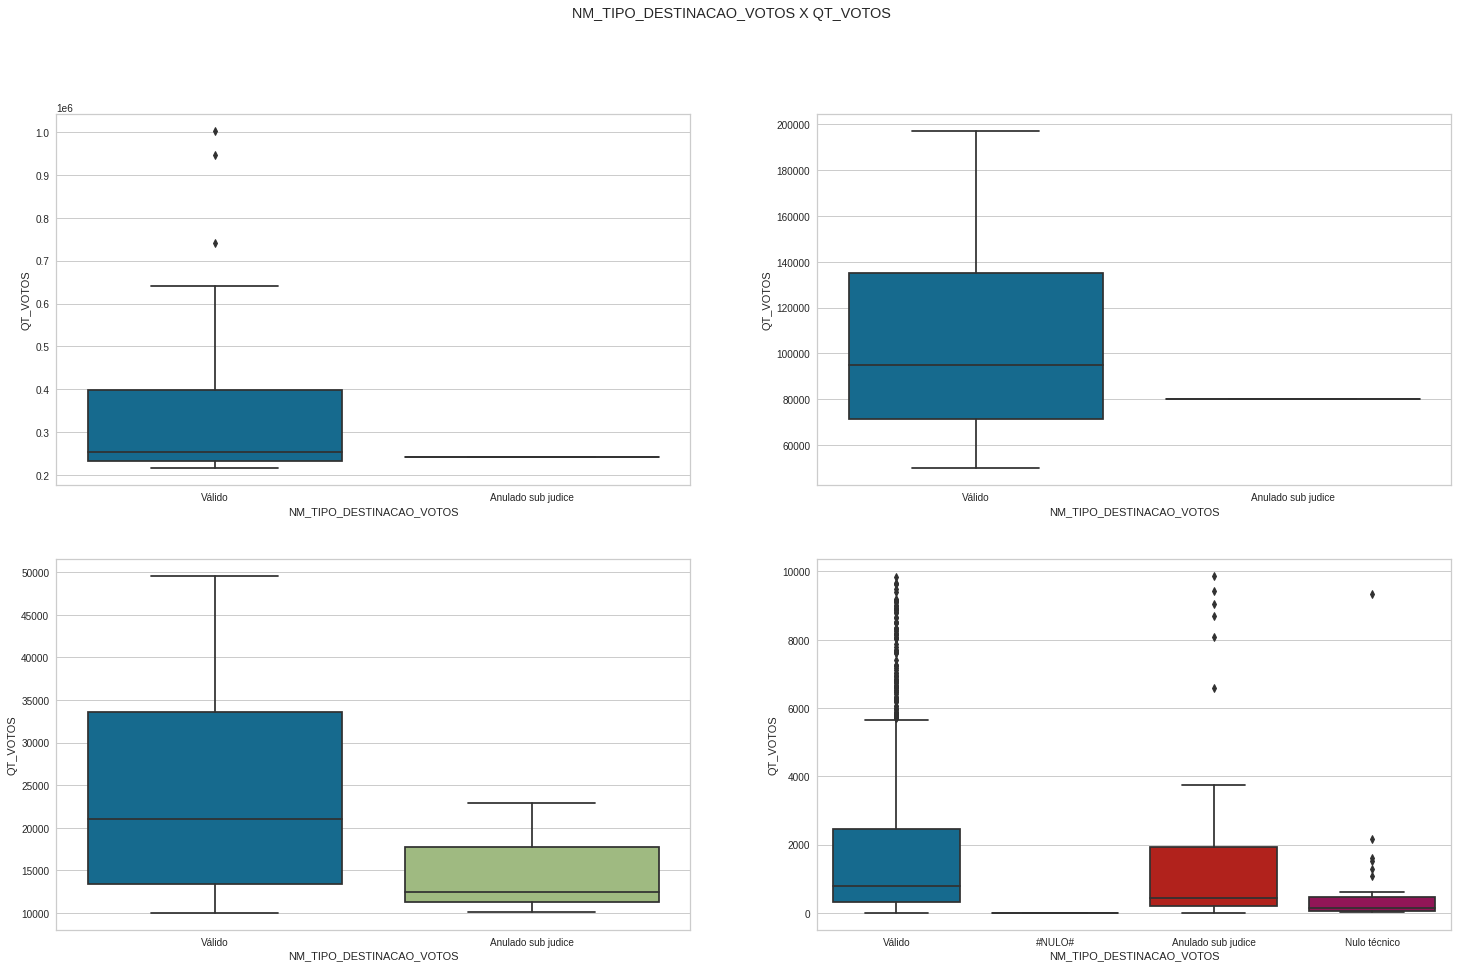

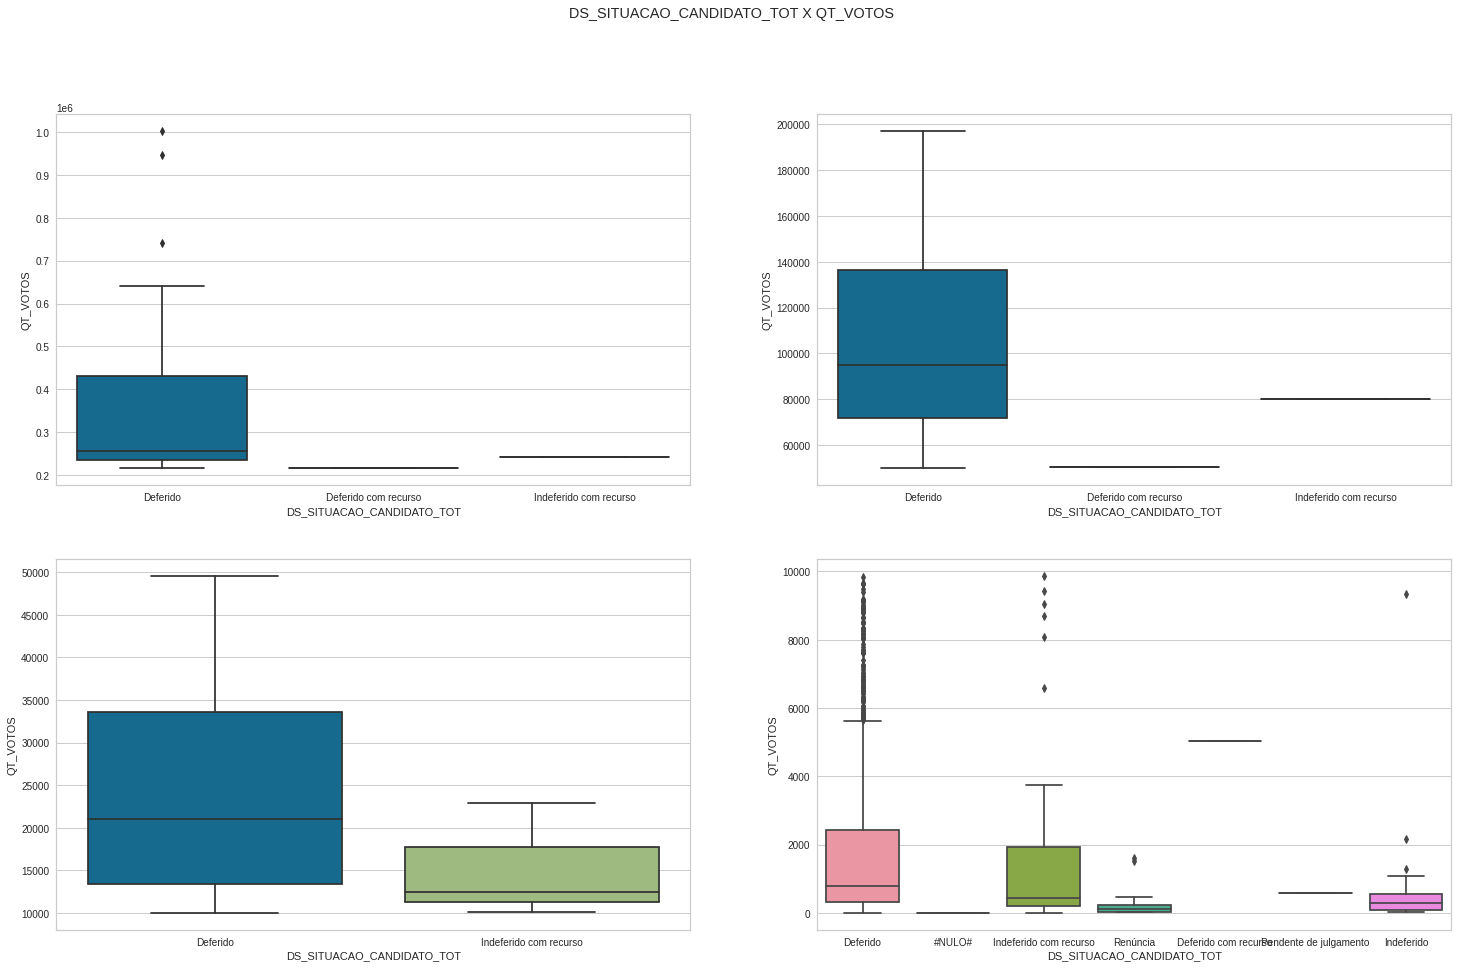

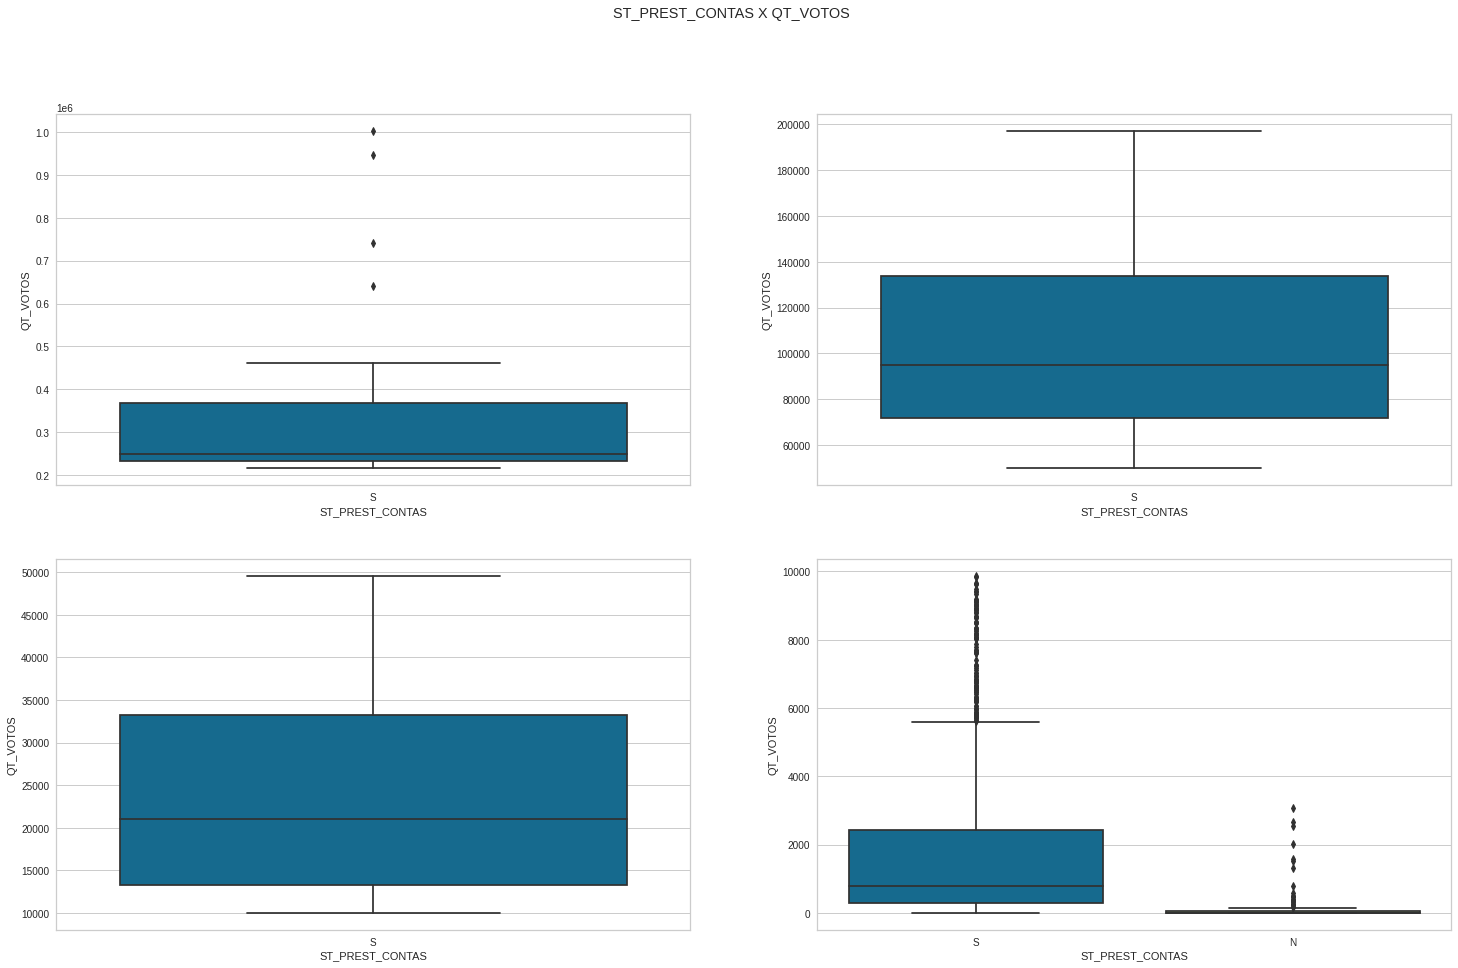

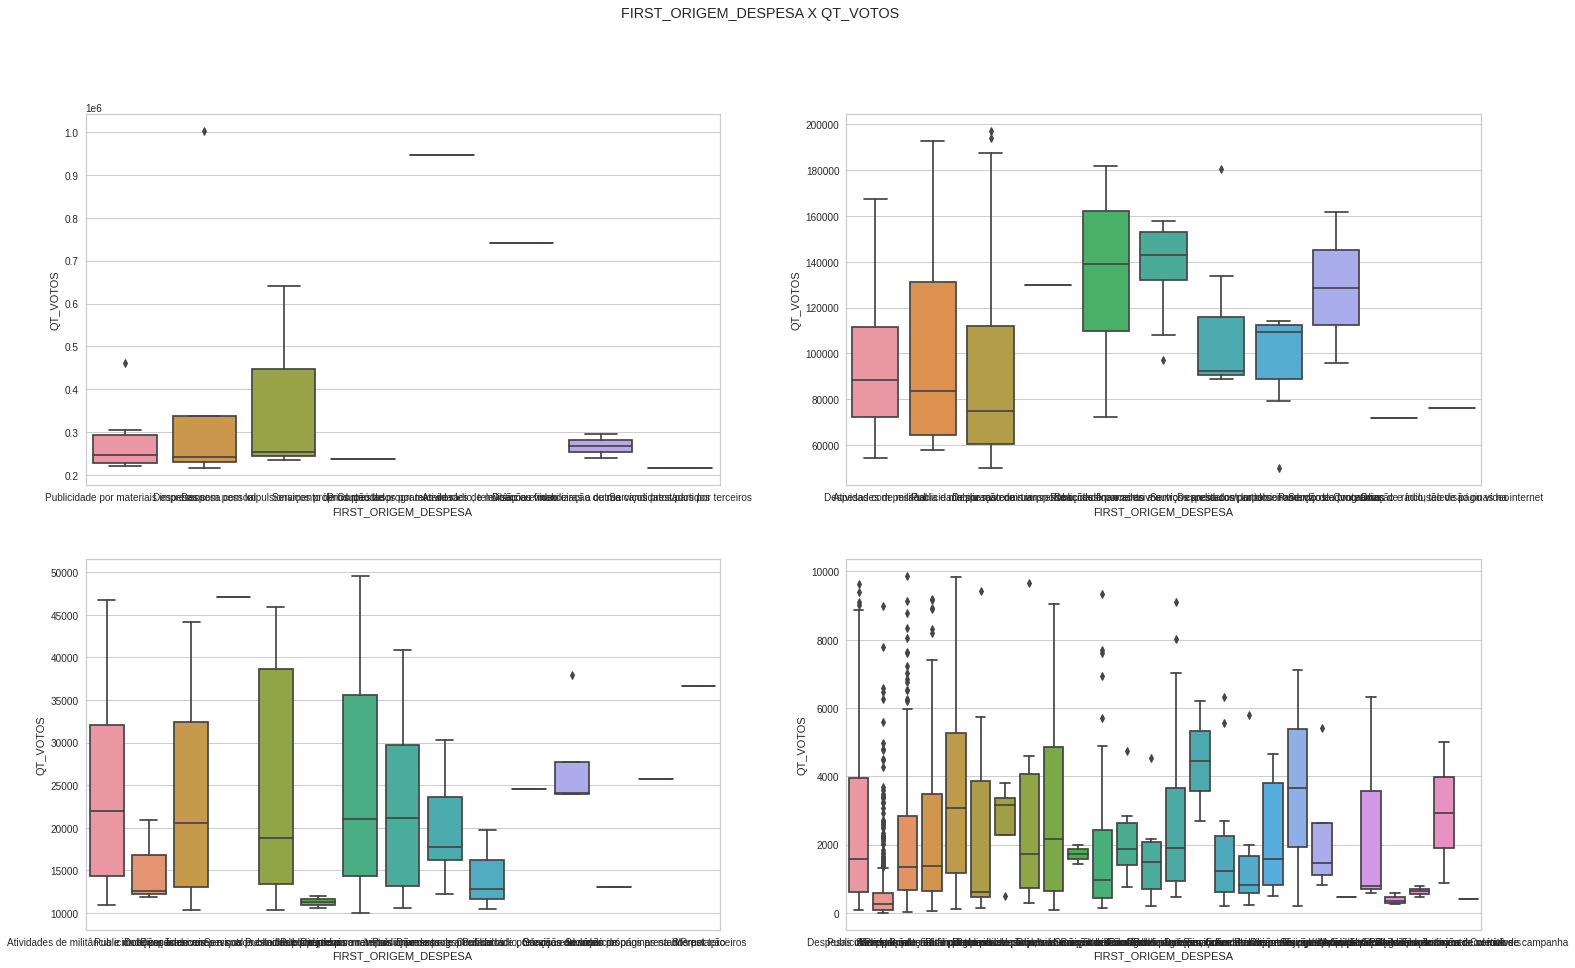

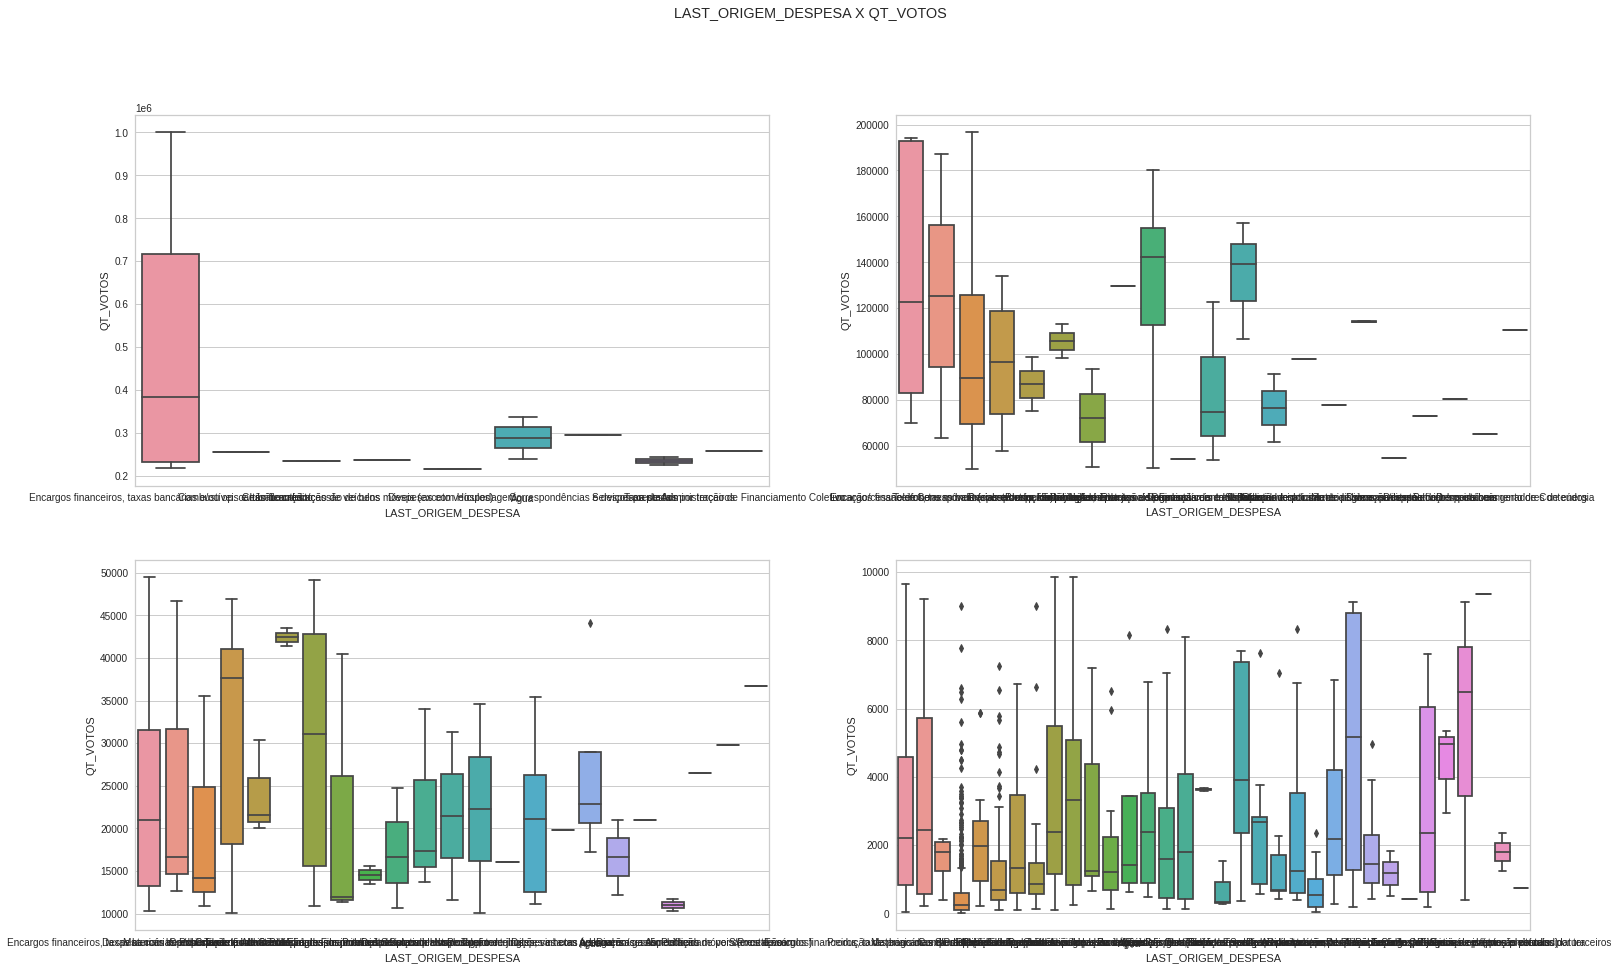

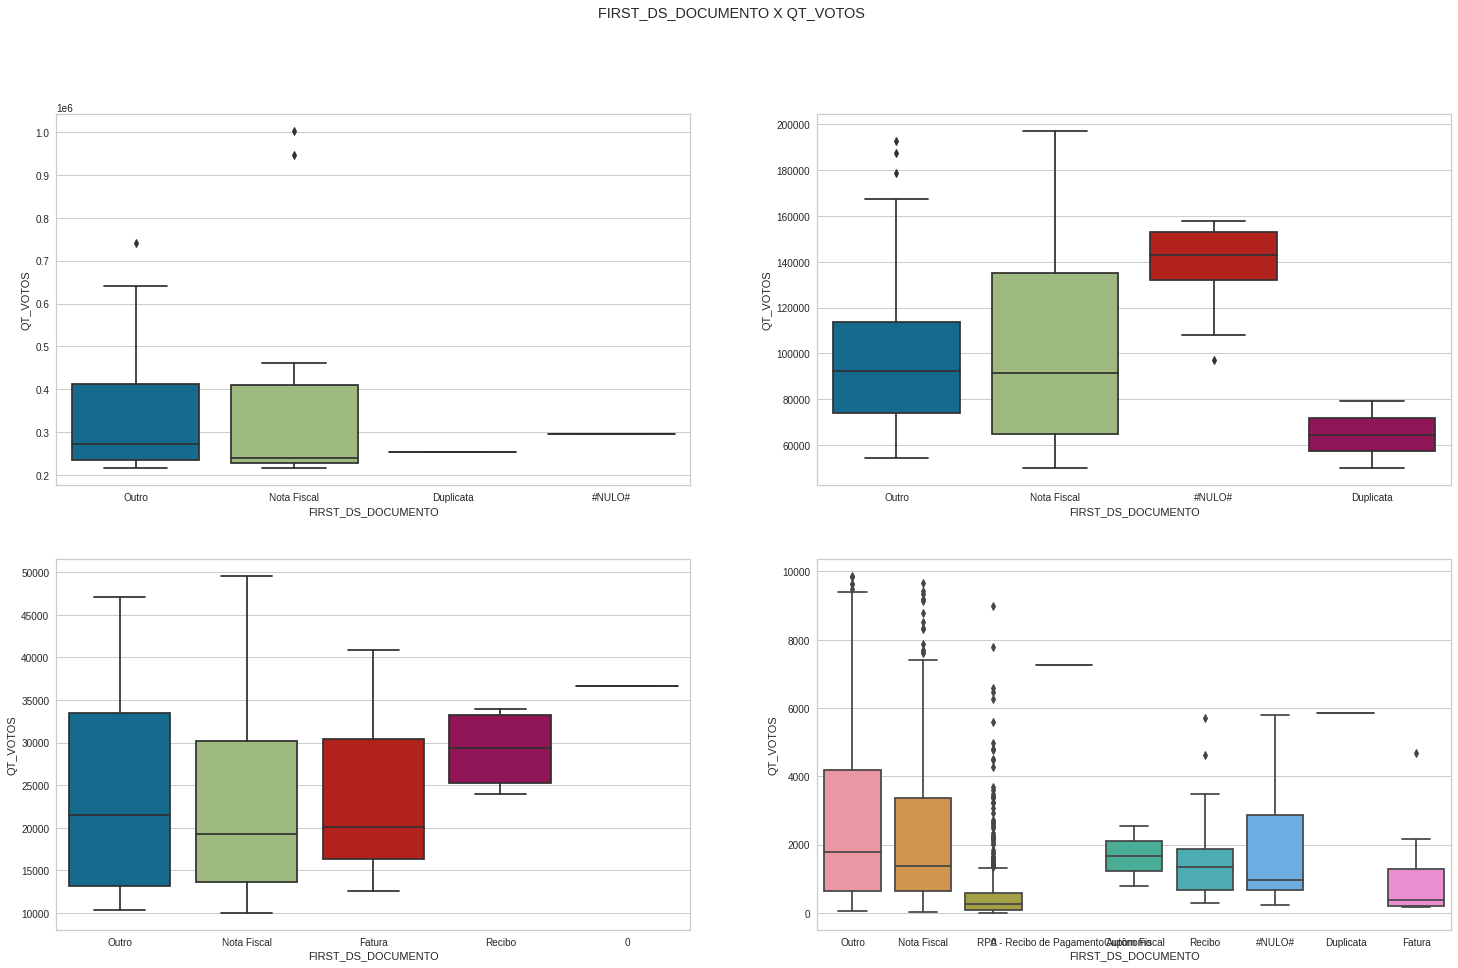

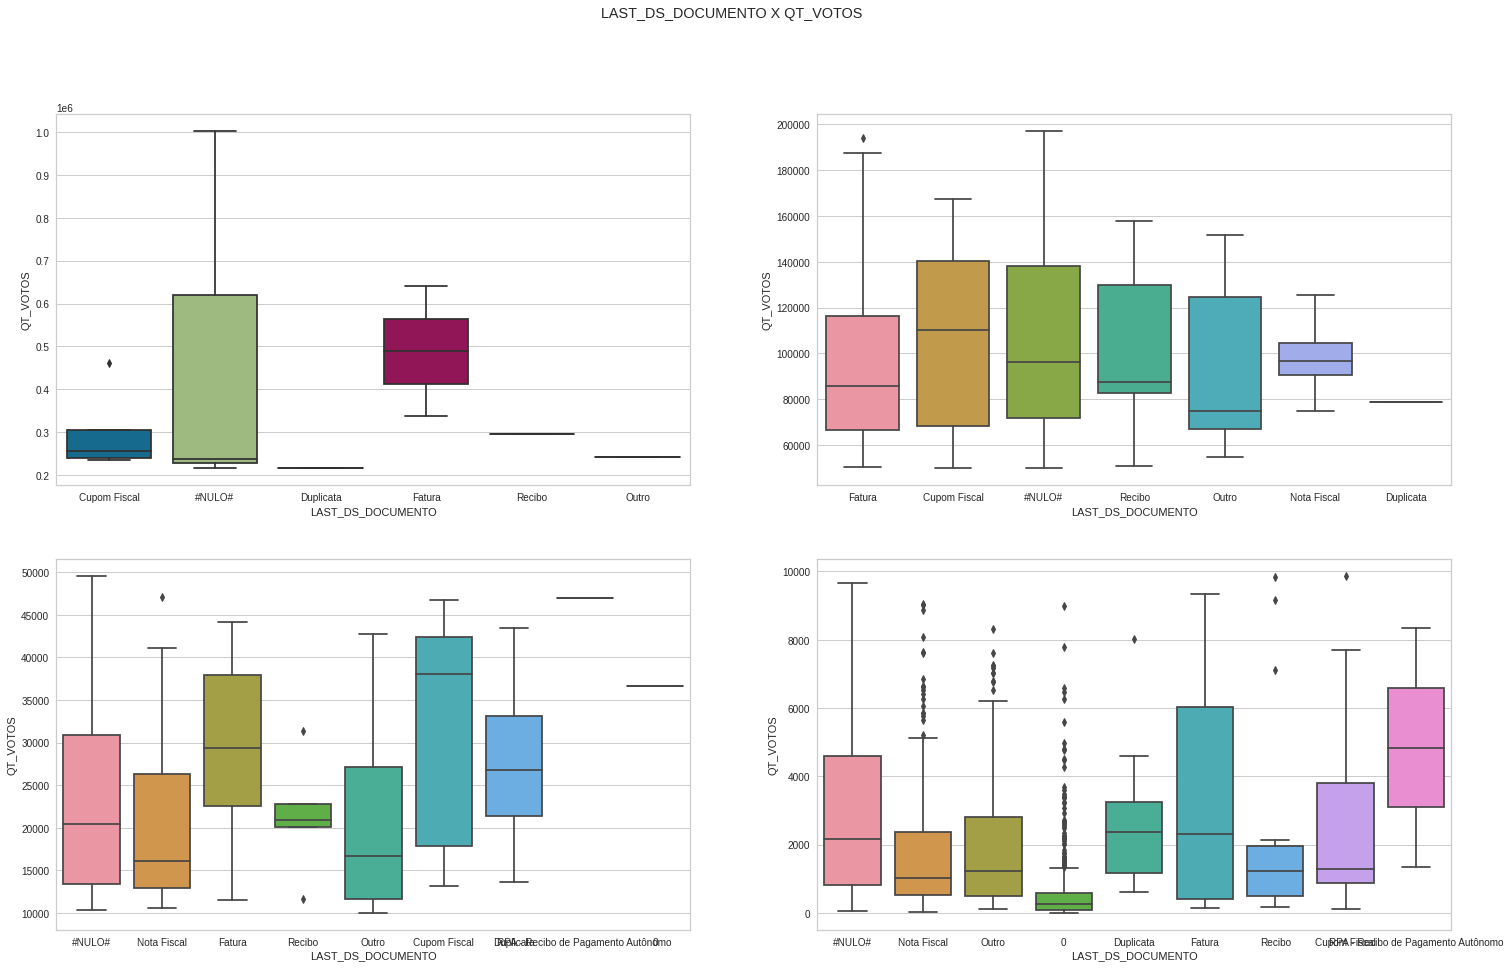

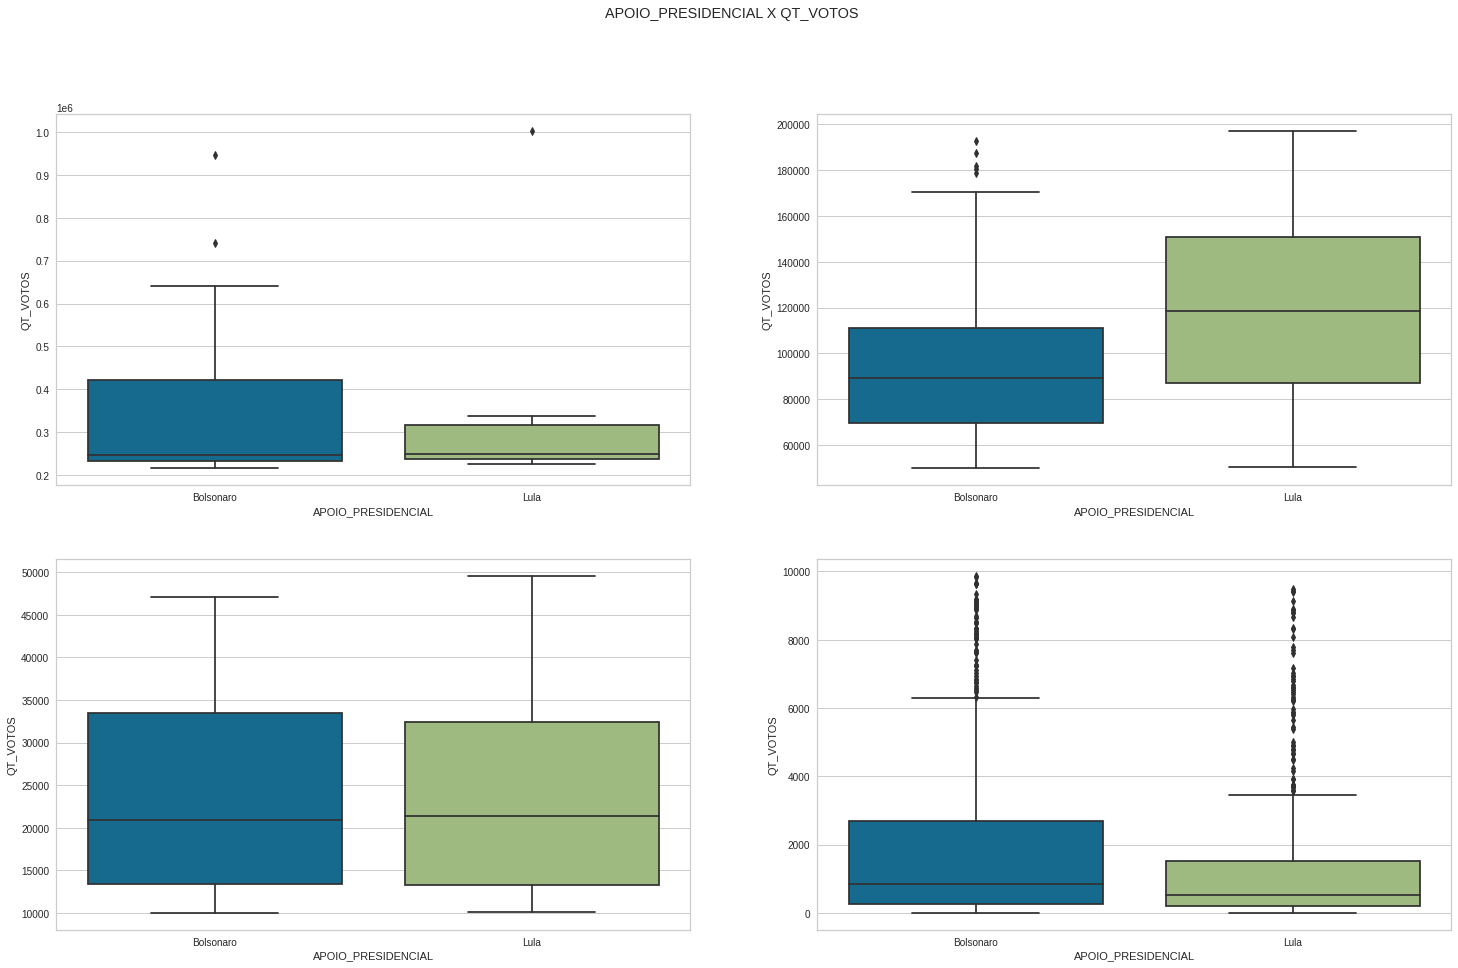

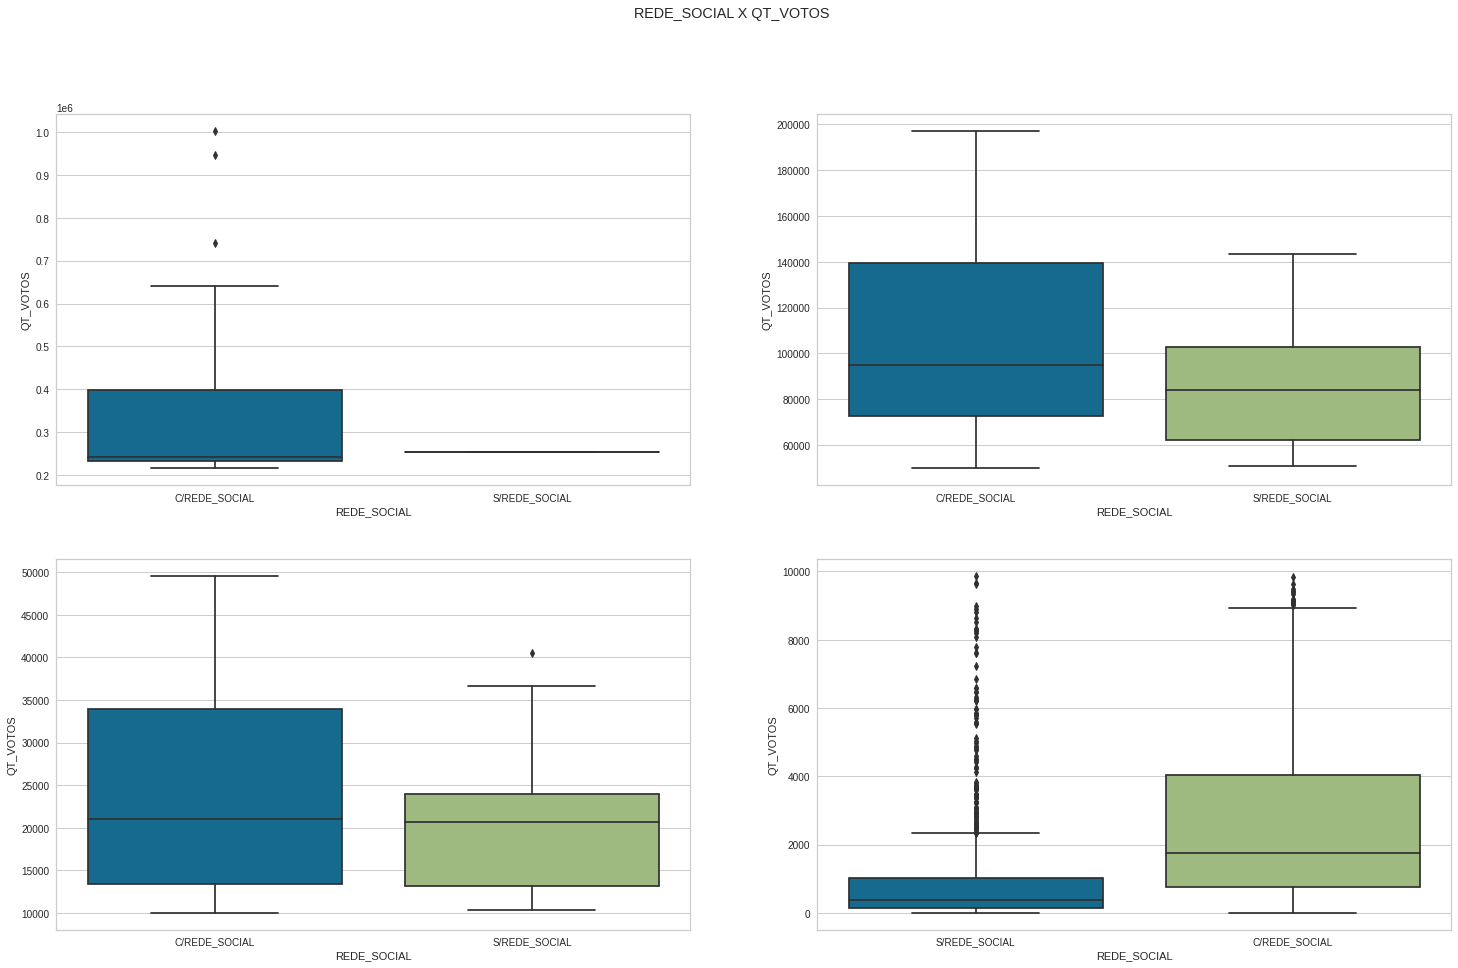

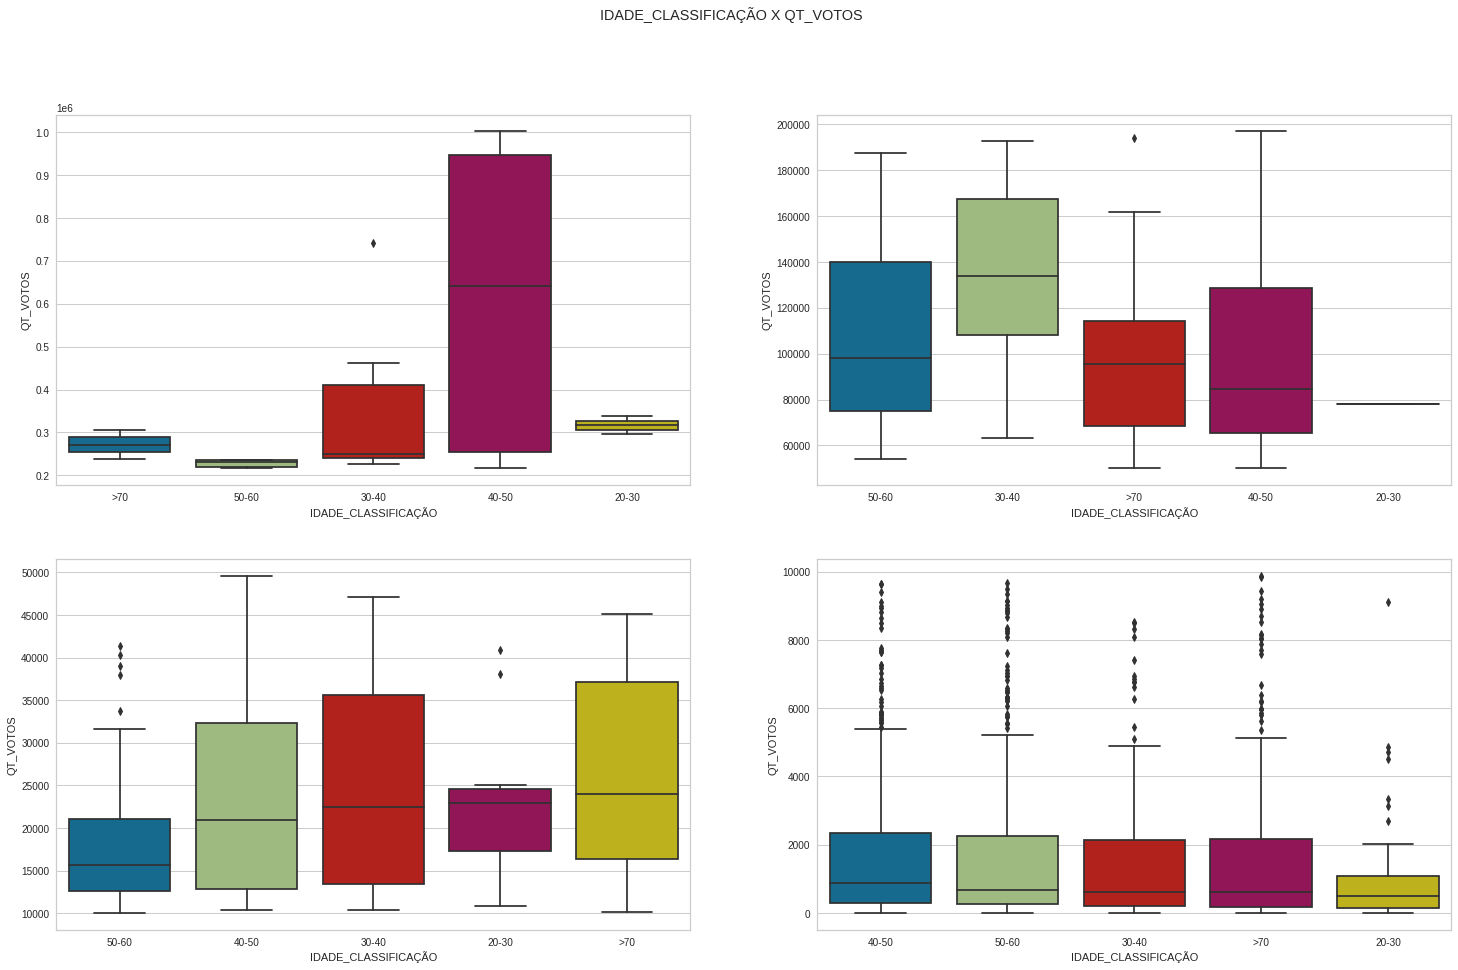

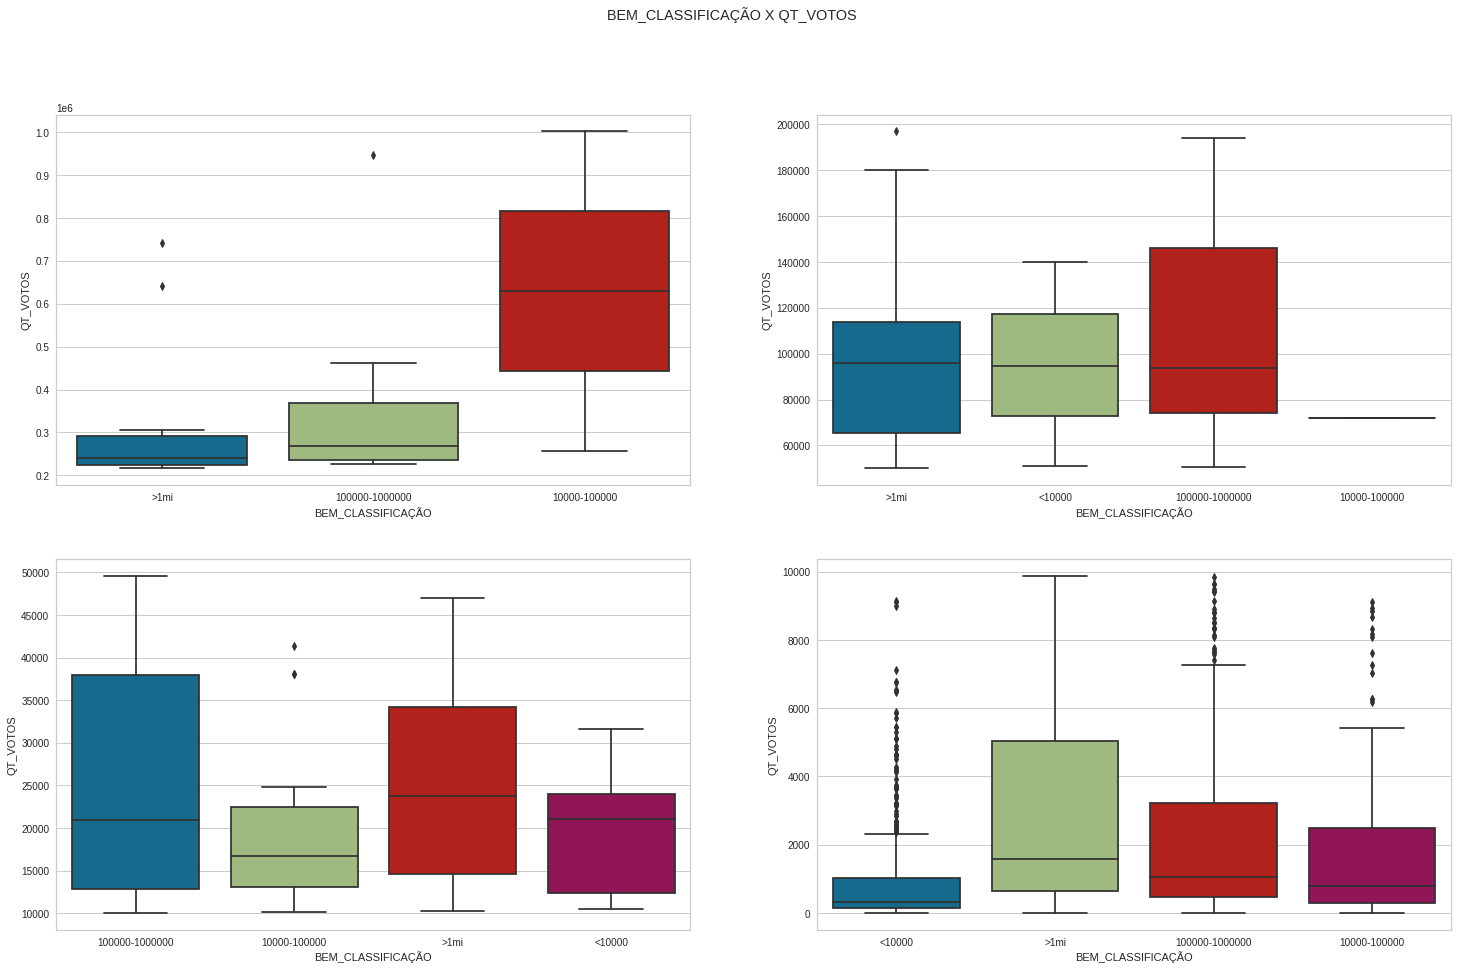

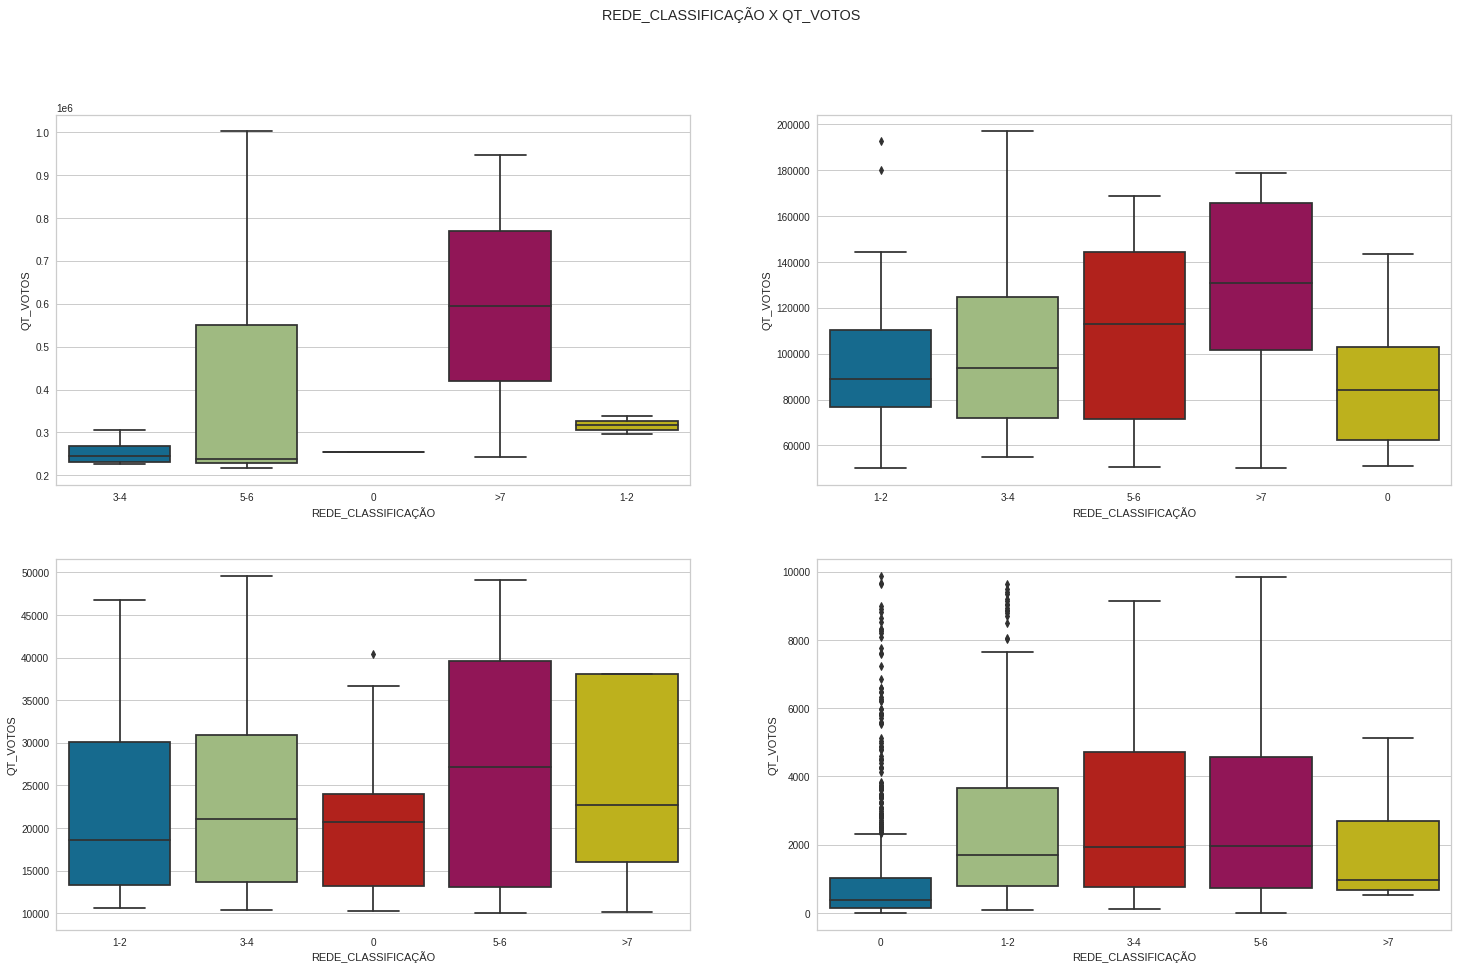

In [120]:
graficos(teste,'QT_VOTOS',ABT_CANDIDATO)

In [121]:
ABT_CANDIDATO.corr().round(2).sort_values('QT_VOTOS',ascending= False)['VR_BEM_CANDIDATO']

QT_VOTOS                   0.13
DFS_MUNICIPIO              0.21
VR_PESSOA_JURIDICA         0.14
VR_DESPESA_CONTRATADA      0.13
VR_ORIGEM_DESPESA          0.13
DFS_SECAO                  0.20
STD_DOCUMENTO              0.12
STD_ORIGEM_DESPESA         0.11
VR_FIRST_ORIGEM_DESPESA    0.11
DFS_ZONA                   0.19
DFS_LOCAL_VOTACAO          0.18
TOTAL_REDE_SOCAL           0.16
REDE_SOCIAL_site           0.16
VR_PESSOA_FISICA           0.07
REDE_SOCIAL_twitter        0.12
REDE_SOCIAL_telegram       0.01
STD_VOTOS                  0.07
REDE_SOCIAL_youtube        0.14
REDE_SOCIAL_tiktok         0.10
REDE_SOCIAL_instagram      0.09
REDE_SOCIAL_facebook       0.09
recencia_STD_DESPESA       0.11
recencia_media_DESPESA     0.08
VR_BEM_CANDIDATO           1.00
REDE_SOCIAL_linkedin       0.14
REDE_SOCIAL_flickr         0.01
REDE_SOCIAL_kwai           0.21
%_FIRST_GASTO_TOTAL        0.03
REDE_SOCIAL_whatsapp       0.02
VR_LAST_ORIGEM_DESPESA    -0.01
recencia_DT_NASCIMENTO     0.07
NR_IDADE

In [122]:
abt_rede =(
    ABT_CANDIDATO
    .groupby('TOTAL_REDE_SOCAL')
    .agg(
        QT_VOTOS_MEDIA=('QT_VOTOS', 'mean'),
         QT_VOTOS_MEDIANA=('QT_VOTOS', 'median'),
         QT_VOTOS_VARIANCIA=('QT_VOTOS', 'std'),
         QDE_VOTOS = ('QT_VOTOS','count')
         )
      .reset_index()
      )
abt_rede

TOTAL_REDE_SOCAL  QT_VOTOS_MEDIA  QT_VOTOS_MEDIANA  QT_VOTOS_VARIANCIA  \
0               0.0     2927.596429             433.0        13551.105027   
1               1.0    18534.784314            2676.0        46561.351410   
2               2.0     9162.335329            2438.0        21194.900865   
3               3.0    18965.330435            4359.0        39740.588639   
4               4.0    38888.648936            7921.0        61626.771321   
5               5.0    30289.468750            6789.5        49173.268082   
6               6.0    85876.746479           13085.0       175048.176609   
7               7.0    70927.083333            4458.5       193785.752327   
8               8.0   131820.666667          151861.0       122472.446503   

   QDE_VOTOS  
0        840  
1        153  
2        167  
3        115  
4         94  
5         64  
6         71  
7         24  
8          3

In [123]:
abt_rede =(
    ABT_CANDIDATO
    .groupby('REDE_CLASSIFICAÇÃO')
    .agg(
        QT_VOTOS_MEDIA=('QT_VOTOS', 'mean'),
         QT_VOTOS_MEDIANA=('QT_VOTOS', 'median'),
         QT_VOTOS_VARIANCIA=('QT_VOTOS', 'std'),
         QDE_VOTOS = ('QT_VOTOS','count')
         )
      .reset_index()
      )
abt_rede

REDE_CLASSIFICAÇÃO  QT_VOTOS_MEDIA  QT_VOTOS_MEDIANA  QT_VOTOS_VARIANCIA  \
0                  0     2927.596429             433.0        13551.105027   
1                1-2    13643.537500            2550.5        35899.326462   
2                3-4    27926.057416            5734.0        51598.178202   
3                5-6    59524.259259           10014.0       133865.337012   
4                 >7    77693.037037            5124.0       186424.266516   

   QDE_VOTOS  
0        840  
1        320  
2        209  
3        135  
4         27

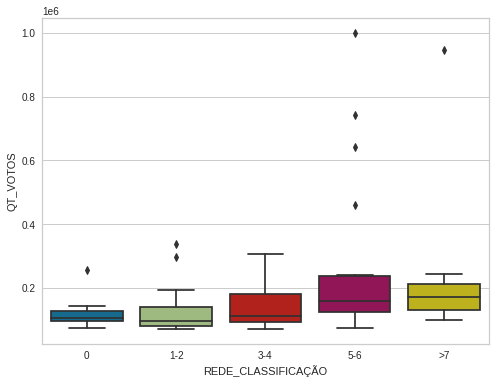

In [124]:
rede = ABT_CANDIDATO.query('QT_VOTOS > 70000')
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
sns.boxplot( data=rede, x='REDE_CLASSIFICAÇÃO', y='QT_VOTOS',order=["0","1-2","3-4","5-6", '>7'])

In [125]:
abt_rede =(
    rede
    .groupby('REDE_CLASSIFICAÇÃO')
    .agg(
        QT_VOTOS_MEDIA=('QT_VOTOS', 'mean'),
         QT_VOTOS_MEDIANA=('QT_VOTOS', 'median'),
         QT_VOTOS_VARIANCIA=('QT_VOTOS', 'std'),
         QDE_VOTOS = ('QT_VOTOS','count')
         )
      .reset_index()
      )
abt_rede

REDE_CLASSIFICAÇÃO  QT_VOTOS_MEDIA  QT_VOTOS_MEDIANA  QT_VOTOS_VARIANCIA  \
0                  0   125150.857143          104701.0        61020.501564   
1                1-2   127449.200000           94932.0        73462.961561   
2                3-4   137760.137931          110430.0        62080.269581   
3                5-6   234887.821429          157259.0       217957.749233   
4                 >7   271213.000000          170378.0       301477.220901   

   QDE_VOTOS  
0          7  
1         20  
2         29  
3         28  
4          7

### Genero

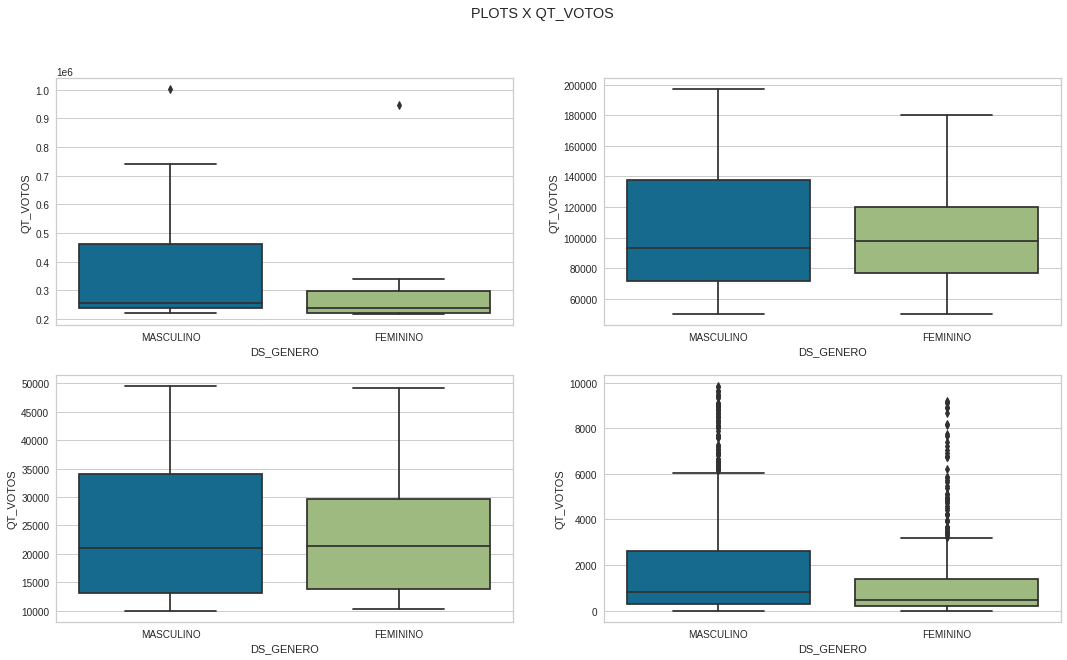

In [179]:
analise =ABT_CANDIDATO.query("QT_VOTOS >200000")
analise2 =ABT_CANDIDATO.query("QT_VOTOS <200000")
analise2 =analise2.query("QT_VOTOS>50000")
analise3 =ABT_CANDIDATO.query("QT_VOTOS<50000")
analise3 =analise3.query("QT_VOTOS>10000")
analise4 =ABT_CANDIDATO.query("QT_VOTOS <10000")


fig, axes = plt.subplots(2, 2, figsize=(18, 10))
 
fig.suptitle('PLOTS X QT_VOTOS')
 

sns.boxplot(ax=axes[0, 0], data=analise, x='DS_GENERO', y='QT_VOTOS')
sns.boxplot(ax=axes[0, 1], data=analise2, x='DS_GENERO', y='QT_VOTOS')
sns.boxplot(ax=axes[1, 0], data=analise3, x='DS_GENERO', y='QT_VOTOS')
sns.boxplot(ax=axes[1, 1], data=analise4, x='DS_GENERO', y='QT_VOTOS')

In [180]:
ABT_CANDIDATO['DS_SIT_TOT_TURNO'].value_counts()

SUPLENTE            781
NÃO ELEITO          607
#NULO#               73
ELEITO POR QP        60
ELEITO POR MÉDIA     10
Name: DS_SIT_TOT_TURNO, dtype: int64

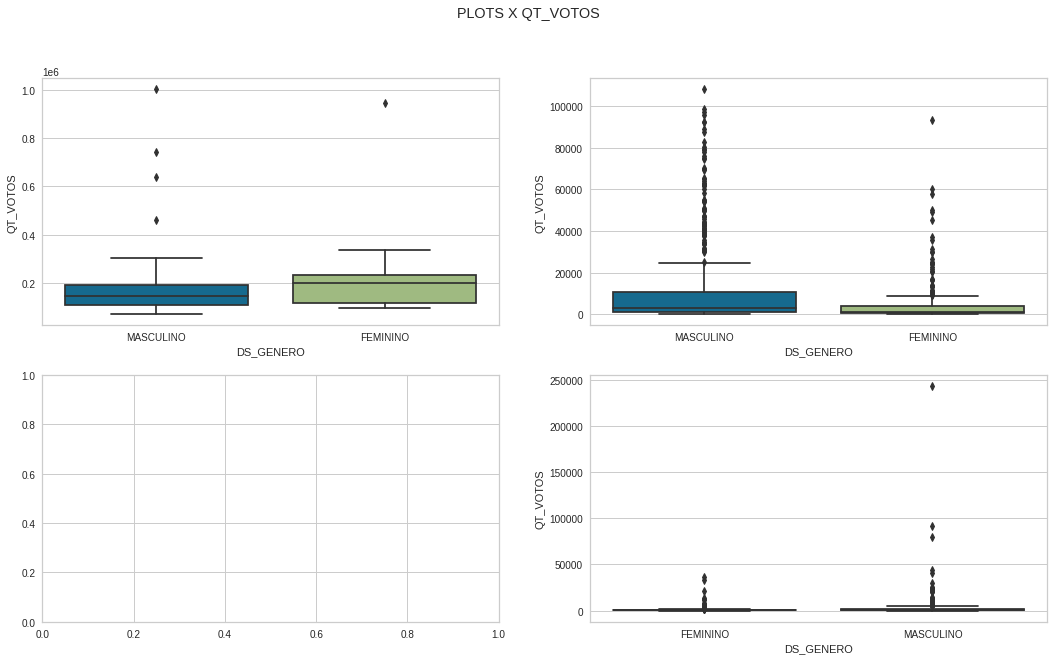

In [181]:
analise =ABT_CANDIDATO.query("DS_SIT_TOT_TURNO !='SUPLENTE'")
analise =analise.query("DS_SIT_TOT_TURNO !='NÃO ELEITO'")
analise =analise.query("DS_SIT_TOT_TURNO !='#NULO#'")

analise2 =ABT_CANDIDATO.query("DS_SIT_TOT_TURNO =='SUPLENTE'")
analise4 =ABT_CANDIDATO.query("DS_SIT_TOT_TURNO =='NÃO ELEITO'")


fig, axes = plt.subplots(2, 2, figsize=(18, 10))
 
fig.suptitle('PLOTS X QT_VOTOS')
 

sns.boxplot(ax=axes[0, 0], data=analise, x='DS_GENERO', y='QT_VOTOS')
sns.boxplot(ax=axes[0, 1], data=analise2, x='DS_GENERO', y='QT_VOTOS')

sns.boxplot(ax=axes[1, 1], data=analise4, x='DS_GENERO', y='QT_VOTOS')

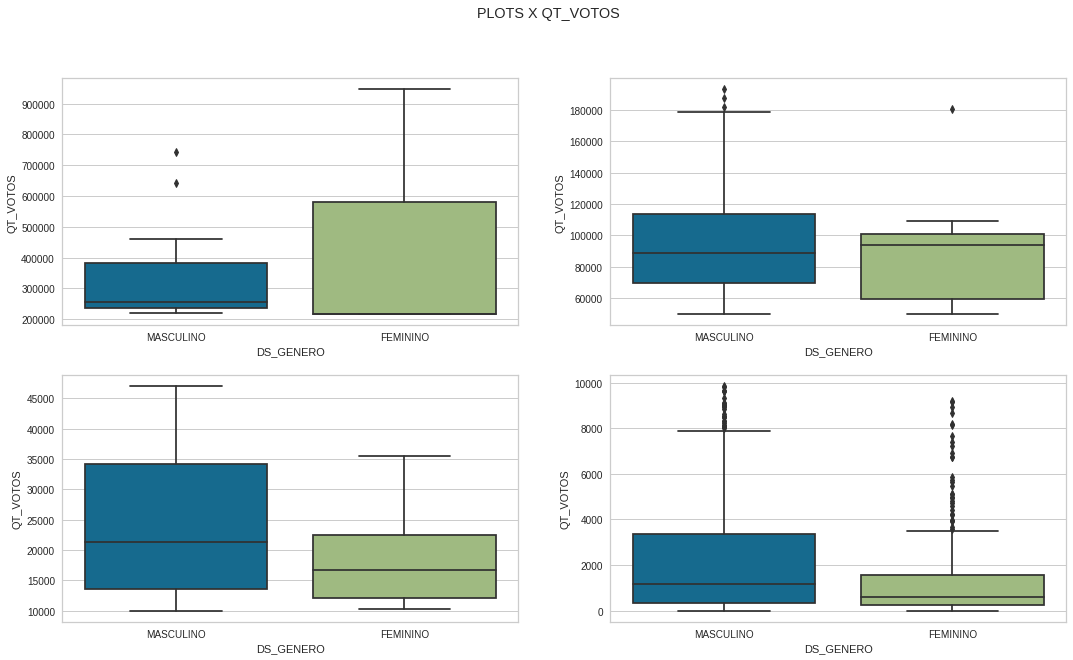

In [182]:
ABT_CANDIDATO2 = ABT_CANDIDATO.query("APOIO_PRESIDENCIAL == 'Bolsonaro'")

analise =ABT_CANDIDATO2.query("QT_VOTOS >200000")
analise2 =ABT_CANDIDATO2.query("QT_VOTOS <200000")
analise2 =analise2.query("QT_VOTOS>50000")
analise3 =ABT_CANDIDATO2.query("QT_VOTOS<50000")
analise3 =analise3.query("QT_VOTOS>10000")
analise4 =ABT_CANDIDATO2.query("QT_VOTOS <10000")


fig, axes = plt.subplots(2, 2, figsize=(18, 10))
 
fig.suptitle('PLOTS X QT_VOTOS')
 

sns.boxplot(ax=axes[0, 0], data=analise, x='DS_GENERO', y='QT_VOTOS')
sns.boxplot(ax=axes[0, 1], data=analise2, x='DS_GENERO', y='QT_VOTOS')
sns.boxplot(ax=axes[1, 0], data=analise3, x='DS_GENERO', y='QT_VOTOS')
sns.boxplot(ax=axes[1, 1], data=analise4, x='DS_GENERO', y='QT_VOTOS')

In [183]:
ABT_CANDIDATO['APOIO_PRESIDENCIAL'].value_counts()

Bolsonaro    923
Lula         608
Name: APOIO_PRESIDENCIAL, dtype: int64

### Grau de Instrução

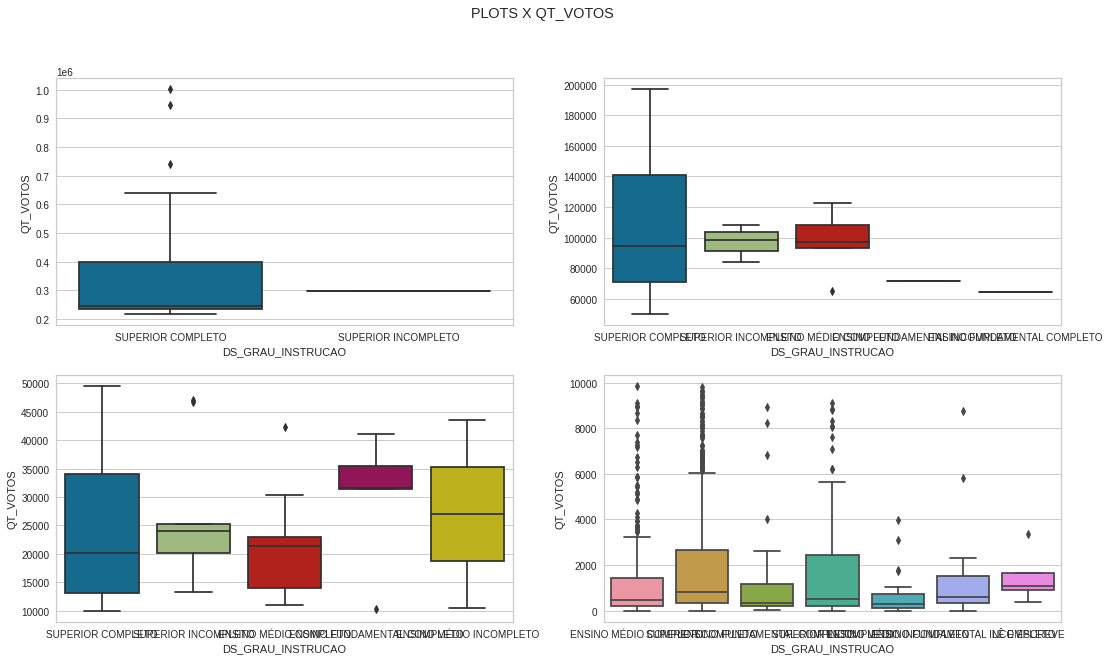

In [184]:
analise =ABT_CANDIDATO.query("QT_VOTOS >200000")
analise2 =ABT_CANDIDATO.query("QT_VOTOS <200000")
analise2 =analise2.query("QT_VOTOS>50000")
analise3 =ABT_CANDIDATO.query("QT_VOTOS<50000")
analise3 =analise3.query("QT_VOTOS>10000")
analise4 =ABT_CANDIDATO.query("QT_VOTOS <10000")


fig, axes = plt.subplots(2, 2, figsize=(18, 10))
 
fig.suptitle('PLOTS X QT_VOTOS')
 

sns.boxplot(ax=axes[0, 0], data=analise, x='DS_GRAU_INSTRUCAO', y='QT_VOTOS')
sns.boxplot(ax=axes[0, 1], data=analise2, x='DS_GRAU_INSTRUCAO', y='QT_VOTOS')
sns.boxplot(ax=axes[1, 0], data=analise3, x='DS_GRAU_INSTRUCAO', y='QT_VOTOS')
sns.boxplot(ax=axes[1, 1], data=analise4, x='DS_GRAU_INSTRUCAO', y='QT_VOTOS')

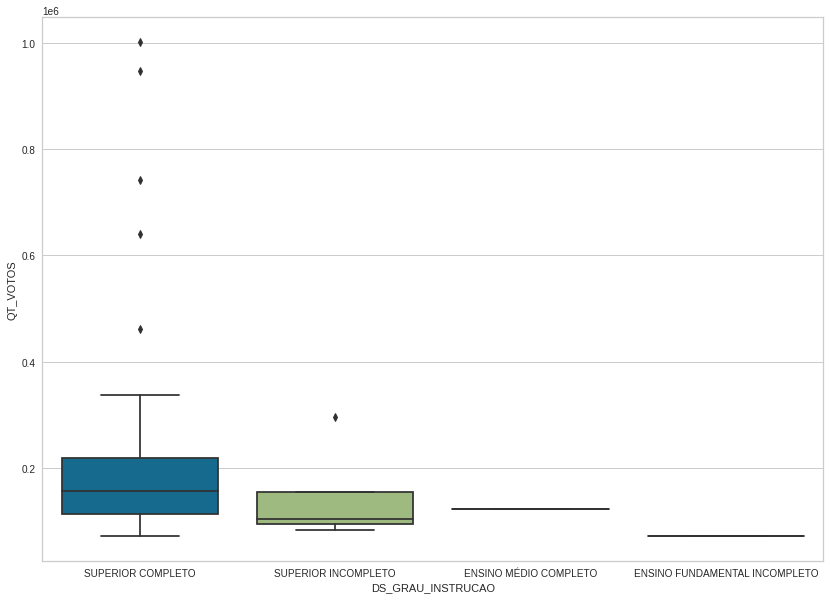

In [185]:
analise =ABT_CANDIDATO.query("DS_SIT_TOT_TURNO !='NÃO ELEITO'")
analise =analise.query("DS_SIT_TOT_TURNO !='SUPLENTE'")
analise =analise.query("DS_SIT_TOT_TURNO !='#NULO#'")

plt.figure(figsize=(14,10))
sns.boxplot( data=analise, x='DS_GRAU_INSTRUCAO', y='QT_VOTOS')

### Estado Civil

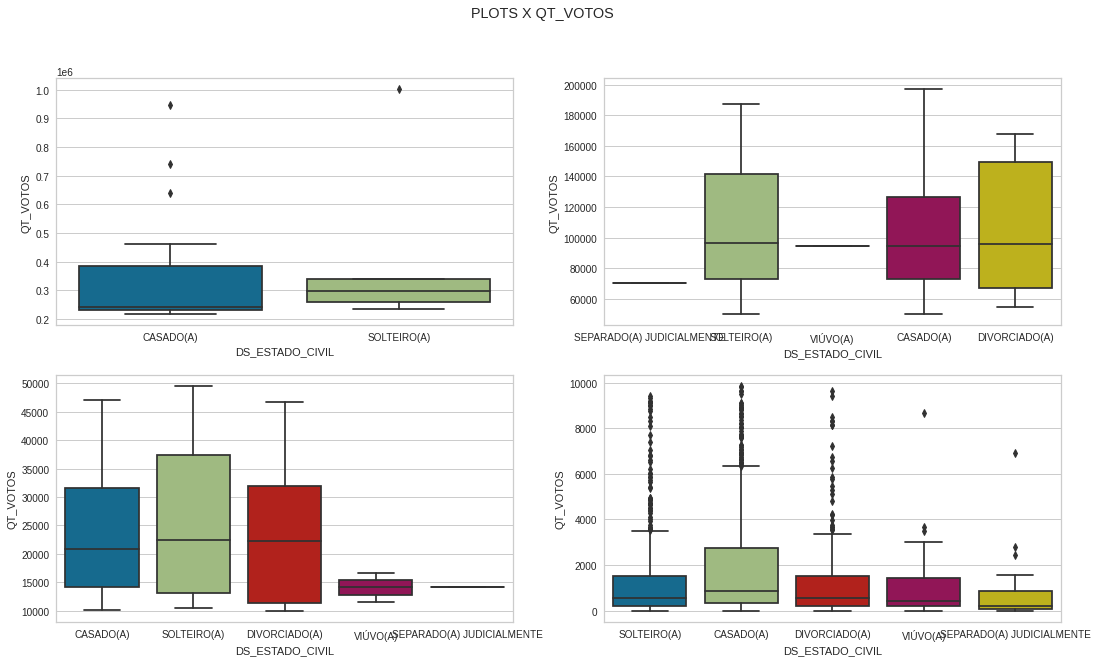

In [186]:
analise =ABT_CANDIDATO.query("QT_VOTOS >200000")
analise2 =ABT_CANDIDATO.query("QT_VOTOS <200000")
analise2 =analise2.query("QT_VOTOS>50000")
analise3 =ABT_CANDIDATO.query("QT_VOTOS<50000")
analise3 =analise3.query("QT_VOTOS>10000")
analise4 =ABT_CANDIDATO.query("QT_VOTOS <10000")


fig, axes = plt.subplots(2, 2, figsize=(18, 10))
 
fig.suptitle('PLOTS X QT_VOTOS')
 

sns.boxplot(ax=axes[0, 0], data=analise, x='DS_ESTADO_CIVIL', y='QT_VOTOS')
sns.boxplot(ax=axes[0, 1], data=analise2, x='DS_ESTADO_CIVIL', y='QT_VOTOS')
sns.boxplot(ax=axes[1, 0], data=analise3, x='DS_ESTADO_CIVIL', y='QT_VOTOS')
sns.boxplot(ax=axes[1, 1], data=analise4, x='DS_ESTADO_CIVIL', y='QT_VOTOS')

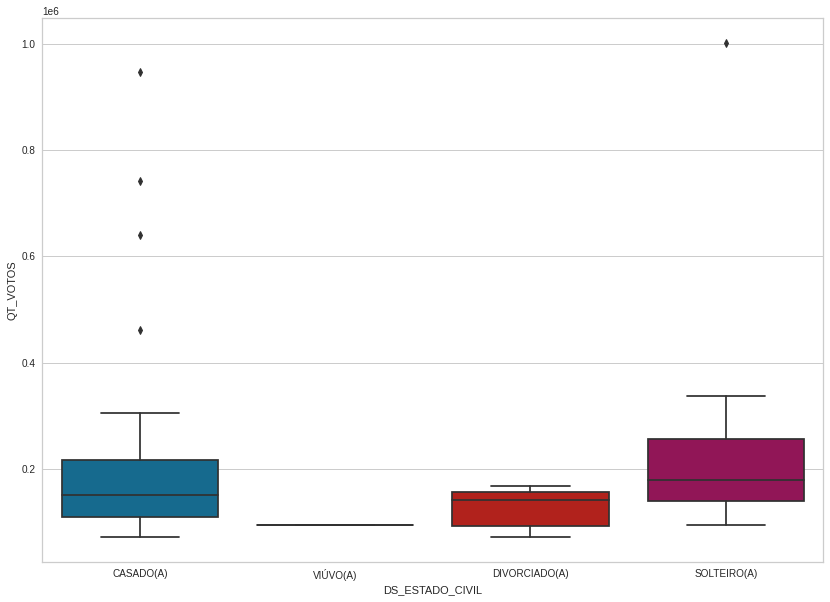

In [187]:
analise =ABT_CANDIDATO.query("DS_SIT_TOT_TURNO !='NÃO ELEITO'")
analise =analise.query("DS_SIT_TOT_TURNO !='SUPLENTE'")
analise =analise.query("DS_SIT_TOT_TURNO !='#NULO#'")

plt.figure(figsize=(14,10))
sns.boxplot( data=analise, x='DS_ESTADO_CIVIL', y='QT_VOTOS')

### COR RAÇA

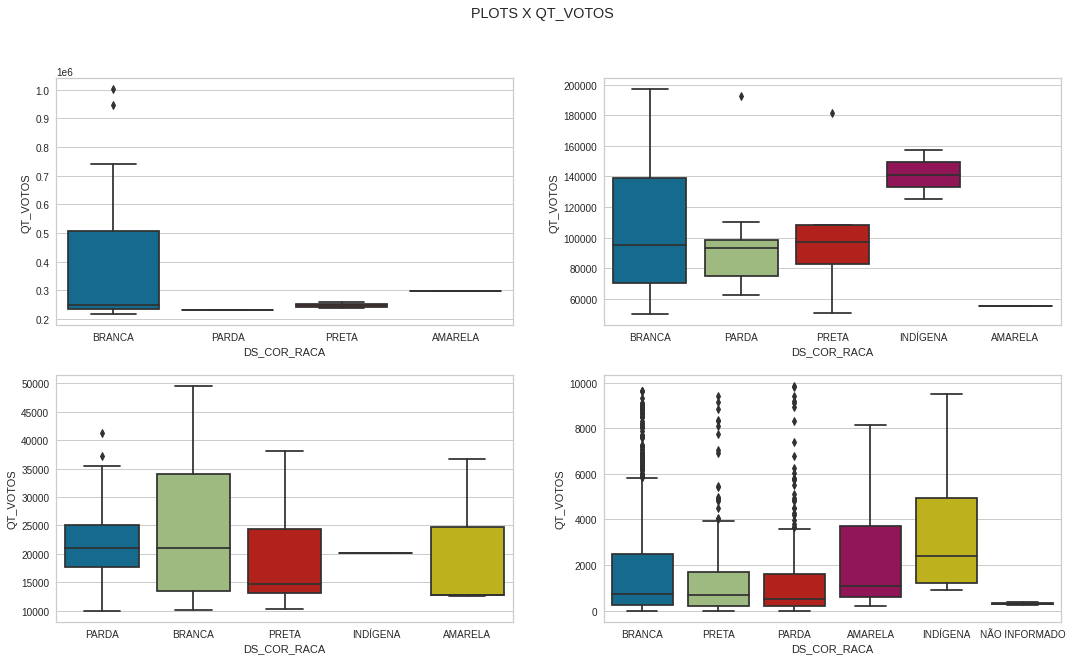

In [188]:
analise =ABT_CANDIDATO.query("QT_VOTOS >200000")
analise2 =ABT_CANDIDATO.query("QT_VOTOS <200000")
analise2 =analise2.query("QT_VOTOS>50000")
analise3 =ABT_CANDIDATO.query("QT_VOTOS<50000")
analise3 =analise3.query("QT_VOTOS>10000")
analise4 =ABT_CANDIDATO.query("QT_VOTOS <10000")


fig, axes = plt.subplots(2, 2, figsize=(18, 10))
 
fig.suptitle('PLOTS X QT_VOTOS')
 

sns.boxplot(ax=axes[0, 0], data=analise, x='DS_COR_RACA', y='QT_VOTOS')
sns.boxplot(ax=axes[0, 1], data=analise2, x='DS_COR_RACA', y='QT_VOTOS')
sns.boxplot(ax=axes[1, 0], data=analise3, x='DS_COR_RACA', y='QT_VOTOS')
sns.boxplot(ax=axes[1, 1], data=analise4, x='DS_COR_RACA', y='QT_VOTOS')

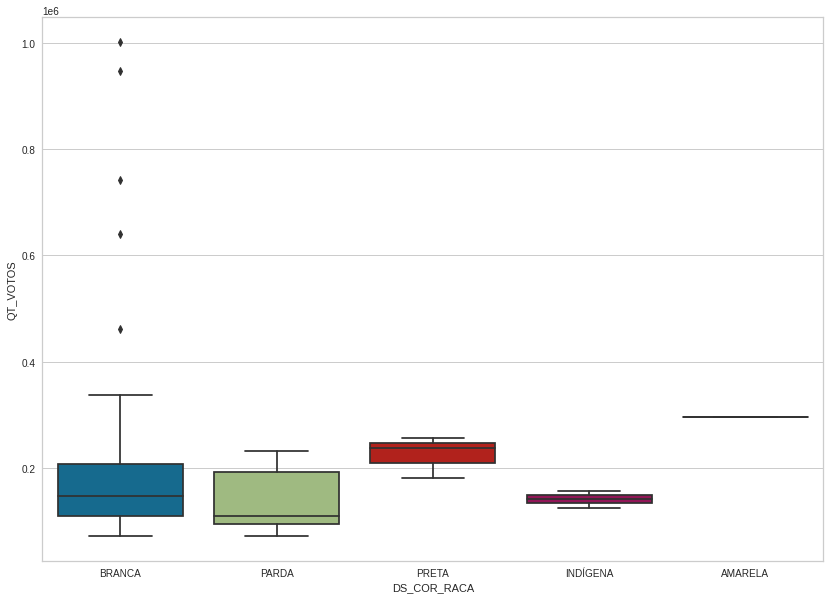

In [189]:
analise =ABT_CANDIDATO.query("DS_SIT_TOT_TURNO !='NÃO ELEITO'")
analise =analise.query("DS_SIT_TOT_TURNO !='SUPLENTE'")
analise =analise.query("DS_SIT_TOT_TURNO !='#NULO#'")

plt.figure(figsize=(14,10))
sns.boxplot( data=analise, x='DS_COR_RACA', y='QT_VOTOS')

### APOIO PRESIDENCIAL

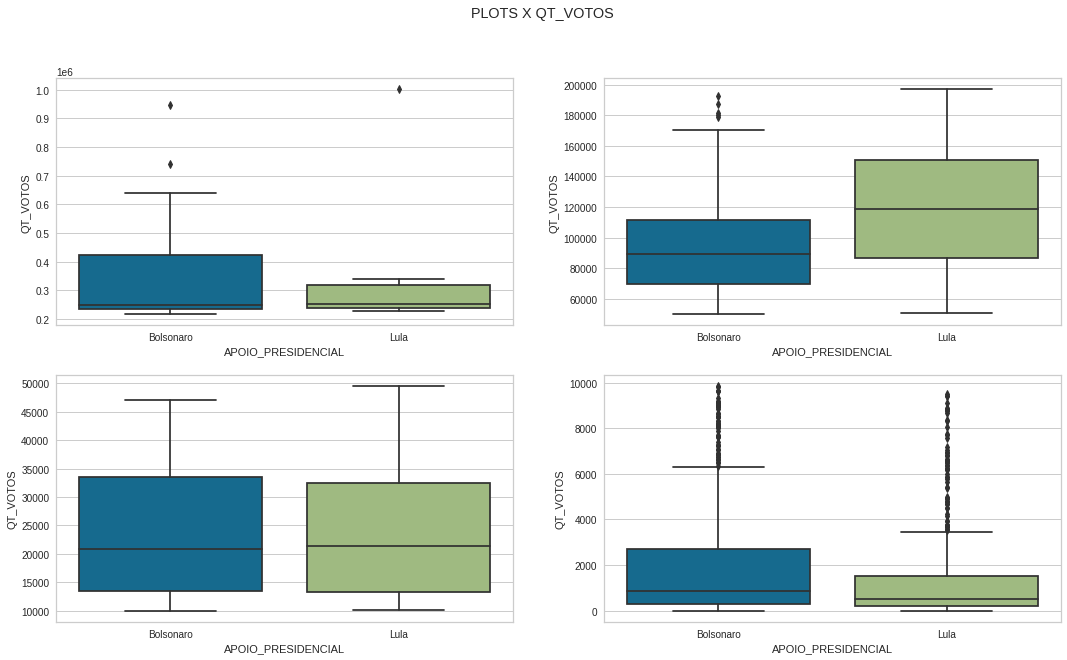

In [190]:
analise =ABT_CANDIDATO.query("QT_VOTOS >200000")
analise2 =ABT_CANDIDATO.query("QT_VOTOS <200000")
analise2 =analise2.query("QT_VOTOS>50000")
analise3 =ABT_CANDIDATO.query("QT_VOTOS<50000")
analise3 =analise3.query("QT_VOTOS>10000")
analise4 =ABT_CANDIDATO.query("QT_VOTOS <10000")


fig, axes = plt.subplots(2, 2, figsize=(18, 10))
 
fig.suptitle('PLOTS X QT_VOTOS')
 

sns.boxplot(ax=axes[0, 0], data=analise, x='APOIO_PRESIDENCIAL', y='QT_VOTOS')
sns.boxplot(ax=axes[0, 1], data=analise2, x='APOIO_PRESIDENCIAL', y='QT_VOTOS')
sns.boxplot(ax=axes[1, 0], data=analise3, x='APOIO_PRESIDENCIAL', y='QT_VOTOS')
sns.boxplot(ax=axes[1, 1], data=analise4, x='APOIO_PRESIDENCIAL', y='QT_VOTOS')

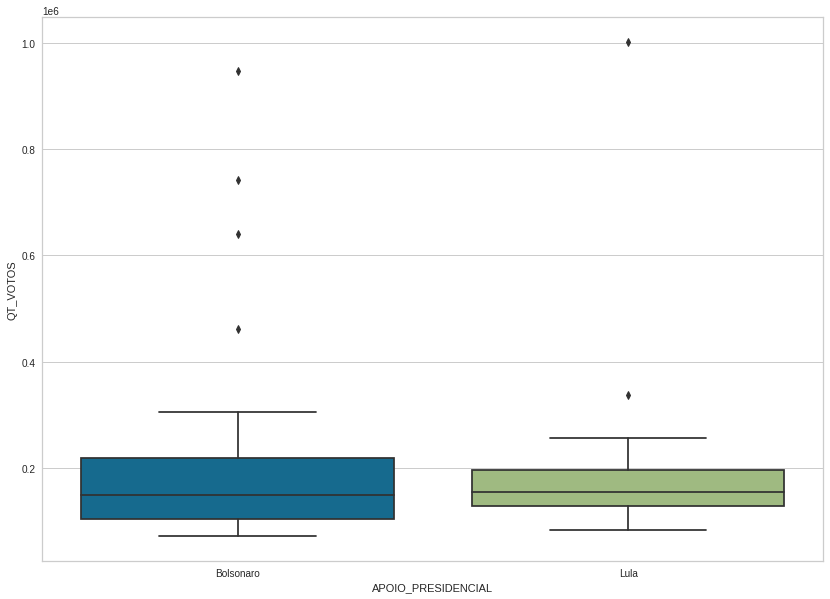

In [191]:
analise =ABT_CANDIDATO.query("DS_SIT_TOT_TURNO !='NÃO ELEITO'")
analise =analise.query("DS_SIT_TOT_TURNO !='SUPLENTE'")
analise =analise.query("DS_SIT_TOT_TURNO !='#NULO#'")

plt.figure(figsize=(14,10))
sns.boxplot( data=analise, x='APOIO_PRESIDENCIAL', y='QT_VOTOS')

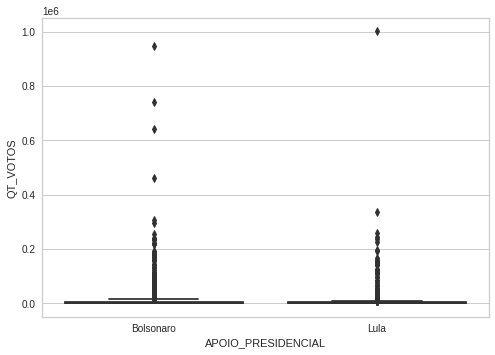

In [192]:
sns.boxplot( data=ABT_CANDIDATO, x='APOIO_PRESIDENCIAL', y='QT_VOTOS')

### PARTIDO

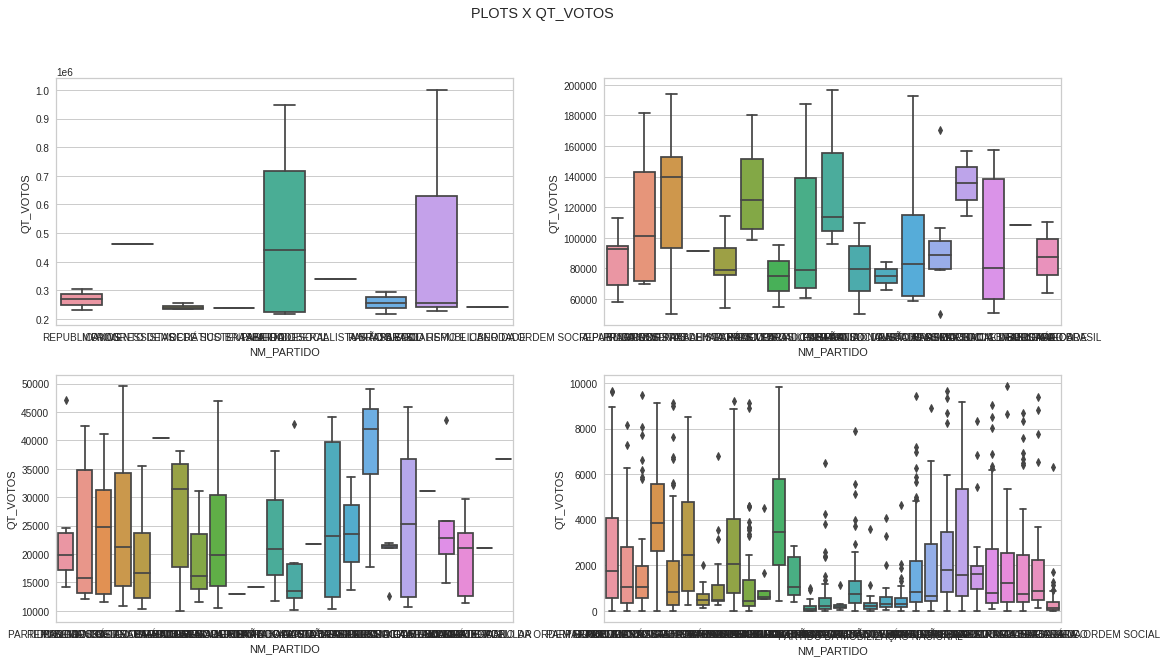

In [193]:
analise =ABT_CANDIDATO.query("QT_VOTOS >200000")
analise2 =ABT_CANDIDATO.query("QT_VOTOS <200000")
analise2 =analise2.query("QT_VOTOS>50000")
analise3 =ABT_CANDIDATO.query("QT_VOTOS<50000")
analise3 =analise3.query("QT_VOTOS>10000")
analise4 =ABT_CANDIDATO.query("QT_VOTOS <10000")


fig, axes = plt.subplots(2, 2, figsize=(18, 10))
 
fig.suptitle('PLOTS X QT_VOTOS')
 

sns.boxplot(ax=axes[0, 0], data=analise, x='NM_PARTIDO', y='QT_VOTOS')
sns.boxplot(ax=axes[0, 1], data=analise2, x='NM_PARTIDO', y='QT_VOTOS')
sns.boxplot(ax=axes[1, 0], data=analise3, x='NM_PARTIDO', y='QT_VOTOS')
sns.boxplot(ax=axes[1, 1], data=analise4, x='NM_PARTIDO', y='QT_VOTOS')

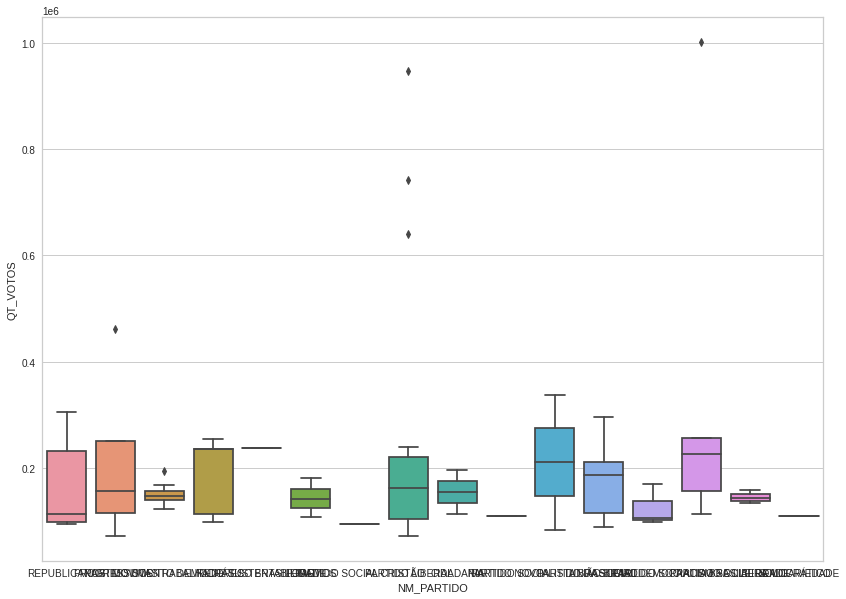

In [194]:
analise =ABT_CANDIDATO.query("DS_SIT_TOT_TURNO !='NÃO ELEITO'")
analise =analise.query("DS_SIT_TOT_TURNO !='SUPLENTE'")
analise =analise.query("DS_SIT_TOT_TURNO !='#NULO#'")

plt.figure(figsize=(14,10))
sns.boxplot( data=analise, x='NM_PARTIDO', y='QT_VOTOS')

### COLIGAÇÃO

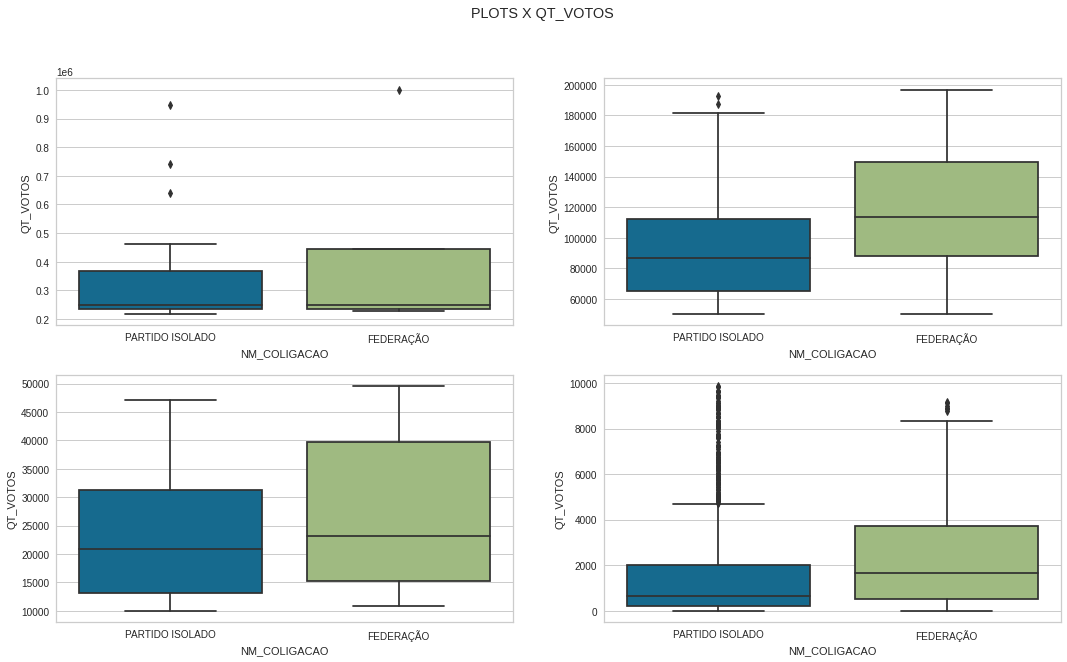

In [195]:
analise =ABT_CANDIDATO.query("QT_VOTOS >200000")
analise2 =ABT_CANDIDATO.query("QT_VOTOS <200000")
analise2 =analise2.query("QT_VOTOS>50000")
analise3 =ABT_CANDIDATO.query("QT_VOTOS<50000")
analise3 =analise3.query("QT_VOTOS>10000")
analise4 =ABT_CANDIDATO.query("QT_VOTOS <10000")


fig, axes = plt.subplots(2, 2, figsize=(18, 10))
 
fig.suptitle('PLOTS X QT_VOTOS')
 

sns.boxplot(ax=axes[0, 0], data=analise, x='NM_COLIGACAO', y='QT_VOTOS')
sns.boxplot(ax=axes[0, 1], data=analise2, x='NM_COLIGACAO', y='QT_VOTOS')
sns.boxplot(ax=axes[1, 0], data=analise3, x='NM_COLIGACAO', y='QT_VOTOS')
sns.boxplot(ax=axes[1, 1], data=analise4, x='NM_COLIGACAO', y='QT_VOTOS')

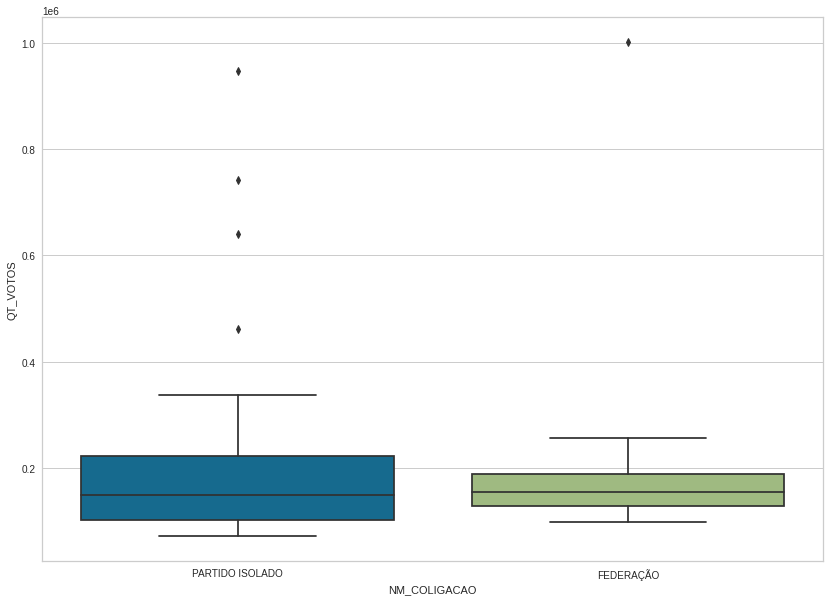

In [196]:
analise =ABT_CANDIDATO.query("DS_SIT_TOT_TURNO !='NÃO ELEITO'")
analise =analise.query("DS_SIT_TOT_TURNO !='SUPLENTE'")
analise =analise.query("DS_SIT_TOT_TURNO !='#NULO#'")

plt.figure(figsize=(14,10))
sns.boxplot( data=analise, x='NM_COLIGACAO', y='QT_VOTOS')

### IDADE

In [197]:
idade = ABT_CANDIDATO[['NR_IDADE_DATA_POSSE','IDADE_CLASSIFICAÇÃO','QT_VOTOS']]
idade.head()

NR_IDADE_DATA_POSSE IDADE_CLASSIFICAÇÃO  QT_VOTOS
0                   66                 >70  305520.0
1                   40               40-50    4120.0
2                   52               50-60   18711.0
3                   43               40-50     390.0
4                   53               50-60    2073.0

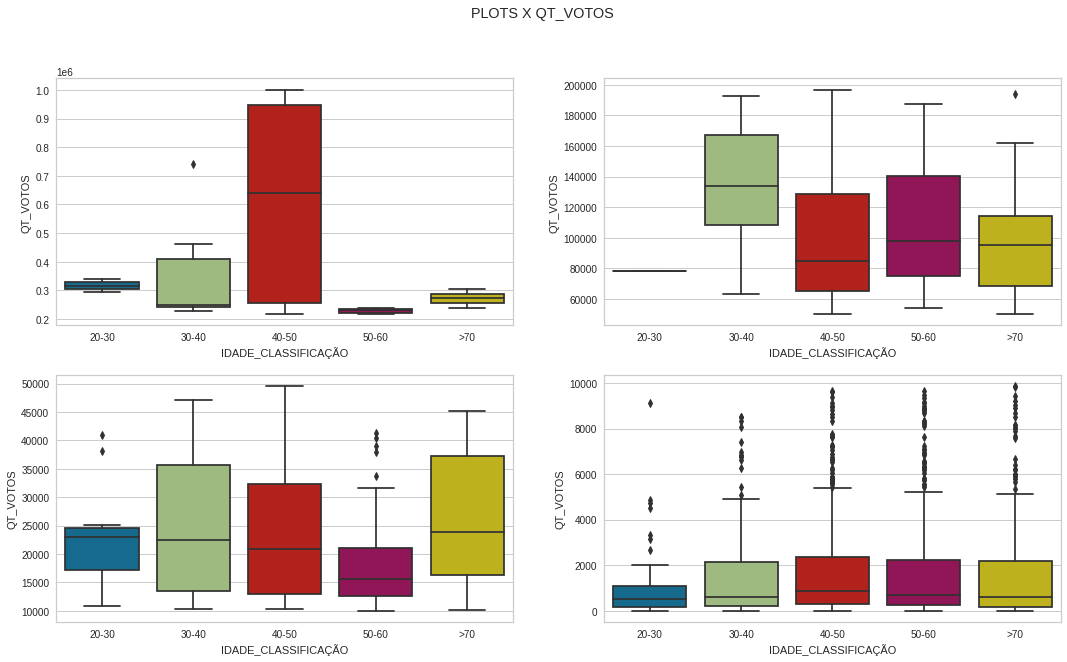

In [198]:
analise =ABT_CANDIDATO.query("QT_VOTOS >200000")
analise2 =ABT_CANDIDATO.query("QT_VOTOS <200000")
analise2 =analise2.query("QT_VOTOS>50000")
analise3 =ABT_CANDIDATO.query("QT_VOTOS<50000")
analise3 =analise3.query("QT_VOTOS>10000")
analise4 =ABT_CANDIDATO.query("QT_VOTOS <10000")


fig, axes = plt.subplots(2, 2, figsize=(18, 10))
 
fig.suptitle('PLOTS X QT_VOTOS')
 

sns.boxplot(ax=axes[0, 0], data=analise, x='IDADE_CLASSIFICAÇÃO', y='QT_VOTOS',order=["20-30","30-40","40-50","50-60", '>70'])
sns.boxplot(ax=axes[0, 1], data=analise2, x='IDADE_CLASSIFICAÇÃO', y='QT_VOTOS',order=["20-30","30-40","40-50","50-60", '>70'])
sns.boxplot(ax=axes[1, 0], data=analise3, x='IDADE_CLASSIFICAÇÃO', y='QT_VOTOS',order=["20-30","30-40","40-50","50-60", '>70'])
sns.boxplot(ax=axes[1, 1], data=analise4, x='IDADE_CLASSIFICAÇÃO', y='QT_VOTOS',order=["20-30","30-40","40-50","50-60", '>70'])

In [199]:
abt_idade =(
    ABT_CANDIDATO
    .groupby('IDADE_CLASSIFICAÇÃO')
    .agg(
        QT_VOTOS_MEDIA=('QT_VOTOS', 'mean'),
         QT_VOTOS_MEDIANA=('QT_VOTOS', 'median'),
         QT_VOTOS_VARIANCIA=('QT_VOTOS', 'std'),
         QDE_VOTOS = ('QT_VOTOS','count')
         )
      .reset_index()
      )
abt_idade

IDADE_CLASSIFICAÇÃO  QT_VOTOS_MEDIA  QT_VOTOS_MEDIANA  QT_VOTOS_VARIANCIA  \
0               20-30    18216.948276             843.0        58665.428255   
1               30-40    19558.990909            1107.5        70993.088373   
2               40-50    16673.051724            1302.0        76010.049534   
3               50-60    10323.828685             863.5        33039.633309   
4                 >70    15737.724739             977.0        38141.840544   

   QDE_VOTOS  
0         58  
1        220  
2        464  
3        502  
4        287

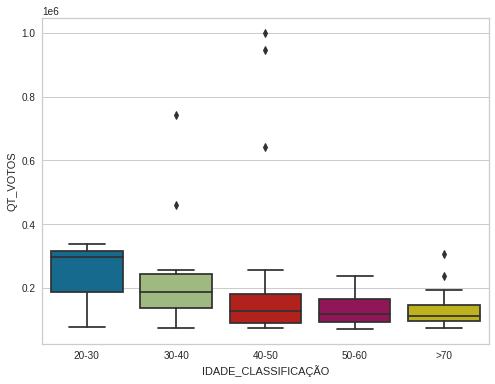

In [200]:
idade = ABT_CANDIDATO.query('QT_VOTOS > 70000')
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
sns.boxplot( data=idade, x='IDADE_CLASSIFICAÇÃO', y='QT_VOTOS',order=["20-30","30-40","40-50","50-60", '>70'])

In [201]:
abt_idade =(
    idade
    .groupby('IDADE_CLASSIFICAÇÃO')
    .agg(
        QT_VOTOS_MEDIA=('QT_VOTOS', 'mean'),
         QT_VOTOS_MEDIANA=('QT_VOTOS', 'median'),
         #QT_VOTOS_VARIANCIA=('QT_VOTOS', 'std'),
         QDE_VOTOS = ('QT_VOTOS','count')
         )
      .reset_index()
      )
abt_idade

IDADE_CLASSIFICAÇÃO  QT_VOTOS_MEDIA  QT_VOTOS_MEDIANA  QDE_VOTOS
0               20-30   237094.000000          295460.0          3
1               30-40   233868.857143          185791.5         14
2               40-50   211978.923077          127624.0         26
3               50-60   137112.423077          117786.5         26
4                 >70   128800.590909          110061.5         22

### Outros

In [202]:
analise = (
    ABT_CANDIDATO
    .groupby('LAST_ORIGEM_DESPESA')
    .agg(
        MEDIA_DESPESA =('VR_LAST_ORIGEM_DESPESA','mean'),
        TOTAL_DESPESA =('VR_LAST_ORIGEM_DESPESA','sum'),
         QTD_DESPESA =('VR_LAST_ORIGEM_DESPESA','count'),
        MEDIA_PCT_GASTO =('%_LAST_GASTO_TOTAL','mean')
    )
    .query("MEDIA_PCT_GASTO <1")
    .sort_values('MEDIA_DESPESA',ascending=False)
    .reset_index()
    
    )

In [203]:
ABT_CANDIDATO['DS_SIT_TOT_TURNO'].value_counts()

SUPLENTE            781
NÃO ELEITO          607
#NULO#               73
ELEITO POR QP        60
ELEITO POR MÉDIA     10
Name: DS_SIT_TOT_TURNO, dtype: int64

In [204]:
## PARTIDO x DFs_ Municípios 

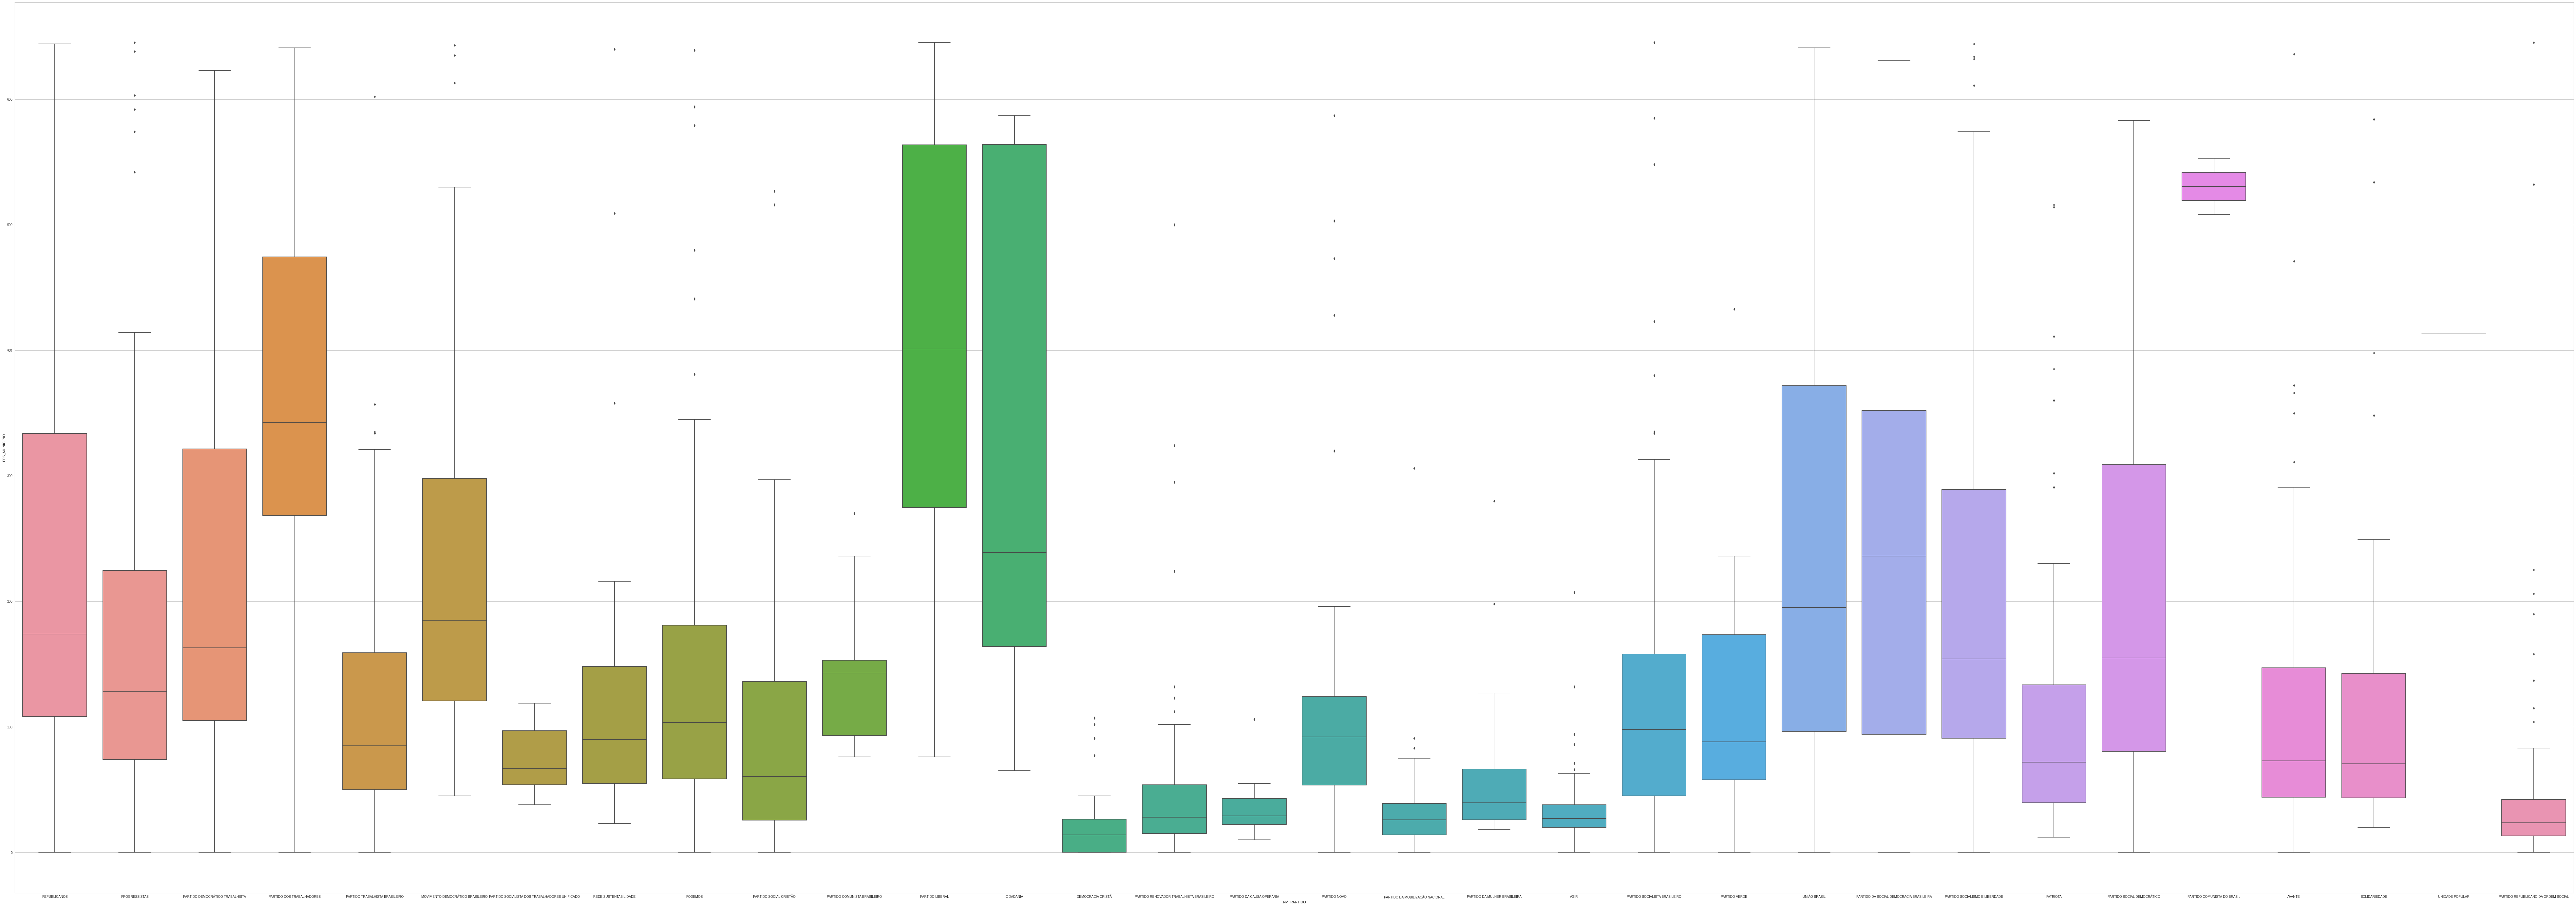

In [205]:
## PARTIDO x DFs_ Municípios 

plt.figure(figsize=(140,50))
ax = sns.boxplot(data=ABT_CANDIDATO, x='NM_PARTIDO', y='DFS_MUNICIPIO')

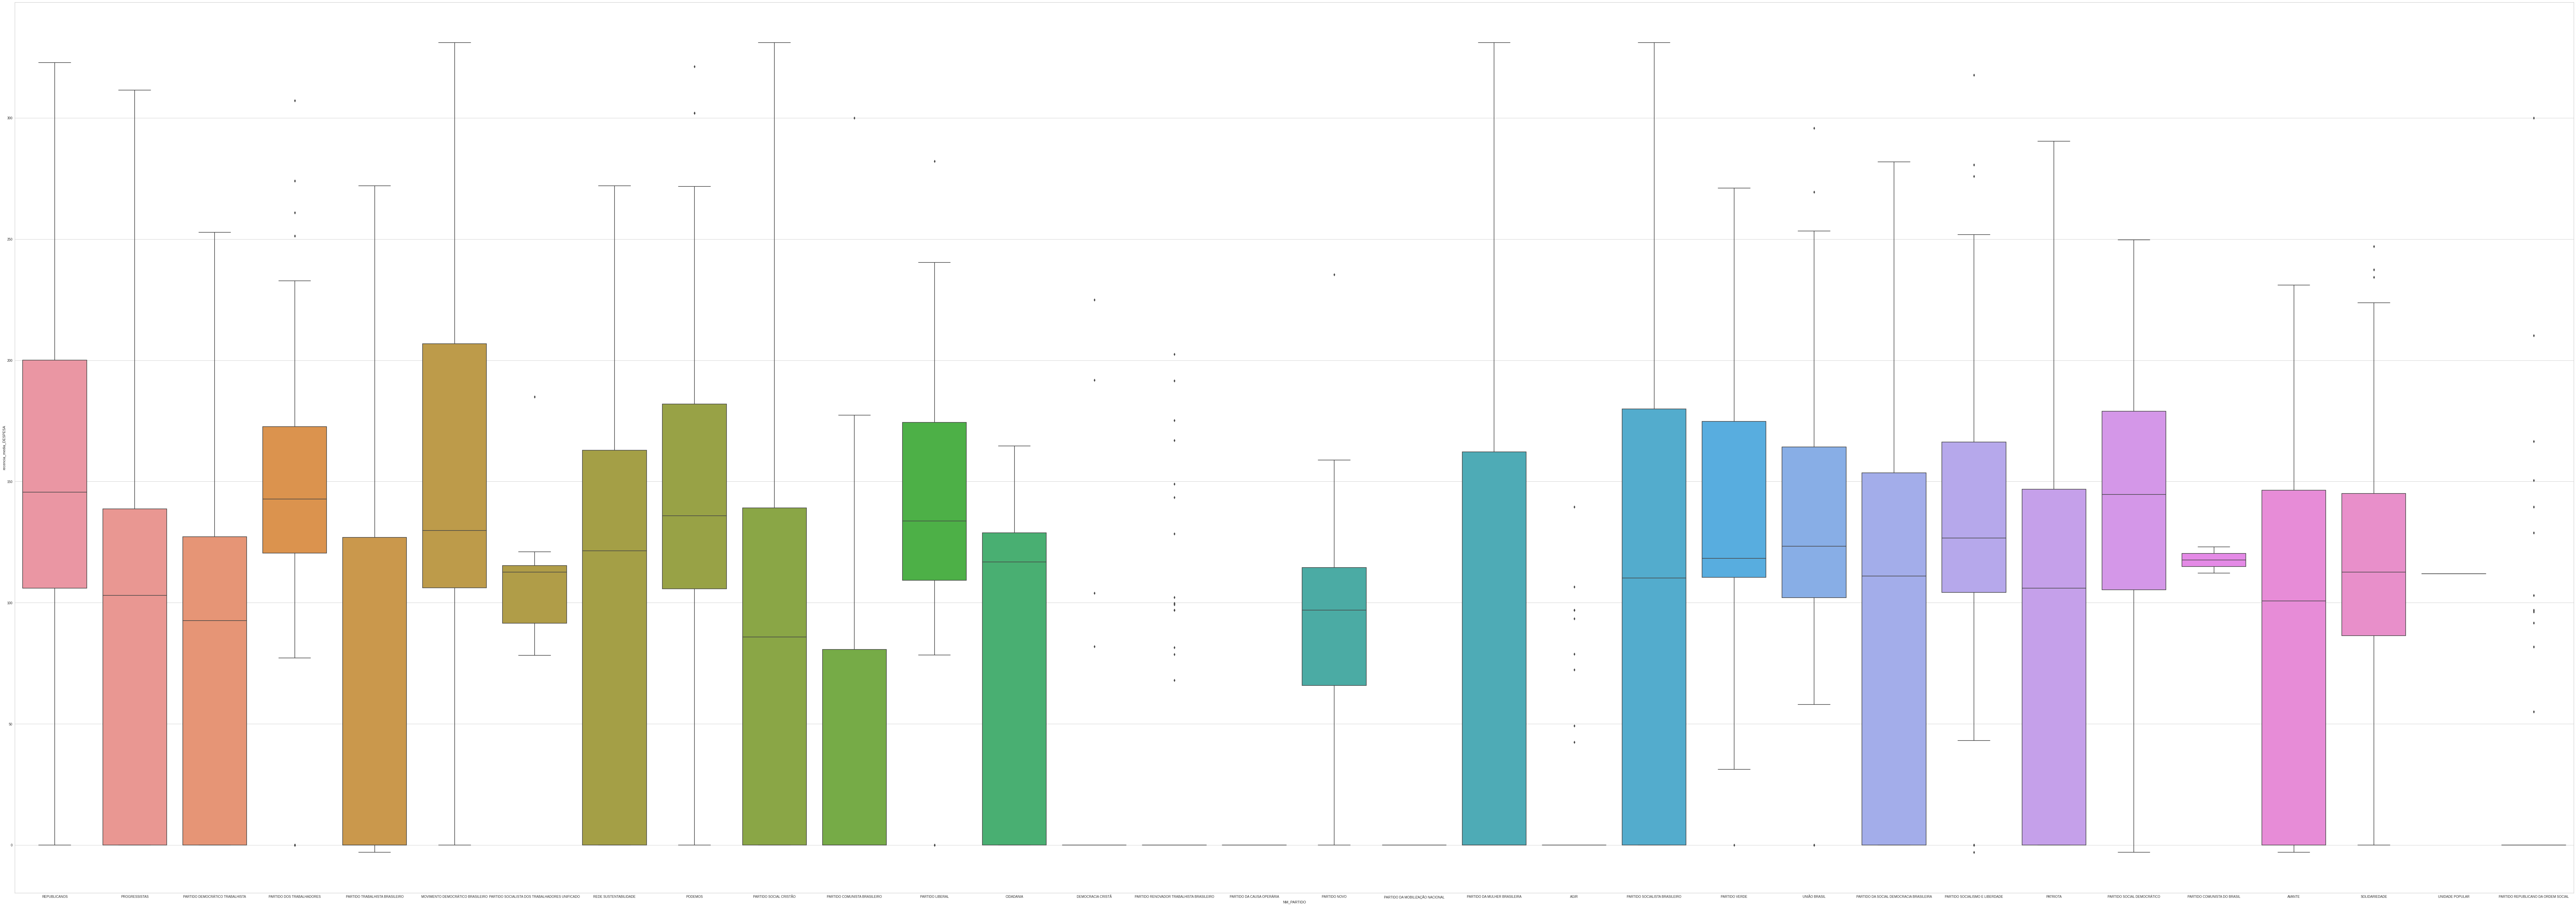

In [206]:
## Partidos x Recendia Media Despesa

plt.figure(figsize=(140,50))
ax = sns.boxplot(data=ABT_CANDIDATO, x='NM_PARTIDO', y='recencia_media_DESPESA')

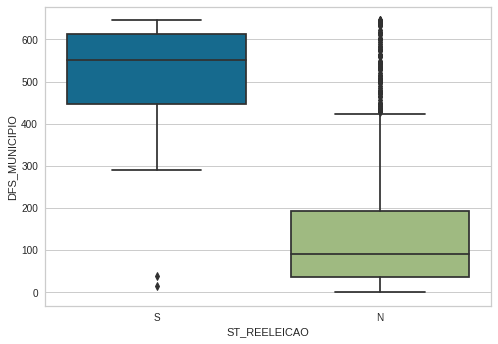

In [207]:
## Reeleição x DFS Municiípios

sns.boxplot(data=ABT_CANDIDATO, x='ST_REELEICAO', y='DFS_MUNICIPIO')

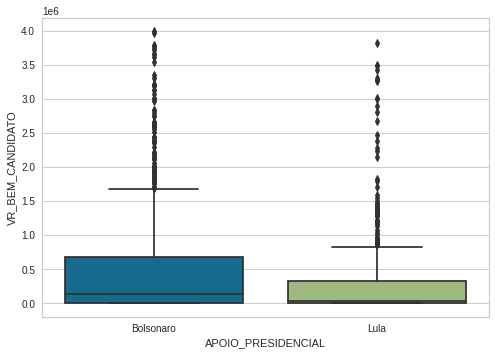

In [208]:
## Valor Bem candidato x Apoio Presidencial

analise =ABT_CANDIDATO.query("VR_BEM_CANDIDATO<4000000")


sns.boxplot(data=analise, x='APOIO_PRESIDENCIAL', y='VR_BEM_CANDIDATO')

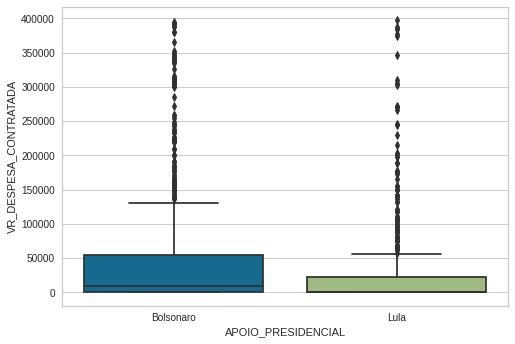

In [209]:
## Valor Despesa Campanha x Apoio Presidencial

analise =ABT_CANDIDATO.query("VR_DESPESA_CONTRATADA<400000")

sns.boxplot(data=analise, x='APOIO_PRESIDENCIAL', y='VR_DESPESA_CONTRATADA')

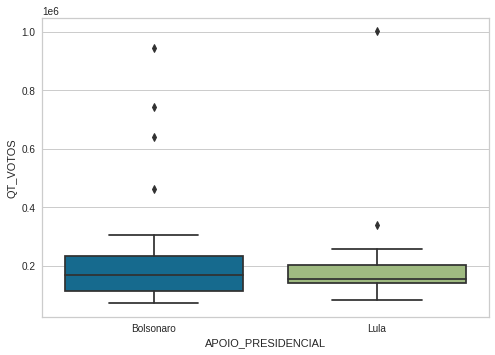

In [210]:
## quantidade de votos x Apoio Presidencial

analise =ABT_CANDIDATO.query("DS_SIT_TOT_TURNO =='ELEITO POR QP'")

sns.boxplot(data=analise, x='APOIO_PRESIDENCIAL', y='QT_VOTOS')

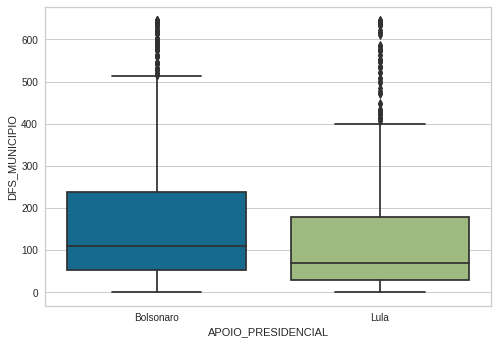

In [211]:
## DFS_Municipios x Apoio Presidencial

sns.boxplot(data=ABT_CANDIDATO, x='APOIO_PRESIDENCIAL', y='DFS_MUNICIPIO')

In [212]:
#Correlações

print(ABT_CANDIDATO['VR_DESPESA_CONTRATADA'].corr(ABT_CANDIDATO['QT_VOTOS']))

print(ABT_CANDIDATO['VR_BEM_CANDIDATO'].corr(ABT_CANDIDATO['QT_VOTOS']))

print(ABT_CANDIDATO['VR_BEM_CANDIDATO'].corr(ABT_CANDIDATO['VR_DESPESA_CONTRATADA']))

print(ABT_CANDIDATO['NR_IDADE_DATA_POSSE'].corr(ABT_CANDIDATO['QT_VOTOS']))

print(ABT_CANDIDATO['recencia_DT_NASCIMENTO'].corr(ABT_CANDIDATO['QT_VOTOS']))

0.4963252586278317
0.13056526634523766
0.12997990508478502
-0.028793527545329288
-0.02886767480716602


In [213]:
ABT_CANDIDATO['DS_SIT_TOT_TURNO'].value_counts()

SUPLENTE            781
NÃO ELEITO          607
#NULO#               73
ELEITO POR QP        60
ELEITO POR MÉDIA     10
Name: DS_SIT_TOT_TURNO, dtype: int64

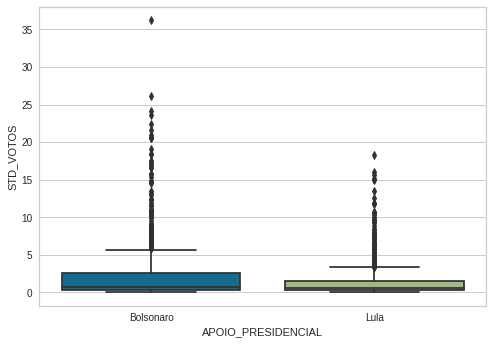

In [214]:
## STD Votos x Apoio Presidencial

sns.boxplot(data=ABT_CANDIDATO, x='APOIO_PRESIDENCIAL', y='STD_VOTOS')

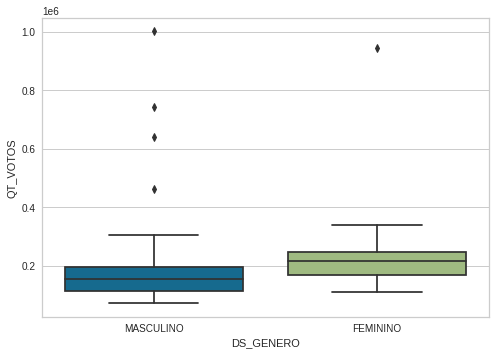

In [215]:
## STD_VOTOS x Apoio Presidencial

analise =ABT_CANDIDATO.query("DS_SIT_TOT_TURNO =='ELEITO POR QP'")
analise =analise.query("QT_VOTOS >25000")

sns.boxplot(data=analise, x='DS_GENERO', y='QT_VOTOS')

In [216]:
ABT_CANDIDATO['DS_SIT_TOT_TURNO'].value_counts()

SUPLENTE            781
NÃO ELEITO          607
#NULO#               73
ELEITO POR QP        60
ELEITO POR MÉDIA     10
Name: DS_SIT_TOT_TURNO, dtype: int64

### Valor Bem declarado

In [217]:
abt_BEM =(
    ABT_CANDIDATO
    .groupby('BEM_CLASSIFICAÇÃO')
    .agg(
        QT_VOTOS_MEDIA=('QT_VOTOS', 'mean'),
         QT_VOTOS_MEDIANA=('QT_VOTOS', 'median'),
         QT_VOTOS_VARIANCIA=('QT_VOTOS', 'std'),
         QDE_VOTOS = ('QT_VOTOS','count')
         )
      .reset_index()
      )

abt_BEM = abt_BEM.sort_values('QT_VOTOS_MEDIA')

abt_BEM

BEM_CLASSIFICAÇÃO  QT_VOTOS_MEDIA  QT_VOTOS_MEDIANA  QT_VOTOS_VARIANCIA  \
2            <10000     2052.052536             362.0         8347.618277   
0      10000-100000    10114.417085            1092.0        73308.758743   
1    100000-1000000    19513.043893            1983.0        61799.343962   
3              >1mi    36815.660156            6406.5        79848.073712   

   QDE_VOTOS  
2        552  
0        199  
1        524  
3        256

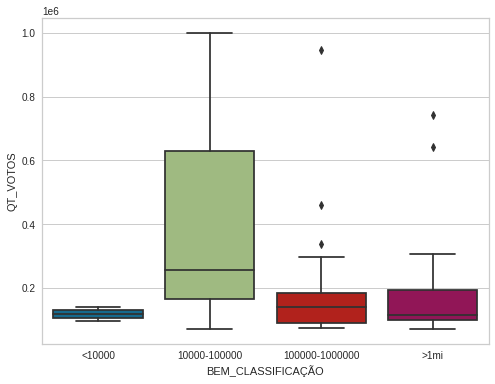

In [218]:
BEM = ABT_CANDIDATO.query('QT_VOTOS > 70000')
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
sns.boxplot( data=BEM, x='BEM_CLASSIFICAÇÃO', y='QT_VOTOS',order=["<10000","10000-100000","100000-1000000", '>1mi'])

In [219]:
abt_BEM =(
    BEM
    .groupby('BEM_CLASSIFICAÇÃO')
    .agg(
        QT_VOTOS_MEDIA=('QT_VOTOS', 'mean'),
         QT_VOTOS_MEDIANA=('QT_VOTOS', 'median'),
         QT_VOTOS_VARIANCIA=('QT_VOTOS', 'std'),
         QDE_CANDIDATOS = ('QT_VOTOS','count')
         )
      .reset_index()
      )

abt_BEM = abt_BEM.sort_values('QT_VOTOS_MEDIA')

abt_BEM

BEM_CLASSIFICAÇÃO  QT_VOTOS_MEDIA  QT_VOTOS_MEDIANA  QT_VOTOS_VARIANCIA  \
2            <10000   117412.000000          117412.0        31996.581849   
3              >1mi   166436.619048          114108.5       132869.232102   
1    100000-1000000   166821.431818          140409.0       143939.717195   
0      10000-100000   443376.333333          256903.0       492110.879695   

   QDE_CANDIDATOS  
2               2  
3              42  
1              44  
0               3

In [220]:
def bem2(row):  
    if row['VR_BEM_CANDIDATO'] < 200000:
        return '<200000'
    if row['VR_BEM_CANDIDATO'] < 500000:
        return '200000-500000'
    if row['VR_BEM_CANDIDATO'] < 1000000:
        return '500000-1000000'
    else:
        return '>1mi'

In [221]:
BEM['BEM_CLASSIFICAÇÃO2'] = BEM.apply(lambda BEM: bem2(BEM), axis=1)

<ipython-input-221-360e2111f253>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BEM['BEM_CLASSIFICAÇÃO2'] = BEM.apply(lambda BEM: bem2(BEM), axis=1)


In [222]:
abt_BEM =(
    BEM
    .groupby('BEM_CLASSIFICAÇÃO2')
    .agg(
        QT_VOTOS_MEDIA=('QT_VOTOS', 'mean'),
         QT_VOTOS_MEDIANA=('QT_VOTOS', 'median'),
         QT_VOTOS_VARIANCIA=('QT_VOTOS', 'std'),
         QDE_CANDIDATOS = ('QT_VOTOS','count')
         )
      .reset_index()
      )

abt_BEM = abt_BEM.sort_values('QT_VOTOS_MEDIA')

abt_BEM

BEM_CLASSIFICAÇÃO2  QT_VOTOS_MEDIA  QT_VOTOS_MEDIANA  QT_VOTOS_VARIANCIA  \
1     500000-1000000   136842.720000          125517.0        63399.124975   
0      200000-500000   147935.666667          124902.0        72080.811405   
3               >1mi   166436.619048          114108.5       132869.232102   
2            <200000   309066.666667          157404.5       328554.765713   

   QDE_CANDIDATOS  
1              25  
0              12  
3              42  
2              12

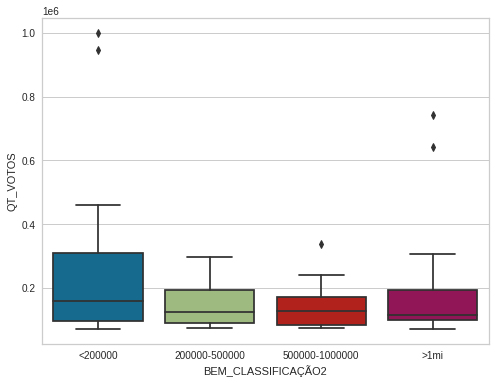

In [223]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
sns.boxplot( data=BEM, x='BEM_CLASSIFICAÇÃO2', y='QT_VOTOS',order=["<200000","200000-500000","500000-1000000", '>1mi'])

### Valor Gasto

In [224]:
ABT_CANDIDATO['VR_PESSOA_JURIDICA'].describe()

count    1.531000e+03
mean     1.154088e+05
std      2.927875e+05
min      0.000000e+00
25%      0.000000e+00
50%      3.195240e+03
75%      5.531961e+04
max      2.357874e+06
Name: VR_PESSOA_JURIDICA, dtype: float64

In [225]:
def GASTO(row):  
    if row['VR_PESSOA_JURIDICA'] < 1000:
        return '<1mil'
    if row['VR_PESSOA_JURIDICA'] < 5000:
        return '1mil-5mil'
    if row['VR_PESSOA_JURIDICA'] < 10000:
        return '5mil-10mil'
    if row['VR_PESSOA_JURIDICA'] < 50000:
        return '10mil-50mil'
    if row['VR_PESSOA_JURIDICA'] < 100000:
        return '50mil-100mil'
    if row['VR_PESSOA_JURIDICA'] < 200000:
        return '100mil-200mil'
    if row['VR_PESSOA_JURIDICA'] < 400000:
        return '200mil-400mil'
    if row['VR_PESSOA_JURIDICA'] < 800000:
        return '400mil-800mil'
    if row['VR_PESSOA_JURIDICA'] < 1600000:
        return '800mil-1,6mi'
    else:
        return '>1,6mi'

In [226]:
ABT_CANDIDATO['GASTO_CLASSIFICAÇÃO'] = ABT_CANDIDATO.apply(lambda ABT_CANDIDATO: GASTO(ABT_CANDIDATO), axis=1)

In [227]:
abt_GASTO =(
    ABT_CANDIDATO
    .groupby('GASTO_CLASSIFICAÇÃO')
    .agg(
        QT_VOTOS_MEDIA=('QT_VOTOS', 'mean'),
         QT_VOTOS_MEDIANA=('QT_VOTOS', 'median'),
         QT_VOTOS_VARIANCIA=('QT_VOTOS', 'std'),
         QDE_CANDIDATOS = ('QT_VOTOS','count')
         )
      .reset_index()
      )

abt_GASTO = abt_GASTO.sort_values('QT_VOTOS_MEDIA')

abt_GASTO

GASTO_CLASSIFICAÇÃO  QT_VOTOS_MEDIA  QT_VOTOS_MEDIANA  QT_VOTOS_VARIANCIA  \
8               <1mil      744.266667             299.0         1919.695012   
2           1mil-5mil     1313.953488             704.0         1749.046838   
1         10mil-50mil     4046.967742            2043.0         5777.053179   
6          5mil-10mil     6046.963415            1697.5        26847.662516   
5        50mil-100mil     7712.939394            4591.0         9302.895866   
0       100mil-200mil    19130.873563            8166.0        33434.017947   
3       200mil-400mil    47586.639344           18419.0       102901.572196   
4       400mil-800mil    75259.125000           48494.0        77497.347775   
7        800mil-1,6mi   131489.661017           95077.0       177389.720479   
9              >1,6mi   137672.272727           88926.0       179076.770901   

   QDE_CANDIDATOS  
8             675  
2             129  
1             248  
6              82  
5              99  
0              87  
3              61  
4              80  
7              59  
9              11

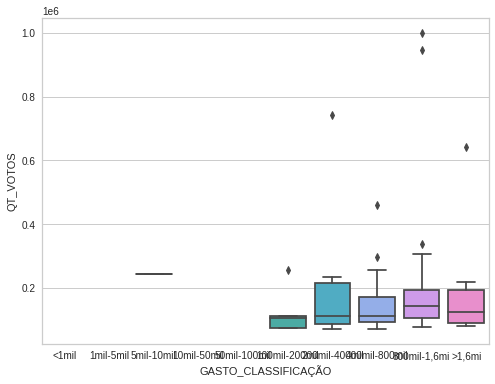

In [228]:
GASTO = ABT_CANDIDATO.query('QT_VOTOS > 70000')
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
sns.boxplot( data=GASTO, x='GASTO_CLASSIFICAÇÃO', y='QT_VOTOS',order=["<1mil","1mil-5mil","5mil-10mil", '10mil-50mil','50mil-100mil','100mil-200mil','200mil-400mil','400mil-800mil','800mil-1,6mi','>1,6mi'])

In [229]:
abt_GASTO =(
    GASTO
    .groupby('GASTO_CLASSIFICAÇÃO')
    .agg(
        QT_VOTOS_MEDIA=('QT_VOTOS', 'mean'),
         QT_VOTOS_MEDIANA=('QT_VOTOS', 'median'),
         QT_VOTOS_VARIANCIA=('QT_VOTOS', 'std'),
         QDE_CANDIDATOS = ('QT_VOTOS','count')
         )
      .reset_index()
      )

abt_GASTO = abt_GASTO.sort_values('QT_VOTOS_MEDIA')

abt_GASTO

GASTO_CLASSIFICAÇÃO  QT_VOTOS_MEDIA  QT_VOTOS_MEDIANA  QT_VOTOS_VARIANCIA  \
0       100mil-200mil   123382.800000          104701.0        75505.645158   
2       400mil-800mil   143865.031250          111728.5        81632.698197   
1       200mil-400mil   192249.900000          112118.5       202333.519062   
4        800mil-1,6mi   197241.111111          143771.0       201117.515712   
5              >1,6mi   201231.857143          122800.0       200305.290936   
3          5mil-10mil   243037.000000          243037.0                 NaN   

   QDE_CANDIDATOS  
0               5  
2              32  
1              10  
4              36  
5               7  
3               1

In [230]:
ABT_CANDIDATO.corr().round(2).sort_values('QT_VOTOS',ascending= False)['VR_PESSOA_JURIDICA']['QT_VOTOS']

0.54

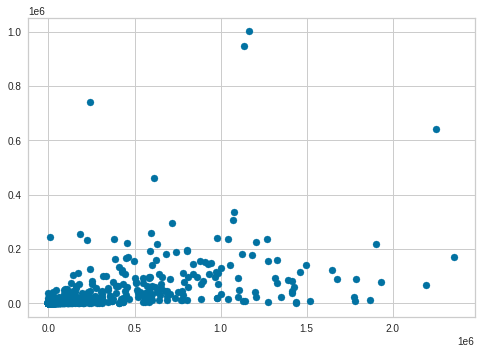

In [231]:
plt.scatter( ABT_CANDIDATO['VR_PESSOA_JURIDICA'],ABT_CANDIDATO['QT_VOTOS'])

In [ ]:
ABT_CANDIDATO['VR_PESSOA_JURIDICA'].describe()

count    1.531000e+03
mean     1.154088e+05
std      2.927875e+05
min      0.000000e+00
25%      0.000000e+00
50%      3.195240e+03
75%      5.531961e+04
max      2.357874e+06
Name: VR_PESSOA_JURIDICA, dtype: float64

In [ ]:
def GASTO(row):  
    if row['VR_PESSOA_JURIDICA'] < 1000:
        return '<1mil'
    if row['VR_PESSOA_JURIDICA'] < 5000:
        return '1mil-5mil'
    if row['VR_PESSOA_JURIDICA'] < 10000:
        return '5mil-10mil'
    if row['VR_PESSOA_JURIDICA'] < 50000:
        return '10mil-50mil'
    if row['VR_PESSOA_JURIDICA'] < 100000:
        return '50mil-100mil'
    if row['VR_PESSOA_JURIDICA'] < 200000:
        return '100mil-200mil'
    if row['VR_PESSOA_JURIDICA'] < 400000:
        return '200mil-400mil'
    if row['VR_PESSOA_JURIDICA'] < 800000:
        return '400mil-800mil'
    if row['VR_PESSOA_JURIDICA'] < 1600000:
        return '800mil-1,6mi'
    else:
        return '>1,6mi'

In [ ]:
ABT_CANDIDATO['GASTO_CLASSIFICAÇÃO'] = ABT_CANDIDATO.apply(lambda ABT_CANDIDATO: GASTO(ABT_CANDIDATO), axis=1)

In [ ]:
abt_GASTO =(
    ABT_CANDIDATO
    .groupby('GASTO_CLASSIFICAÇÃO')
    .agg(
        QT_VOTOS_MEDIA=('QT_VOTOS', 'mean'),
         QT_VOTOS_MEDIANA=('QT_VOTOS', 'median'),
         QT_VOTOS_VARIANCIA=('QT_VOTOS', 'std'),
         QDE_CANDIDATOS = ('QT_VOTOS','count')
         )
      .reset_index()
      )

abt_GASTO = abt_GASTO.sort_values('QT_VOTOS_MEDIA')

abt_GASTO

GASTO_CLASSIFICAÇÃO  QT_VOTOS_MEDIA  QT_VOTOS_MEDIANA  QT_VOTOS_VARIANCIA  \
8               <1mil      744.266667             299.0         1919.695012   
2           1mil-5mil     1313.953488             704.0         1749.046838   
1         10mil-50mil     4046.967742            2043.0         5777.053179   
6          5mil-10mil     6046.963415            1697.5        26847.662516   
5        50mil-100mil     7712.939394            4591.0         9302.895866   
0       100mil-200mil    19130.873563            8166.0        33434.017947   
3       200mil-400mil    47586.639344           18419.0       102901.572196   
4       400mil-800mil    75259.125000           48494.0        77497.347775   
7        800mil-1,6mi   131489.661017           95077.0       177389.720479   
9              >1,6mi   137672.272727           88926.0       179076.770901   

   QDE_CANDIDATOS  
8             675  
2             129  
1             248  
6              82  
5              99  
0              87  
3              61  
4              80  
7              59  
9              11

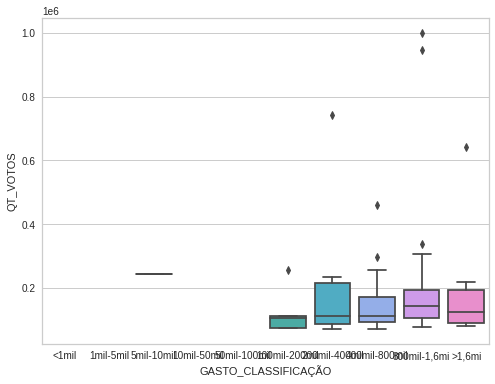

In [ ]:
GASTO = ABT_CANDIDATO.query('QT_VOTOS > 70000')
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
sns.boxplot( data=GASTO, x='GASTO_CLASSIFICAÇÃO', y='QT_VOTOS',order=["<1mil","1mil-5mil","5mil-10mil", '10mil-50mil','50mil-100mil','100mil-200mil','200mil-400mil','400mil-800mil','800mil-1,6mi','>1,6mi'])

In [ ]:
abt_GASTO =(
    GASTO
    .groupby('GASTO_CLASSIFICAÇÃO')
    .agg(
        QT_VOTOS_MEDIA=('QT_VOTOS', 'mean'),
         QT_VOTOS_MEDIANA=('QT_VOTOS', 'median'),
         QT_VOTOS_VARIANCIA=('QT_VOTOS', 'std'),
         QDE_CANDIDATOS = ('QT_VOTOS','count')
         )
      .reset_index()
      )

abt_GASTO = abt_GASTO.sort_values('QT_VOTOS_MEDIA')

abt_GASTO

GASTO_CLASSIFICAÇÃO  QT_VOTOS_MEDIA  QT_VOTOS_MEDIANA  QT_VOTOS_VARIANCIA  \
0       100mil-200mil   123382.800000          104701.0        75505.645158   
2       400mil-800mil   143865.031250          111728.5        81632.698197   
1       200mil-400mil   192249.900000          112118.5       202333.519062   
4        800mil-1,6mi   197241.111111          143771.0       201117.515712   
5              >1,6mi   201231.857143          122800.0       200305.290936   
3          5mil-10mil   243037.000000          243037.0                 NaN   

   QDE_CANDIDATOS  
0               5  
2              32  
1              10  
4              36  
5               7  
3               1

In [ ]:
ABT_CANDIDATO.corr().round(2).sort_values('QT_VOTOS',ascending= False)['VR_PESSOA_JURIDICA']['QT_VOTOS']

0.54

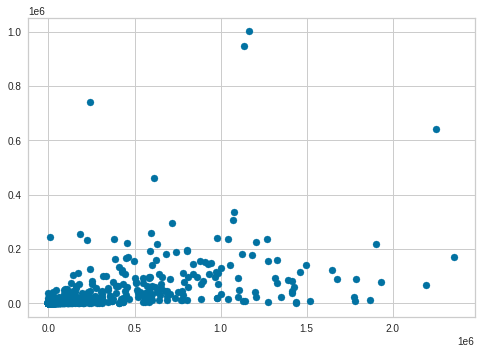

In [ ]:
plt.scatter( ABT_CANDIDATO['VR_PESSOA_JURIDICA'],ABT_CANDIDATO['QT_VOTOS'])

### Diferentes Seções

In [241]:
ABT_CANDIDATO['DFS_SECAO'].describe()

count   1531.0000
mean     424.5023
std      275.1454
min        0.0000
25%      200.5000
50%      399.0000
75%      618.5000
max     1049.0000
Name: DFS_SECAO, dtype: float64

In [248]:
def SECAO(row):  
    if row['DFS_SECAO'] < 200:
        return '<200'
    if row['DFS_SECAO'] < 300:
        return '200-300'
    if row['DFS_SECAO'] < 400:
        return '300-400'
    if row['DFS_SECAO'] < 500:
        return '400-500'
    if row['DFS_SECAO'] < 600:
        return '500-600'
    if row['DFS_SECAO'] < 700:
        return '600-700'
    if row['DFS_SECAO'] < 800:
        return '700-800'
    if row['DFS_SECAO'] < 900:
        return '800-900'

    else:
        return '>900'

In [249]:
ABT_CANDIDATO['SECAO_CLASSIFICAÇÃO'] = ABT_CANDIDATO.apply(lambda ABT_CANDIDATO: SECAO(ABT_CANDIDATO), axis=1)

In [270]:
abt_SECAO =(
    ABT_CANDIDATO
    .groupby('SECAO_CLASSIFICAÇÃO')
    .agg(
        QT_VOTOS_MEDIA=('QT_VOTOS', 'mean'),
         QT_VOTOS_MEDIANA=('QT_VOTOS', 'median'),
         QT_VOTOS_VARIANCIA=('QT_VOTOS', 'std'),
         QDE_CANDIDATOS = ('QT_VOTOS','count')
         )
      .reset_index()
      )

abt_SECAO = abt_SECAO.sort_values('QT_VOTOS_MEDIA')

abt_SECAO

SECAO_CLASSIFICAÇÃO  QT_VOTOS_MEDIA  QT_VOTOS_MEDIANA  QT_VOTOS_VARIANCIA  \
7                <200        136.9843          131.0000            118.1806   
0             200-300        570.2541          408.0000            713.8984   
1             300-400       1291.9261          698.0000           1597.7659   
2             400-500       3108.1256         1444.0000           4440.8135   
3             500-600       5271.6846         2327.0000           8508.3697   
4             600-700       9650.3385         4265.0000          14785.3018   
5             700-800      19419.3469         7629.0000          27100.3665   
6             800-900      40764.6197        22464.0000          44490.4322   
8                >900     139200.0561        93305.0000         162370.5206   

   QDE_CANDIDATOS  
7             381  
0             185  
1             203  
2             207  
3             149  
4             130  
5              98  
6              71  
8             107

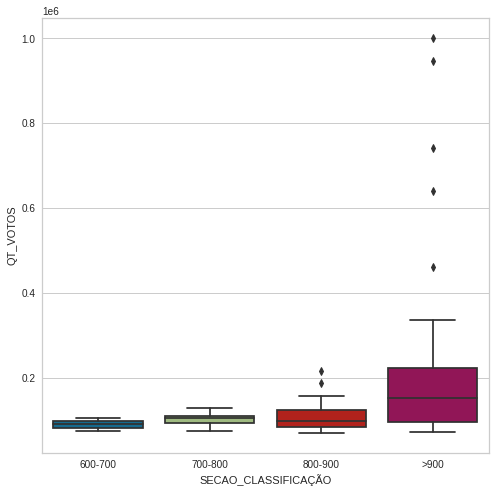

In [260]:
SECAO = ABT_CANDIDATO.query('QT_VOTOS > 70000')
fig, axes = plt.subplots(1, 1, figsize=(8, 8))
sns.boxplot( data=SECAO, x='SECAO_CLASSIFICAÇÃO', y='QT_VOTOS',order=['600-700','700-800','800-900','>900'])

In [261]:
abt_SECAO =(
    SECAO
    .groupby('SECAO_CLASSIFICAÇÃO')
    .agg(
        QT_VOTOS_MEDIA=('QT_VOTOS', 'mean'),
         QT_VOTOS_MEDIANA=('QT_VOTOS', 'median'),
         QT_VOTOS_VARIANCIA=('QT_VOTOS', 'std'),
         QDE_CANDIDATOS = ('QT_VOTOS','count')
         )
      .reset_index()
      )

abt_SECAO = abt_SECAO.sort_values('QT_VOTOS_MEDIA')

abt_SECAO

SECAO_CLASSIFICAÇÃO  QT_VOTOS_MEDIA  QT_VOTOS_MEDIANA  QT_VOTOS_VARIANCIA  \
0             600-700      90871.5000        90871.5000          22329.7250   
1             700-800     102856.2857       104701.0000          17244.8320   
2             800-900     113857.3333        98102.0000          43092.5974   
3                >900     198296.0746       151861.0000         180803.0082   

   QDE_CANDIDATOS  
0               2  
1               7  
2              15  
3              67

### Diferentes Municípios

In [262]:
ABT_CANDIDATO['DFS_MUNICIPIO'].describe()

count   1531.0000
mean     157.4174
std      162.7954
min        0.0000
25%       39.0000
50%       95.0000
75%      218.5000
max      645.0000
Name: DFS_MUNICIPIO, dtype: float64

In [263]:
def MUNICIPIO(row):  
    if row['DFS_MUNICIPIO'] < 10:
        return '<10'
    if row['DFS_MUNICIPIO'] < 20:
        return '10-20'
    if row['DFS_MUNICIPIO'] < 40:
        return '20-40'
    if row['DFS_MUNICIPIO'] < 100:
        return '40-100'
    if row['DFS_MUNICIPIO'] < 200:
        return '100-200'
    if row['DFS_SECAO'] < 300:
        return '200-300'
    if row['DFS_SECAO'] < 400:
        return '300-400'
    if row['DFS_SECAO'] < 500:
        return '400-500'

    else:
        return '>500'

In [264]:
ABT_CANDIDATO['MUNICIPIO_CLASSIFICAÇÃO'] = ABT_CANDIDATO.apply(lambda ABT_CANDIDATO: MUNICIPIO(ABT_CANDIDATO), axis=1)

In [269]:
abt_MUNICIPIO =(
    ABT_CANDIDATO
    .groupby('MUNICIPIO_CLASSIFICAÇÃO')
    .agg(
        QT_VOTOS_MEDIA=('QT_VOTOS', 'mean'),
         QT_VOTOS_MEDIANA=('QT_VOTOS', 'median'),
         QT_VOTOS_VARIANCIA=('QT_VOTOS', 'std'),
         QDE_CANDIDATOS = ('QT_VOTOS','count')
         )
      .reset_index()
      )

abt_MUNICIPIO = abt_MUNICIPIO.sort_values('QT_VOTOS_MEDIA')

abt_MUNICIPIO

MUNICIPIO_CLASSIFICAÇÃO  QT_VOTOS_MEDIA  QT_VOTOS_MEDIANA  \
6                     <10         18.4694            0.0000   
0                   10-20        145.1778          113.0000   
2                   20-40        316.6262          225.0000   
4                  40-100       1083.5649          626.0000   
3                 300-400       1240.0000         1087.5000   
1                 100-200       3512.9182         1913.0000   
5                 400-500       5513.0000         3235.0000   
7                    >500      55026.5197        17193.0000   

   QT_VOTOS_VARIANCIA  QDE_CANDIDATOS  
6             47.1897              98  
0            119.1890              90  
2            334.1158             206  
4           1458.3102             393  
3            678.0241               4  
1           4642.2398             330  
5           6300.3171              29  
7         104210.6687             381

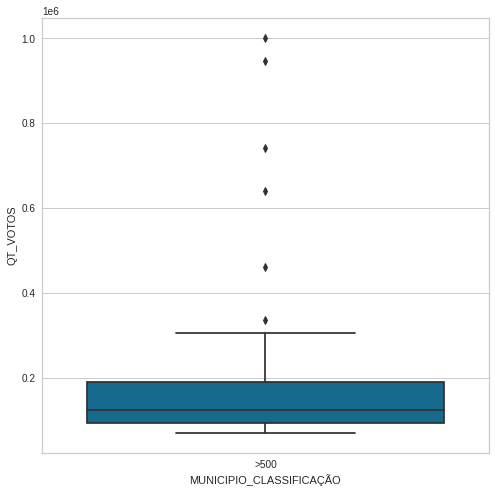

In [267]:
MUNICIPIO = ABT_CANDIDATO.query('QT_VOTOS > 70000')
fig, axes = plt.subplots(1, 1, figsize=(8, 8))
sns.boxplot( data=MUNICIPIO, x='MUNICIPIO_CLASSIFICAÇÃO', y='QT_VOTOS',order=['600-700','700-800','800-900','>500'])

In [268]:
abt_MUNICIPIO =(
    MUNICIPIO
    .groupby('MUNICIPIO_CLASSIFICAÇÃO')
    .agg(
        QT_VOTOS_MEDIA=('QT_VOTOS', 'mean'),
         QT_VOTOS_MEDIANA=('QT_VOTOS', 'median'),
         QT_VOTOS_VARIANCIA=('QT_VOTOS', 'std'),
         QDE_CANDIDATOS = ('QT_VOTOS','count')
         )
      .reset_index()
      )

abt_MUNICIPIO = abt_MUNICIPIO.sort_values('QT_VOTOS_MEDIA')

abt_MUNICIPIO

MUNICIPIO_CLASSIFICAÇÃO  QT_VOTOS_MEDIA  QT_VOTOS_MEDIANA  \
0                    >500     174675.0989       125517.0000   

   QT_VOTOS_VARIANCIA  QDE_CANDIDATOS  
0         160859.4602              91

#4- Modelagem

In [232]:
train=ABT_CANDIDATO.sample(frac=0.8,random_state=200) #random state is a seed value
test=ABT_CANDIDATO.drop(train.index)

In [233]:
ABT_CANDIDATO.dtypes

NR_CANDIDATO                 int64
NM_CANDIDATO                object
DS_SITUACAO_CANDIDATURA     object
DS_DETALHE_SITUACAO_CAND    object
TP_AGREMIACAO               object
                             ...  
REDE_SOCIAL                 object
IDADE_CLASSIFICAÇÃO         object
BEM_CLASSIFICAÇÃO           object
REDE_CLASSIFICAÇÃO          object
GASTO_CLASSIFICAÇÃO         object
Length: 69, dtype: object

In [234]:
### Separação de Dados- Separação aleatória
# Criando Y train/ X Train e Y test/ X test

target = ['QT_VOTOS']
cat_vars = ABT_CANDIDATO.select_dtypes(include=['object']).columns.to_list()
num_vars = ABT_CANDIDATO.select_dtypes(include=['float64']).columns.to_list()
num_vars.remove('QT_VOTOS')
num_vars2 = ABT_CANDIDATO.select_dtypes(include=['int64']).columns.to_list()

X = ABT_CANDIDATO.filter(cat_vars + num_vars + num_vars2 ).copy()
y = ABT_CANDIDATO[target].copy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [235]:
#MODELAGEM
## Criar Função
def adjusted_r2(y_esperado, y_previsto, X_treino):
  R2 = r2_score(y_esperado, y_previsto)
  N = len(y_esperado)
  p = X_treino.shape[1]

  r2_ajustado = (1 - ((1 - R2) * (N - 1)) / (N - p - 1))
  return r2_ajustado

def log_results(modelo_objeto, nome_modelo, X_train, X_test, y_train, y_test):
    pd.options.display.float_format = '{:.4f}'.format
    metricas = {
        'modelo': [nome_modelo, nome_modelo],
        'modo': ['treino', 'teste'],
        'r2': [r2_score(y_train, modelo_objeto.predict(X_train)), r2_score(y_test, modelo_objeto.predict(X_test))],
        'r2_ajustado': [adjusted_r2(y_train, modelo_objeto.predict(X_train),X_train), adjusted_r2(y_test, modelo_objeto.predict(X_test),X_test)],
        'mse': [mean_squared_error(y_train, modelo_objeto.predict(X_train)), mean_squared_error(y_test, modelo_objeto.predict(X_test))],
        'rmse': [mean_squared_error(y_train, modelo_objeto.predict(X_train), squared=False), mean_squared_error(y_test, modelo_objeto.predict(X_test), squared=False)],

        'mae': [mean_absolute_error(y_train, modelo_objeto.predict(X_train)), mean_absolute_error(y_test, modelo_objeto.predict(X_test))],
        'medae': [median_absolute_error(y_train, modelo_objeto.predict(X_train)), median_absolute_error(y_test, modelo_objeto.predict(X_test))],
        'mape': [mean_absolute_percentage_error(y_train, modelo_objeto.predict(X_train)), mean_absolute_percentage_error(y_test, modelo_objeto.predict(X_test))],
        'max_error': [max_error(y_train, modelo_objeto.predict(X_train)), max_error(y_test, modelo_objeto.predict(X_test))]
        }

    return pd.DataFrame(metricas)

In [236]:
## Regressão Linear

lr_model = Pipeline(steps=[
                           ('numeric_imputer', ArbitraryNumberImputer(arbitrary_number=-999, variables=num_vars)),
                           ('categoric_imputer', CategoricalImputer(fill_value='Missing', variables=cat_vars, return_object=True)),
                           ('one_hot_encoder', OneHotEncoder(variables=cat_vars)),
                           #('standard_scaler', SklearnTransformerWrapper(transformer=StandardScaler(), variables=num_vars)),
                           #('min_max_scaler', SklearnTransformerWrapper(transformer=MinMaxScaler(), variables=num_vars)),
                           ('lr', LinearRegression())])


lr_model.fit(X_train, y_train)

y_previsto = lr_model.predict(X_test)
y_esperado = y_test.copy()
r2_score(y_test, y_previsto)
lr_results = log_results(lr_model, 'Regressão Linear', X_train, X_test, y_train, y_test)
lr_results

/usr/local/lib/python3.8/dist-packages/feature_engine/encoding/one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
/usr/local/lib/python3.8/dist-packages/feature_engine/encoding/one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
/usr/local/lib/python3.8/dist-packages/feature_engine/encoding/one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

modelo    modo     r2  r2_ajustado             mse       rmse  \
0  Regressão Linear  treino 0.4768       0.4460 1948547159.1254 44142.3511   
1  Regressão Linear   teste 0.5109       0.3712  628608823.0728 25072.0726   

         mae      medae                    mape   max_error  
0 16356.9669  8647.5493 727188853756289280.0000 790561.0095  
1 15510.1867 10457.6875 880984203003655936.0000 126654.9382

In [237]:
## Ridge Regression

ridge_model = Pipeline(steps=[('numeric_imputer', ArbitraryNumberImputer(arbitrary_number=-999, variables=num_vars)),
                              #('standard_scaler', SklearnTransformerWrapper(transformer=StandardScaler(), variables=num_vars)),
                              ('categoric_imputer', CategoricalImputer(fill_value='Missing', variables=cat_vars, return_object=True)),
                              ('one_hot_encoder', OneHotEncoder(variables=cat_vars)),
                              ('model', Ridge())])

ridge_model.fit(X_train, y_train)

y_previsto = ridge_model.predict(X_test)
y_esperado = y_test.copy()
ridge_results = log_results(ridge_model, 'Ridge Regression', X_train, X_test, y_train, y_test)
ridge_results

/usr/local/lib/python3.8/dist-packages/feature_engine/encoding/one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/feature_engine/encoding/one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = n

modelo    modo     r2  r2_ajustado             mse       rmse  \
0  Ridge Regression  treino 0.0104      -0.0479 3685352947.0404 60707.1079   
1  Ridge Regression   teste 0.0283      -0.2493 1248980586.5209 35340.9194   

         mae      medae                     mape   max_error  
0 22867.2661 13421.1317 3060870883645725184.0000 985506.8260  
1 19116.8820 13390.8834 3100736367889181184.0000 236646.4062

In [238]:
## Arvore de regressão

tree_model = Pipeline(steps=[('numeric_imputer', ArbitraryNumberImputer(arbitrary_number=-999, variables=num_vars)),
                              ('standard_scaler', SklearnTransformerWrapper(transformer=StandardScaler(), variables=num_vars)),
                              ('categoric_imputer', CategoricalImputer(fill_value='Missing', variables=cat_vars, return_object=True)),
                              ('one_hot_encoder', OneHotEncoder(variables=cat_vars)),
                              ('decision_tree', DecisionTreeRegressor(random_state=30,max_depth=3))
                              ])

# Execute para criar o modelo
tree_model.fit(X_train, y_train)

y_previsto = tree_model.predict(X_test)
y_esperado = y_test.copy()

tree_results = log_results(tree_model, 'Decision Tree', X_train, X_test, y_train, y_test)

tree_results

/usr/local/lib/python3.8/dist-packages/feature_engine/encoding/one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
/usr/local/lib/python3.8/dist-packages/feature_engine/encoding/one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
/usr/local/lib/python3.8/dist-packages/feature_engine/encoding/one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

modelo    modo      r2  r2_ajustado             mse       rmse  \
0  Decision Tree  treino  0.9397       0.9361  224711399.1517 14990.3769   
1  Decision Tree   teste -0.0016      -0.2878 1287389382.9973 35880.2088   

        mae     medae                    mape   max_error  
0 6971.9231 2570.4149 611496351667436032.0000 143733.2000  
1 8824.7997 2546.4149 630521903662480512.0000 572961.0000

In [239]:
# Random forest Regressor

rf_model = Pipeline(steps=[('numeric_imputer', ArbitraryNumberImputer(arbitrary_number=-999, variables=num_vars)),
                           ('standard_scaler', SklearnTransformerWrapper(transformer=StandardScaler(), variables=num_vars)),
                           ('categoric_imputer', CategoricalImputer(fill_value='Missing', variables=cat_vars, return_object=True)),
                           ('one_hot_encoder', OneHotEncoder(variables=cat_vars)),
                           ('random_forest', RandomForestRegressor(random_state=30,max_depth=3))
                           ])

# Execute para criar o modelo
rf_model.fit(X_train, y_train)

y_previsto = rf_model.predict(X_test)
y_esperado = y_test.copy()

rf_results = log_results(rf_model, 'Random Forest', X_train, X_test, y_train, y_test)

rf_results

/usr/local/lib/python3.8/dist-packages/feature_engine/encoding/one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.8/dist-packages/feature_engine/encoding/one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.

modelo    modo     r2  r2_ajustado            mse       rmse  \
0  Random Forest  treino 0.9318       0.9277 254150384.3107 15942.0947   
1  Random Forest   teste 0.7903       0.7304 269527148.4094 16417.2820   

        mae     medae                    mape   max_error  
0 6026.5960 2598.9712 624526125195557376.0000 293458.0817  
1 6026.2063 2584.4712 643957073940830976.0000 208420.0860

In [240]:
# XGBoost Regressor

xgb_model = Pipeline(steps=[('numeric_imputer', ArbitraryNumberImputer(arbitrary_number=-999, variables=num_vars)),
                            ('standard_scaler', SklearnTransformerWrapper(transformer=StandardScaler(), variables=num_vars)),
                            ('categoric_imputer', CategoricalImputer(fill_value='Missing', variables=cat_vars, return_object=True)),
                            ('one_hot_encoder', OneHotEncoder(variables=cat_vars)),
                            ('xgb', XGBRegressor(random_state=30))
                            ])

# Execute para criar o modelo
xgb_model.fit(X_train, y_train)

y_previsto = xgb_model.predict(X_test)
y_esperado = y_test.copy()

xgb_results = log_results(xgb_model, 'XGBoost', X_train, X_test, y_train, y_test)

xgb_results

/usr/local/lib/python3.8/dist-packages/feature_engine/encoding/one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)


ValueError: ignored

In [ ]:
#Catboost

from catboost import CatBoostRegressor

cat_model = Pipeline(steps=[('numeric_imputer', ArbitraryNumberImputer(arbitrary_number=-999, variables=num_vars)),
                            ('standard_scaler', SklearnTransformerWrapper(transformer=StandardScaler(), variables=num_vars)),
                            ('categoric_imputer', CategoricalImputer(fill_value='Missing', variables=cat_vars, return_object=True)),
                            ('one_hot_encoder', OneHotEncoder(variables=cat_vars)),
                            ('catboost', CatBoostRegressor(random_state=30))
                            ])

# Execute para criar o modelo
cat_model.fit(X_train, y_train)

y_previsto = cat_model.predict(X_test)
y_esperado = y_test.copy()

cat_results = log_results(cat_model, 'CatBoost', X_train, X_test, y_train, y_test)

cat_results

In [ ]:
#LGBM Regressor


lgbm_model = Pipeline(steps=[('numeric_imputer', ArbitraryNumberImputer(arbitrary_number=-999, variables=num_vars)),
                             ('standard_scaler', SklearnTransformerWrapper(transformer=StandardScaler(), variables=num_vars)),
                             ('categoric_imputer', CategoricalImputer(fill_value='Missing', variables=cat_vars, return_object=True)),
                             ('one_hot_encoder', OneHotEncoder(variables=cat_vars)),
                             ('LGBM', LGBMRegressor(random_state=30))
                              ])

# Execute para criar o modelo
lgbm_model.fit(X_train, y_train)

y_previsto = lgbm_model.predict(X_test)
y_esperado = y_test.copy()

lgbm_results = log_results(lgbm_model, 'LighGBM', X_train, X_test, y_train, y_test)

lgbm_results

In [ ]:
# Análise Geral dos Resultados

resultados_concatenados = pd.concat([lr_results, ridge_results,tree_results,rf_results,lgbm_results,xgb_results,cat_results])

resultados_concatenados

In [ ]:
rf_model.fit(X_train, y_train)

feature_importances_df = pd.DataFrame({
    'features': rf_model[:-1].fit_transform(X_train).columns.to_list(),
    'importances': rf_model[-1].feature_importances_
}).sort_values(by='importances', ascending=False)

feature_importances_df.head(20)

In [ ]:
lgbm_model.fit(X_train, y_train)

feature_importances_df = pd.DataFrame({
    'features': lgbm_model[:-1].fit_transform(X_train).columns.to_list(),
    'importances': lgbm_model[-1].feature_importances_
}).sort_values(by='importances', ascending=False)

feature_importances_df.head(20)